# Background

Saat bisnis berusaha untuk tetap kompetitif di pasar saat ini, pengambilan keputusan berbasis data menjadi semakin penting. Untuk mencapai hal ini, perusahaan memanfaatkan berbagai teknik analisis data untuk mendapatkan insight tentang pelanggan. Dengan mendapatkan insight tersebut, perusahaan dapat menyesuaikan produk dan strategi untuk memenuhi kebutuhan pelanggan dengan lebih baik serta meningkatkan revenue.

# Problem Stament

1. Background pelanggan seperti apa yang menjadi prioritas perusahaan dalam upaya mempertahankan dan meningkatkan revenue?
1. Apakah korelasi yang signifikan mempengaruhi pelanggan dalam berbelanja?
1. Apa rekomendasi untuk perusahaan berdasarkan upaya mempertahankan dan meningkatkan revenue?

# Data Preparation

## Data Understanding

Sebelum melakukan analisis pada sebuah data, penting untuk memahami dan mengidentifikasi variabel-variabel yang terdapat dalam data tersebut. Hal ini bertujuan untuk memastikan bahwa data yang akan dianalisis berkualitas baik dan sesuai dengan tujuan analisis yang ingin dicapai. Berikut deskripsi pada setiap kolom:

**People**
- ID — Pengidentifikasi unik pelanggan.
- Year_Birth — Tahun kelahiran pelanggan.
- Education — Tingkat pendidikan pelanggan.
- Marital_Status — Status perkawinan pelanggan.
- Income — Pendapatan rumah tangga tahunan pelanggan.
- Kidhome — Jumlah anak dalam rumah tangga pelanggan.
- Teenhome — Jumlah remaja dalam rumah tangga pelanggan.
- Dt_Customer — Tanggal pendaftaran pelanggan dengan perusahaan.
- Recency — Jumlah hari sejak pembelian terakhir pelanggan.
- Complain — 1 jika pelanggan complaint dalam 2 tahun terakhir, 0 sebaliknya.

**Products**
- MntWines — Jumlah yang dihabiskan untuk membeli wines dalam 2 tahun terakhir.
- MntFruits — Jumlah yang dihabiskan untuk membeli buah-buahan dalam 2 tahun terakhir.
- MntMeatProducts — Jumlah yang dihabiskan untuk membeli daging dalam 2 tahun terakhir.
- MntFishProducts — Jumlah yang dihabiskan untuk membeli ikan dalam 2 tahun terakhir.
- MntSweetProducts — Jumlah yang dihabiskan untuk membeli produk manis dalam 2 tahun terakhir.
- MntGoldProds — Jumlah yang dihabiskan untuk membeli emas dalam 2 tahun terakhir.

**Promotion**
- NumDealsPurchases — Jumlah pembelian yang dilakukan dengan diskon.
- AcceptedCmp1 — 1 jika pelanggan menerima penawaran di campaign pertama, 0 jika tidak.
- AcceptedCmp2 — 1 jika pelanggan menerima tawaran di campiagn ke-2, 0 jika tidak.
- AcceptedCmp3 — 1 jika pelanggan menerima tawaran di campiagn ke-3, 0 jika tidak.
- AcceptedCmp4 — 1 jika pelanggan menerima tawaran di campiagn ke-4, 0 jika tidak.
- AcceptedCmp5 — 1 jika pelanggan menerima tawaran di campiagn ke-5, 0 jika tidak.
- Response — 1 jika pelanggan menerima penawaran di campaign terakhir, 0 sebaliknya.

**Place**
- NumWebPurchases — Jumlah pembelian yang dilakukan melalui situs web perusahaan.
- NumCatalogPurchases — Jumlah pembelian yang dilakukan menggunakan katalog.
- NumStorePurchases — Jumlah pembelian yang dilakukan langsung di toko.
- NumWebVisitsMonth — Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir.

Setelah memahami deskripsi dari setiap kolom, perlu dipastikan akurasi dan keandalan data yang akan dianalisa. Untuk memastikan hal tersebut, maka langkah selanjutnya adalah melakukan pembersihan data.

## Data Cleaning

Dalam analisis data, penting untuk memastikan bahwa data yang digunakan adalah berkualitas baik, akurat, dan dapat diandalkan. Pembersihan data merupakan proses penting dalam mencapai tujuan tersebut. Proses ini melibatkan berbagai teknik seperti menghapus duplikat, memastikan format data yang benar, menangani nilai yang hilang, dan mengatasi outlier. Dengan membersihkan data, kita dapat menghilangkan inkonsistensi atau kesalahan yang dapat mempengaruhi akurasi dan validitas analisis

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import chi2_contingency
from scipy.stats import spearmanr

In [2]:
# Read the CSV file into a DataFrame with \t separator
df = pd.read_csv('marketing_campaign.csv', sep='\t')

# Set the option to show all columns
pd.set_option('display.max_columns', None)

df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012       58       635         88              546   
1            1  08-03-2014       38        11          1                6   
2            0  21-08-2013       26       426         49              127   
3            0  10-02-2014       26        11          4               20   
4            0  19-01-2014       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  13-06-2013       46       709         43              182   
2236         1  10-06-2014       56       406          0               30   
2237         0  25-01-2014       91       908         48              217   
2238         1  24-01-2014        8       428         30              214   
2239         1  15-10-2012       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

### Data Duplicate

Mengidentifikasi dan menghapus data duplikat adalah salah satu langkah penting dalam pembersihan data. Namun, sebelum melakukan penghapusan data duplikat, penting untuk memastikan bahwa data tersebut benar-benar duplikat.

Proses pembersihan data duplikat dilakukan dengan mengidentifikasi potensial duplikat dengan pengecekan unique value dari ID dan function duplicated().

In [3]:
df['ID'].nunique()

2240

In [4]:
df.shape

(2240, 29)

In [5]:
df[df.duplicated()]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

- Dari pengecekan tersebut diketahui bahwa jumlah unique value dari ID sebagaimana ID unik pelanggan adalah 2240 yang mana sesuai dengan jumlah baris pada data, hal ini menjadi salah satu indikasi bahwa tidak ada data duplikat. 

- Indikasi ini juga didukung dengan pengecekan menggunakan function duplicated(), dimana diketahui bahwa tidak ada data duplikat (0 rows). Dengan demikian tidak ada data yang perlu dihapus karena duplikasi 

### Data Format

Dalam analisis data, pemformatan data merupakan salah satu tahap penting dalam persiapan data. Proses ini melibatkan transformasi data mentah menjadi format standar dan konsisten, yang memungkinkan data untuk digunakan dengan mudah dan akurat dalam analisis lebih lanjut. Tanpa proses pemformatan data yang baik, data mentah mungkin memiliki format yang berbeda-beda dan sulit digunakan, sehingga dapat memengaruhi akurasi analisis dan memakan waktu yang lebih lama dalam proses analisis data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Diketahui bahwa format kolom Dt_Customer yang merepresentasikan tanggal pendaftaran pelanggan pada perusahaan berbentuk tipe data objek. Untuk memudahkan analisis ekstraksi data terkait waktu, format objek ini perlu diubah menjadi format date.

Terkait data pada kolom Year_Birth tidak perlu dikonversi karena dapat dianalisis cukup menggunakan format numerik (int64).

In [7]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [8]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2012-09-04       58       635         88              546   
1            1  2014-03-08       38        11          1                6   
2            0  2013-08-21       26       426         49              127   
3            0  2014-02-10       26        11          4               20   
4            0  2014-01-19       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  2013-06-13       46       709         43              182   
2236         1  2014-06-10       56       406          0               30   
2237         0  2014-01-25       91       908         48              217   
2238         1  2014-01-24        8       428         30              214   
2239         1  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

Diketahui konversi telah berhasil, dimana Dt_Customer formatnya menjadi datetime64[ns]

### Missing Value

Missing value atau nilai yang hilang dalam dataset dapat memengaruhi akurasi dan validitas analisis data. Oleh karena itu, sebelum memutuskan bagaimana menangani missing value, penting untuk memahami secara luas dan detail tentang pola dan karakteristik data yang hilang.

In [9]:
# Find number of missing values in each column of the DataFrame
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
# Find the percentage of missing values in Income column of the DataFrame
df['Income'].isnull().mean() * 100

1.0714285714285714

Diketahui bahwa ada sekitar 1% lebih data yang hilang. Walaupun data tersebut sangat sedikit, perlu dilakukan analisa terkait apakah Missing Completely at Random (MCAR), Missing at Random (MAR), atau Missing Not at Random (MNAR).

- MCAR: Jika data kolom 'income' yang hilang **tidak terkait** dengan variabel lain mana pun dalam kumpulan data.
- MAR: Jika data kolom 'income' yang hilang **terkait** dengan variabel lain seperti 'Year_Birth', 'Education', atau lainnya dalam kumpulan data.
- MNAR: Jika data kolom 'income' yang hilang **di bagian tertentu** seperti tertinggi, terendah, atau terpusat di area lainnya.

C:\Users\Angga Gustama Putra\AppData\Local\Programs\Python\Python311\Lib\site-packages\missingno\missingno.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=figsize)


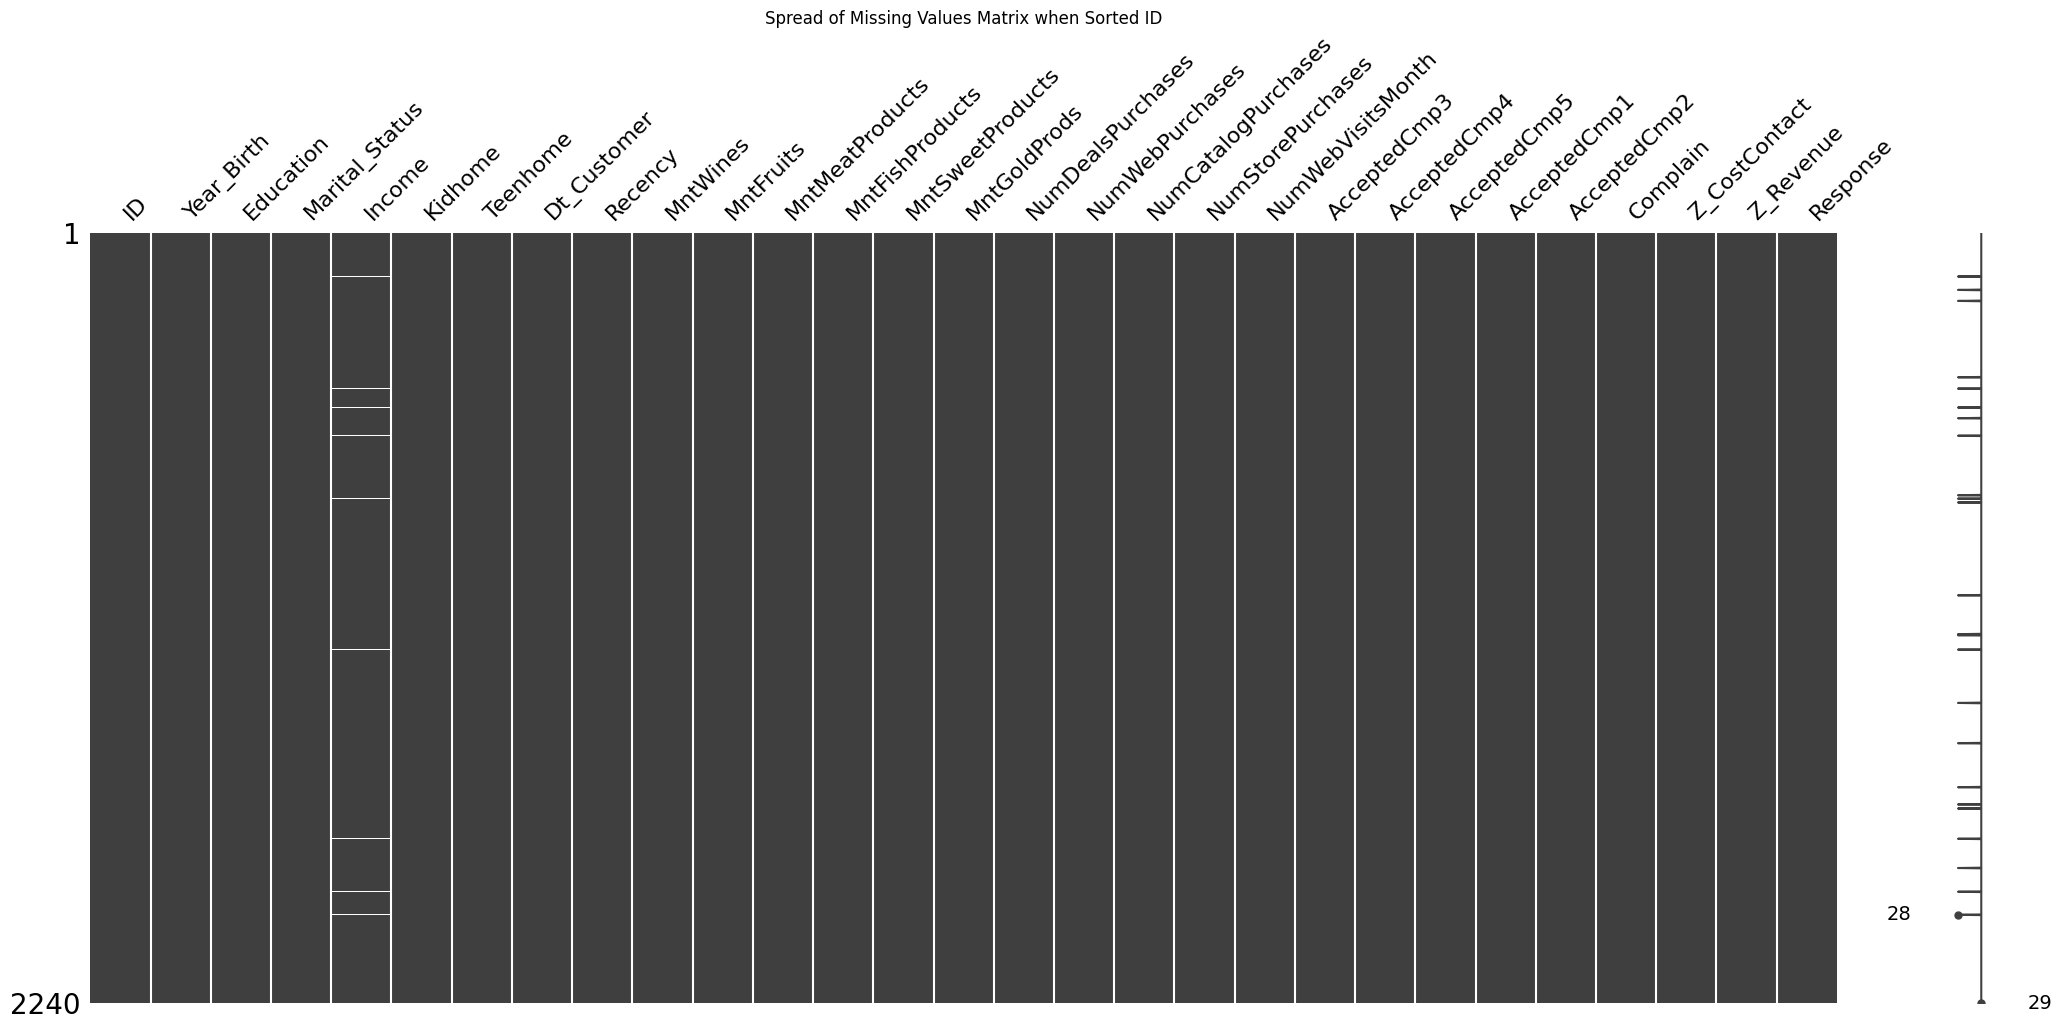

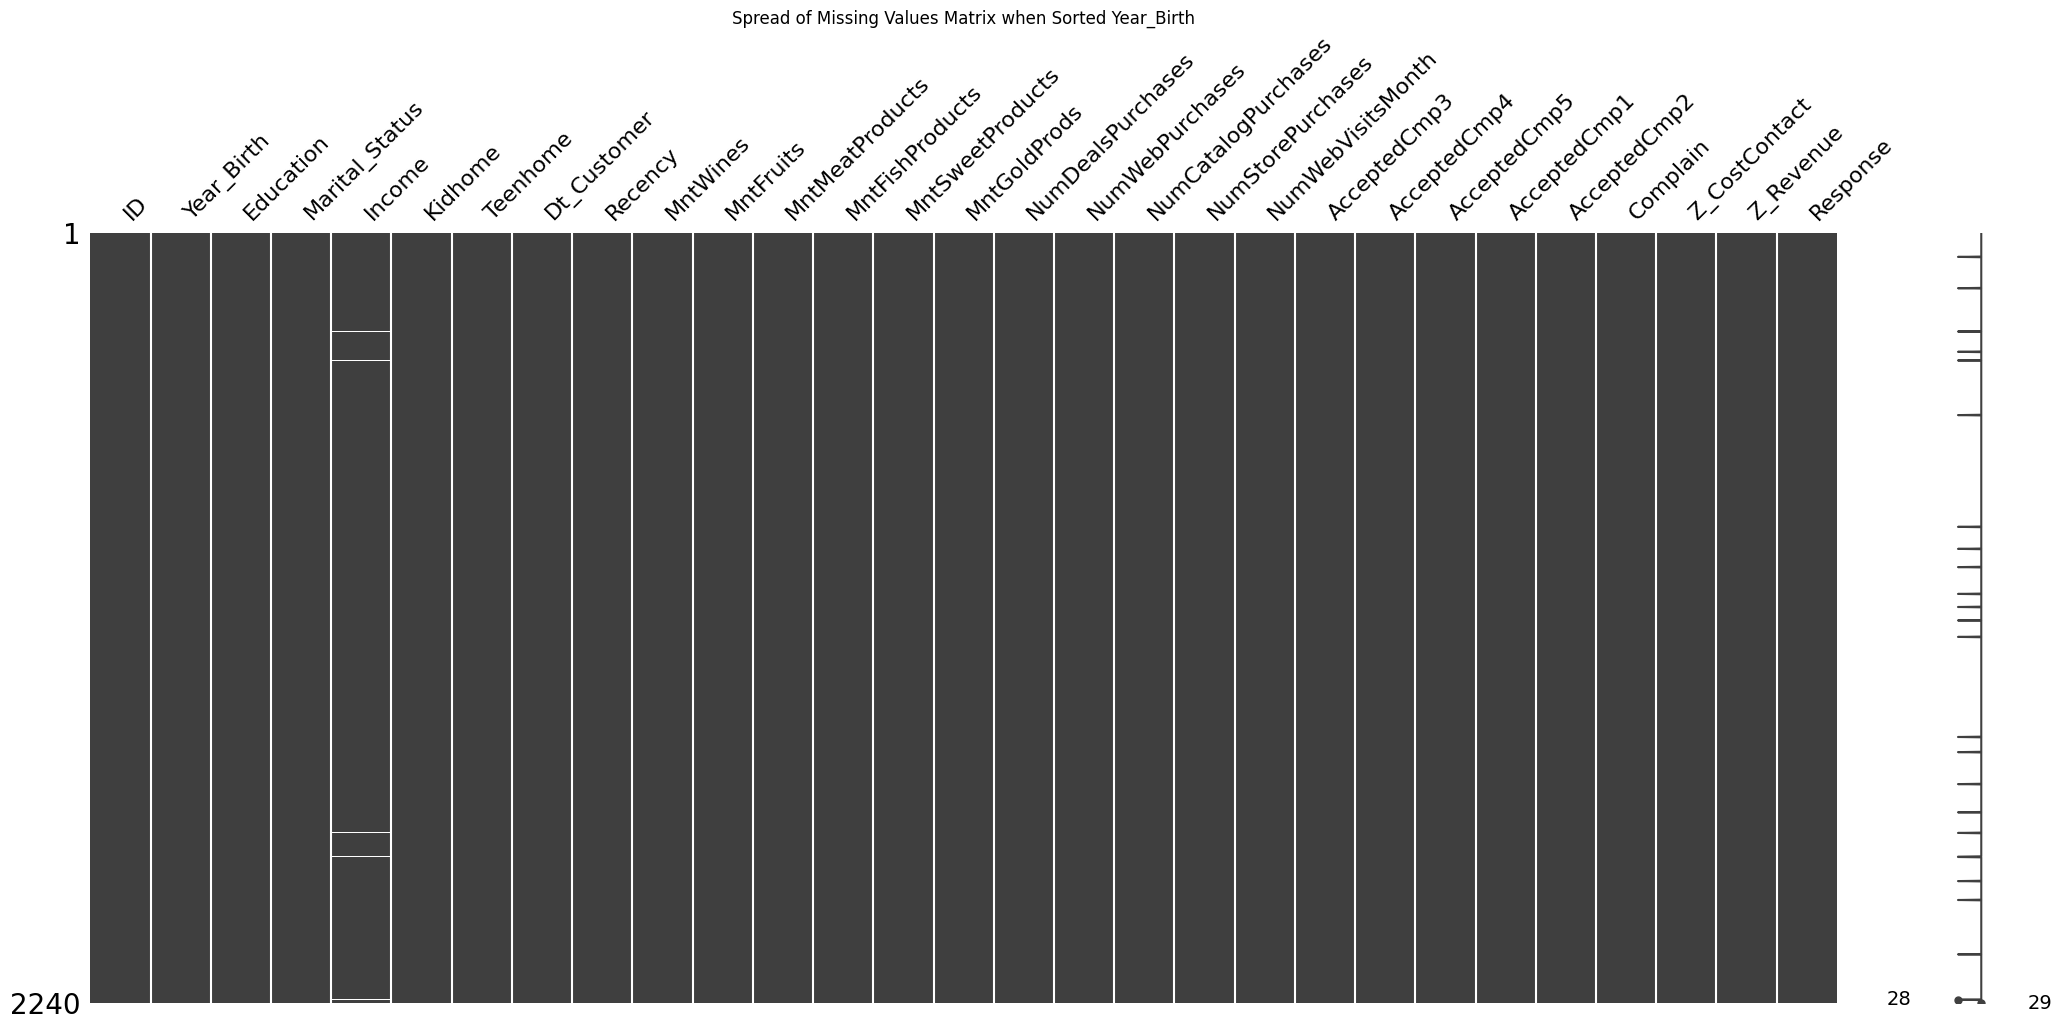

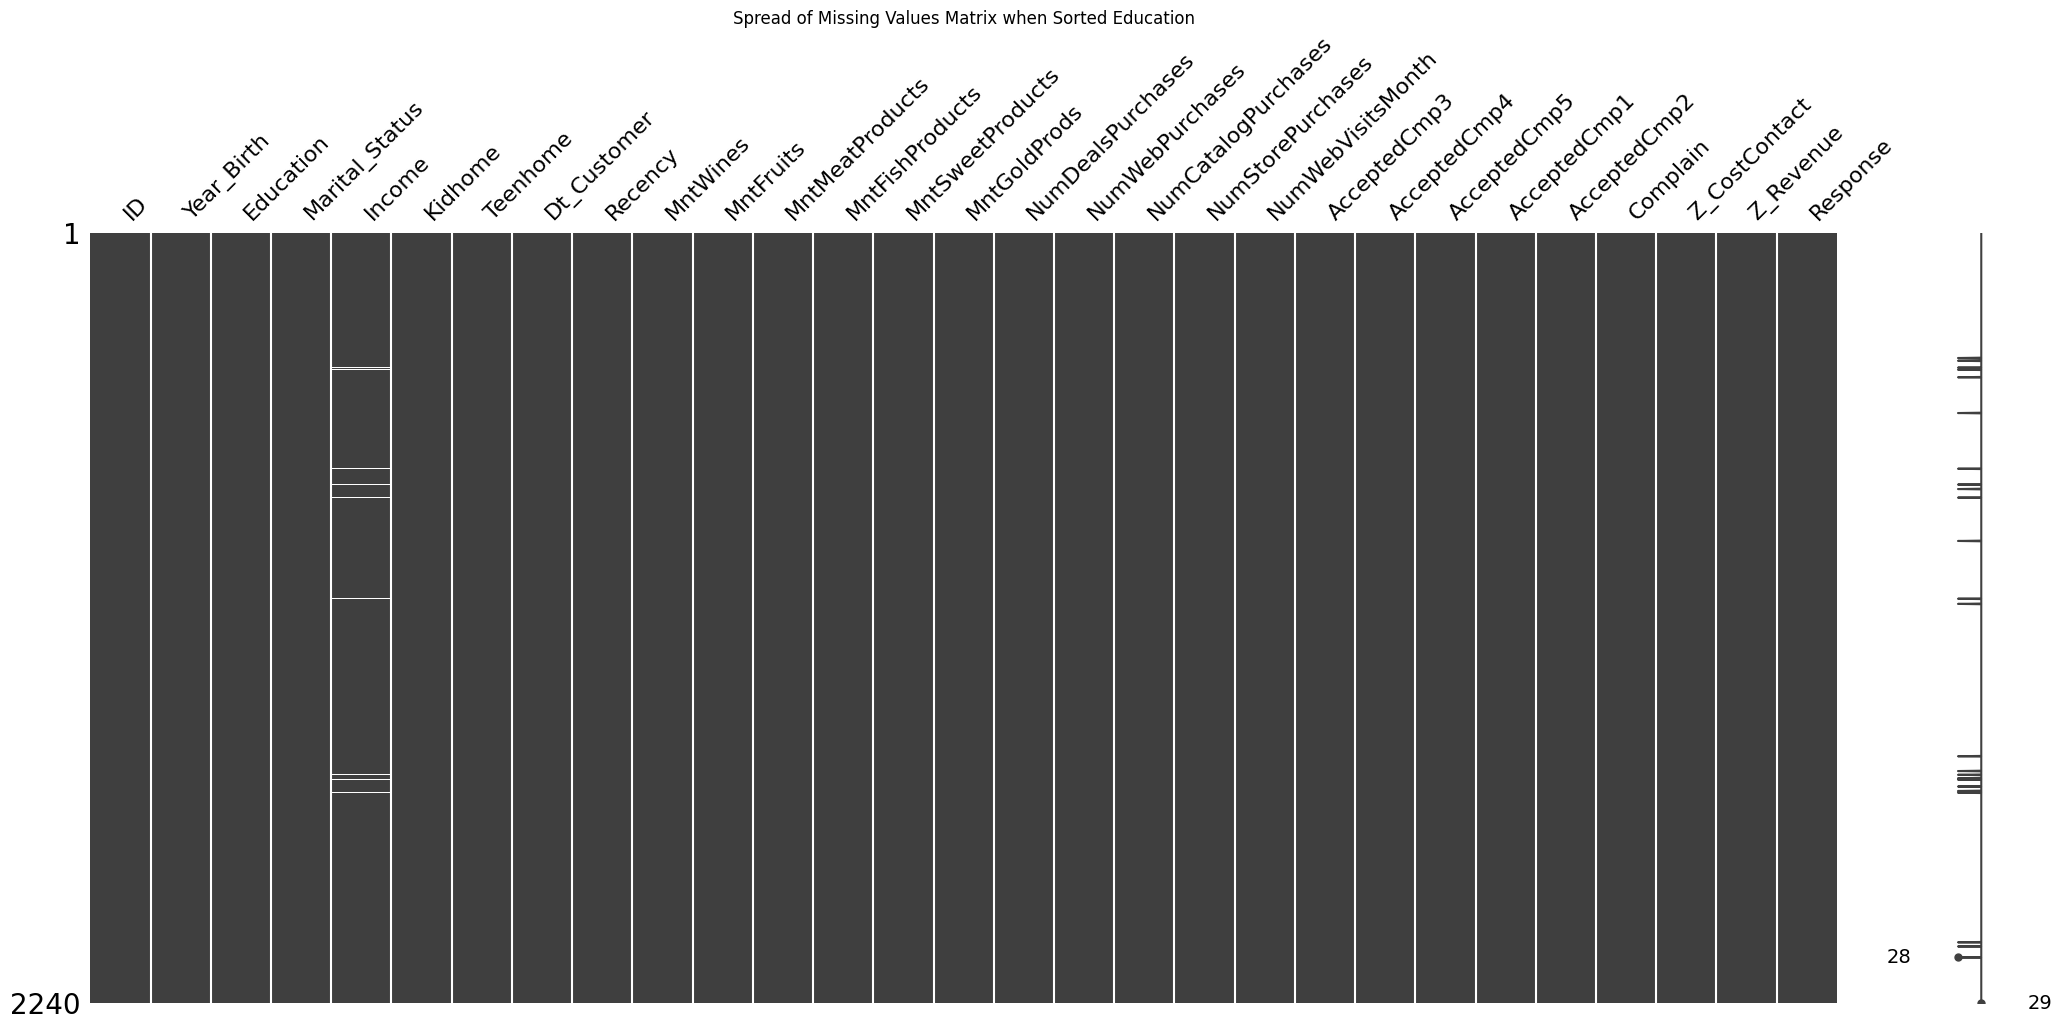

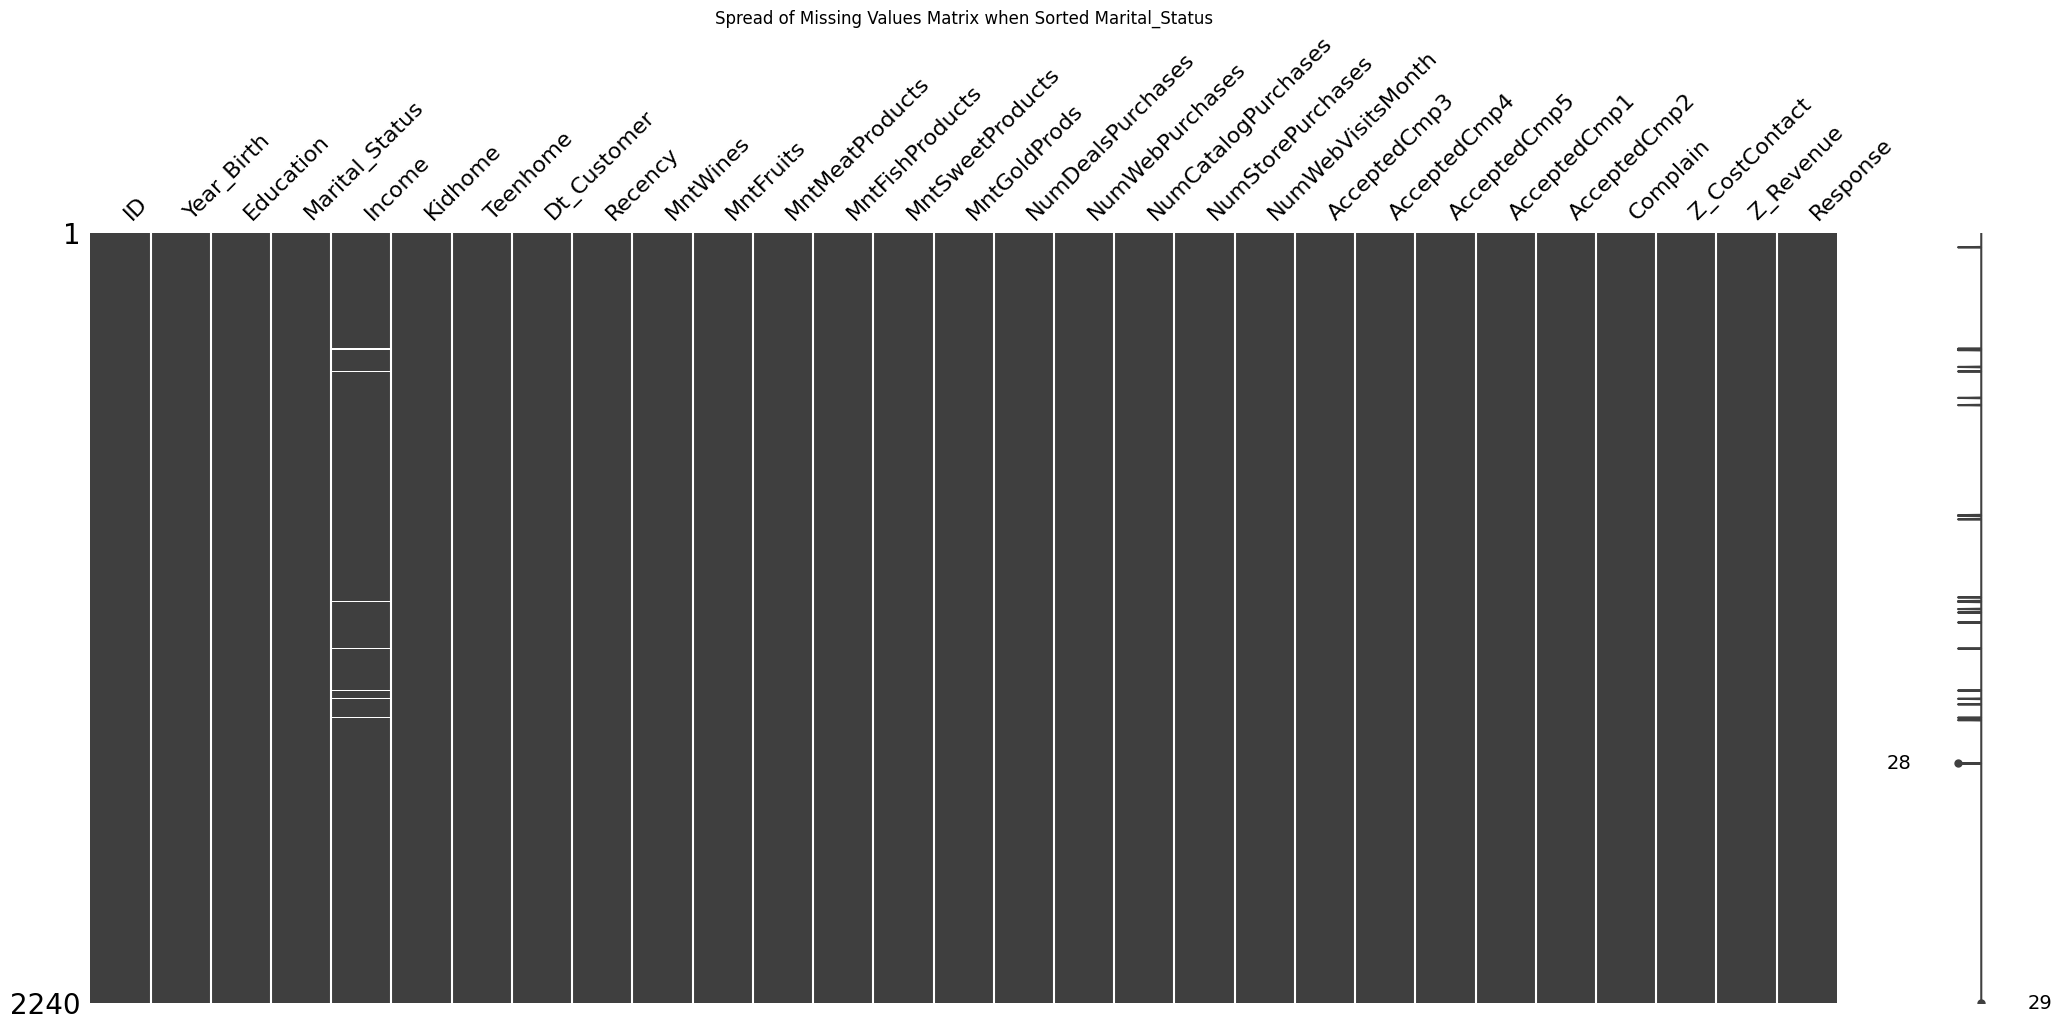

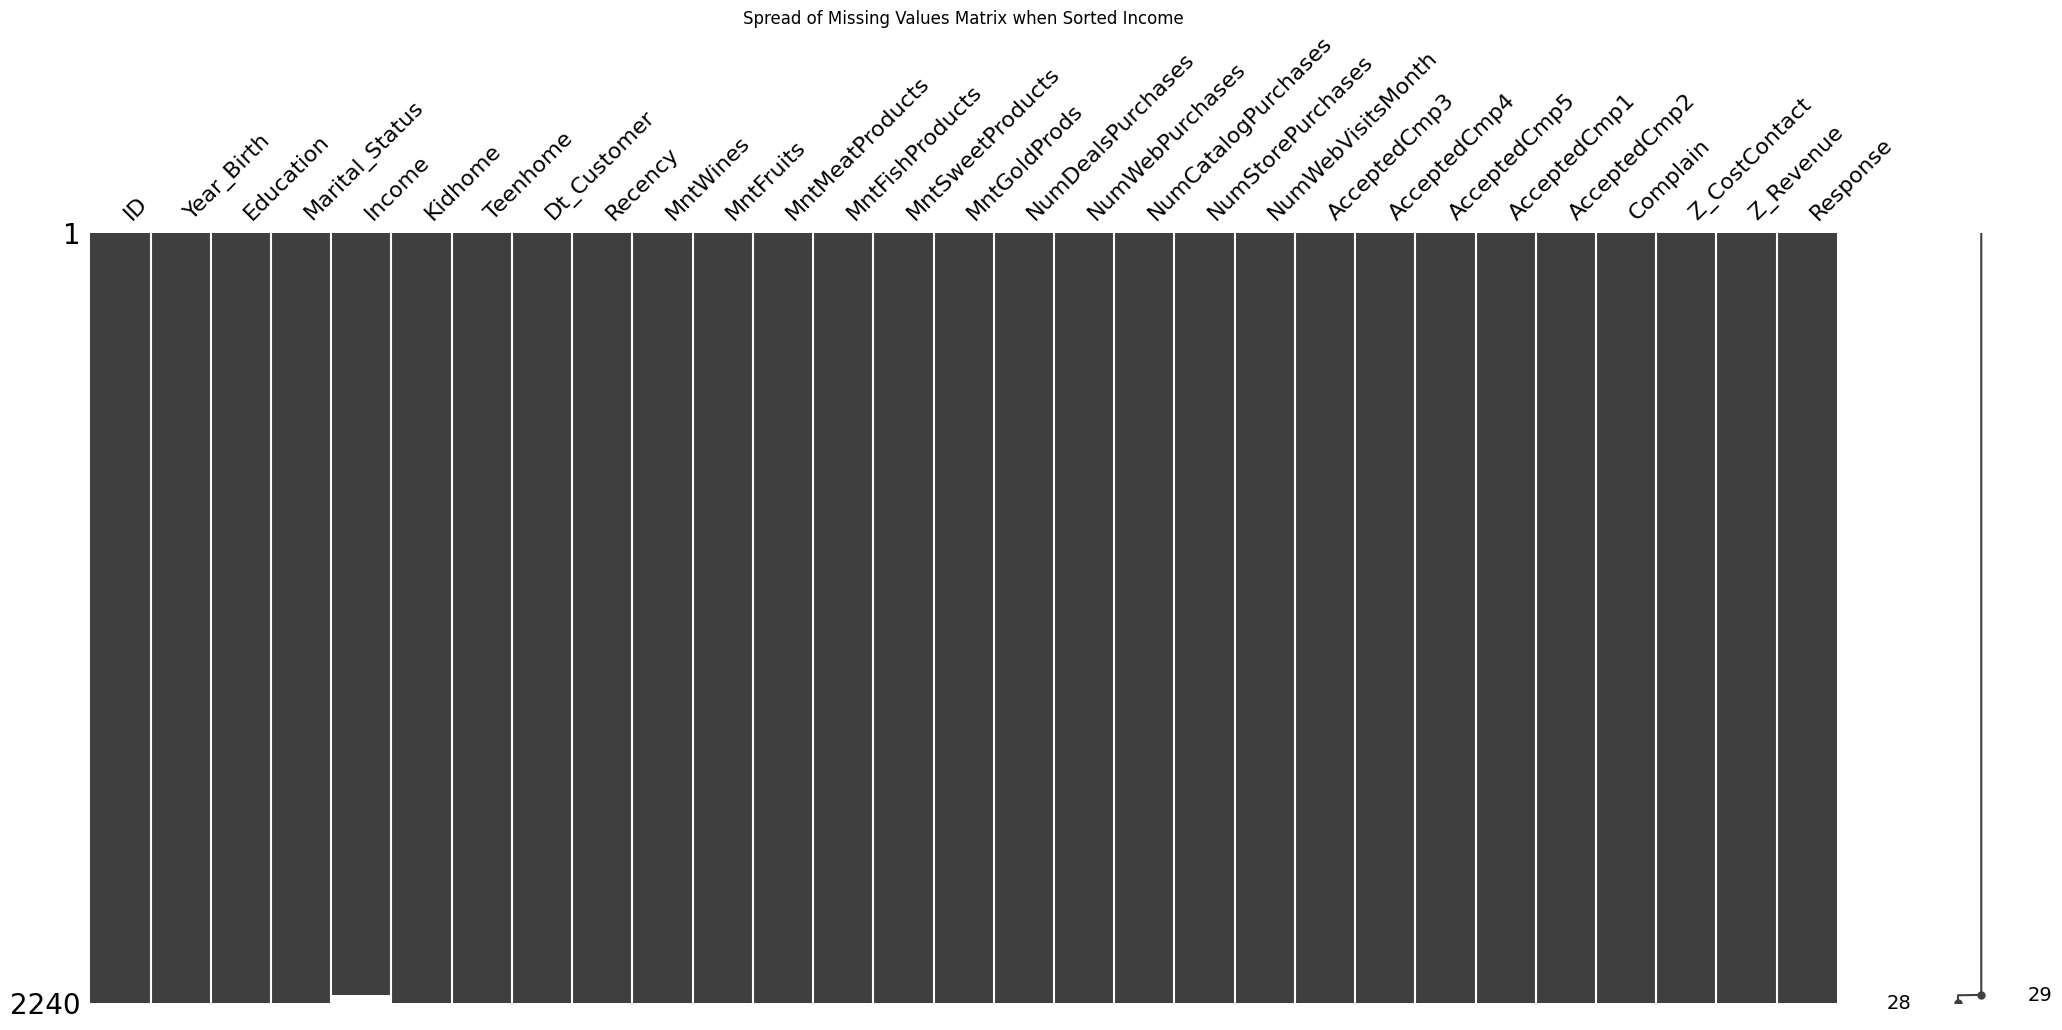

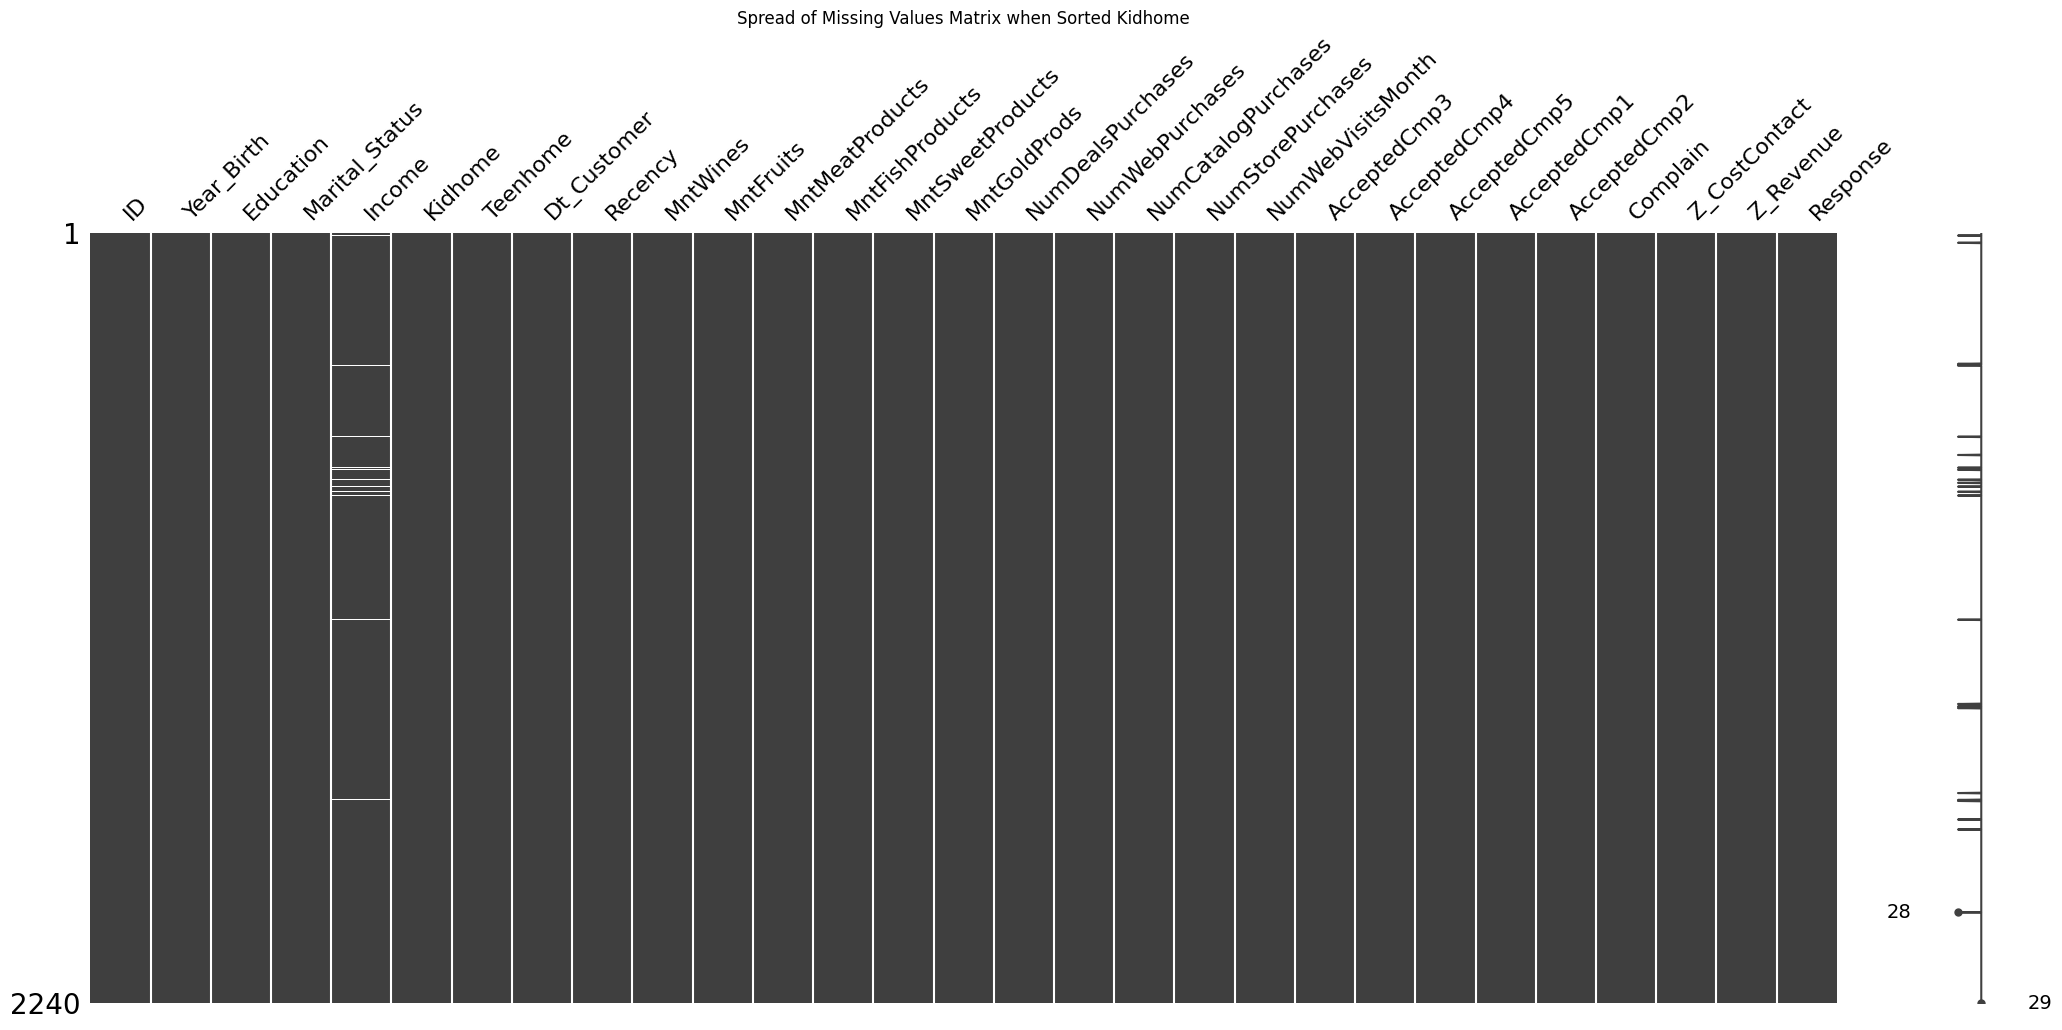

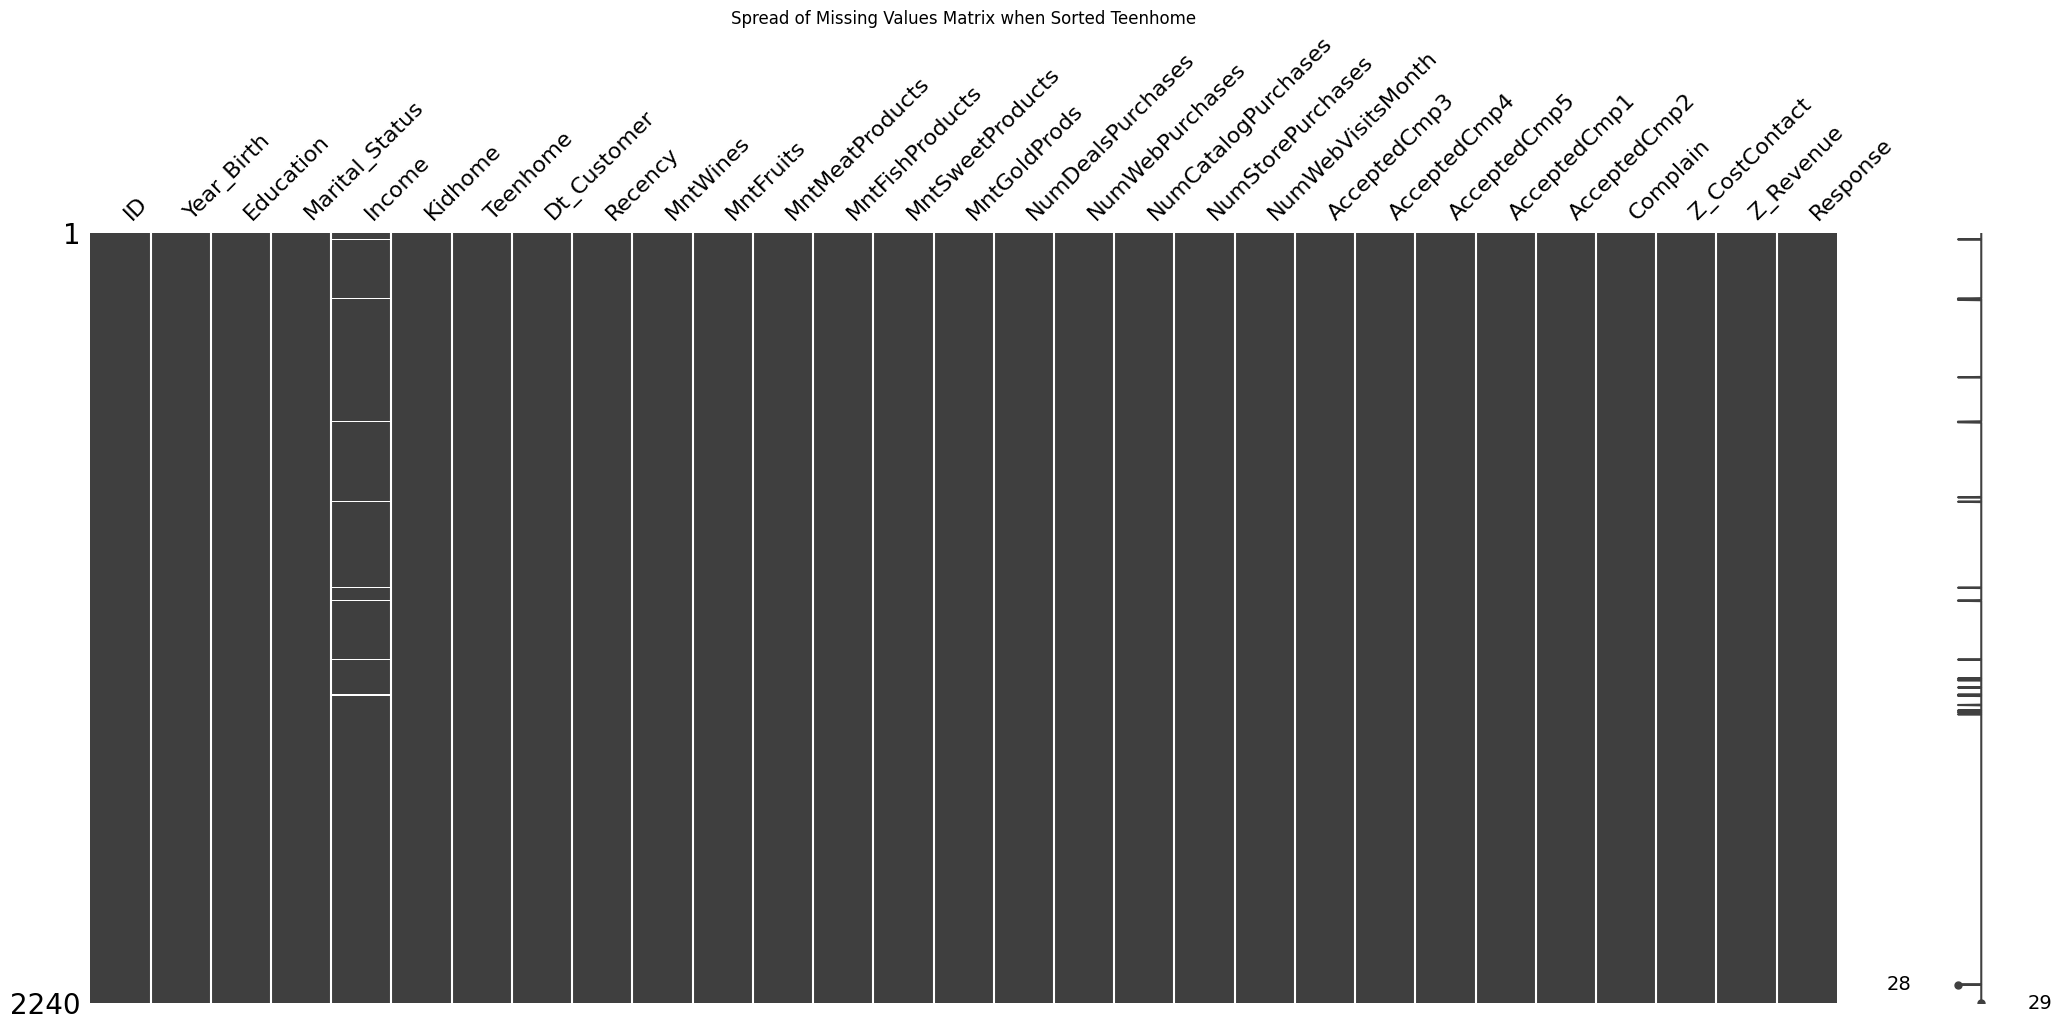

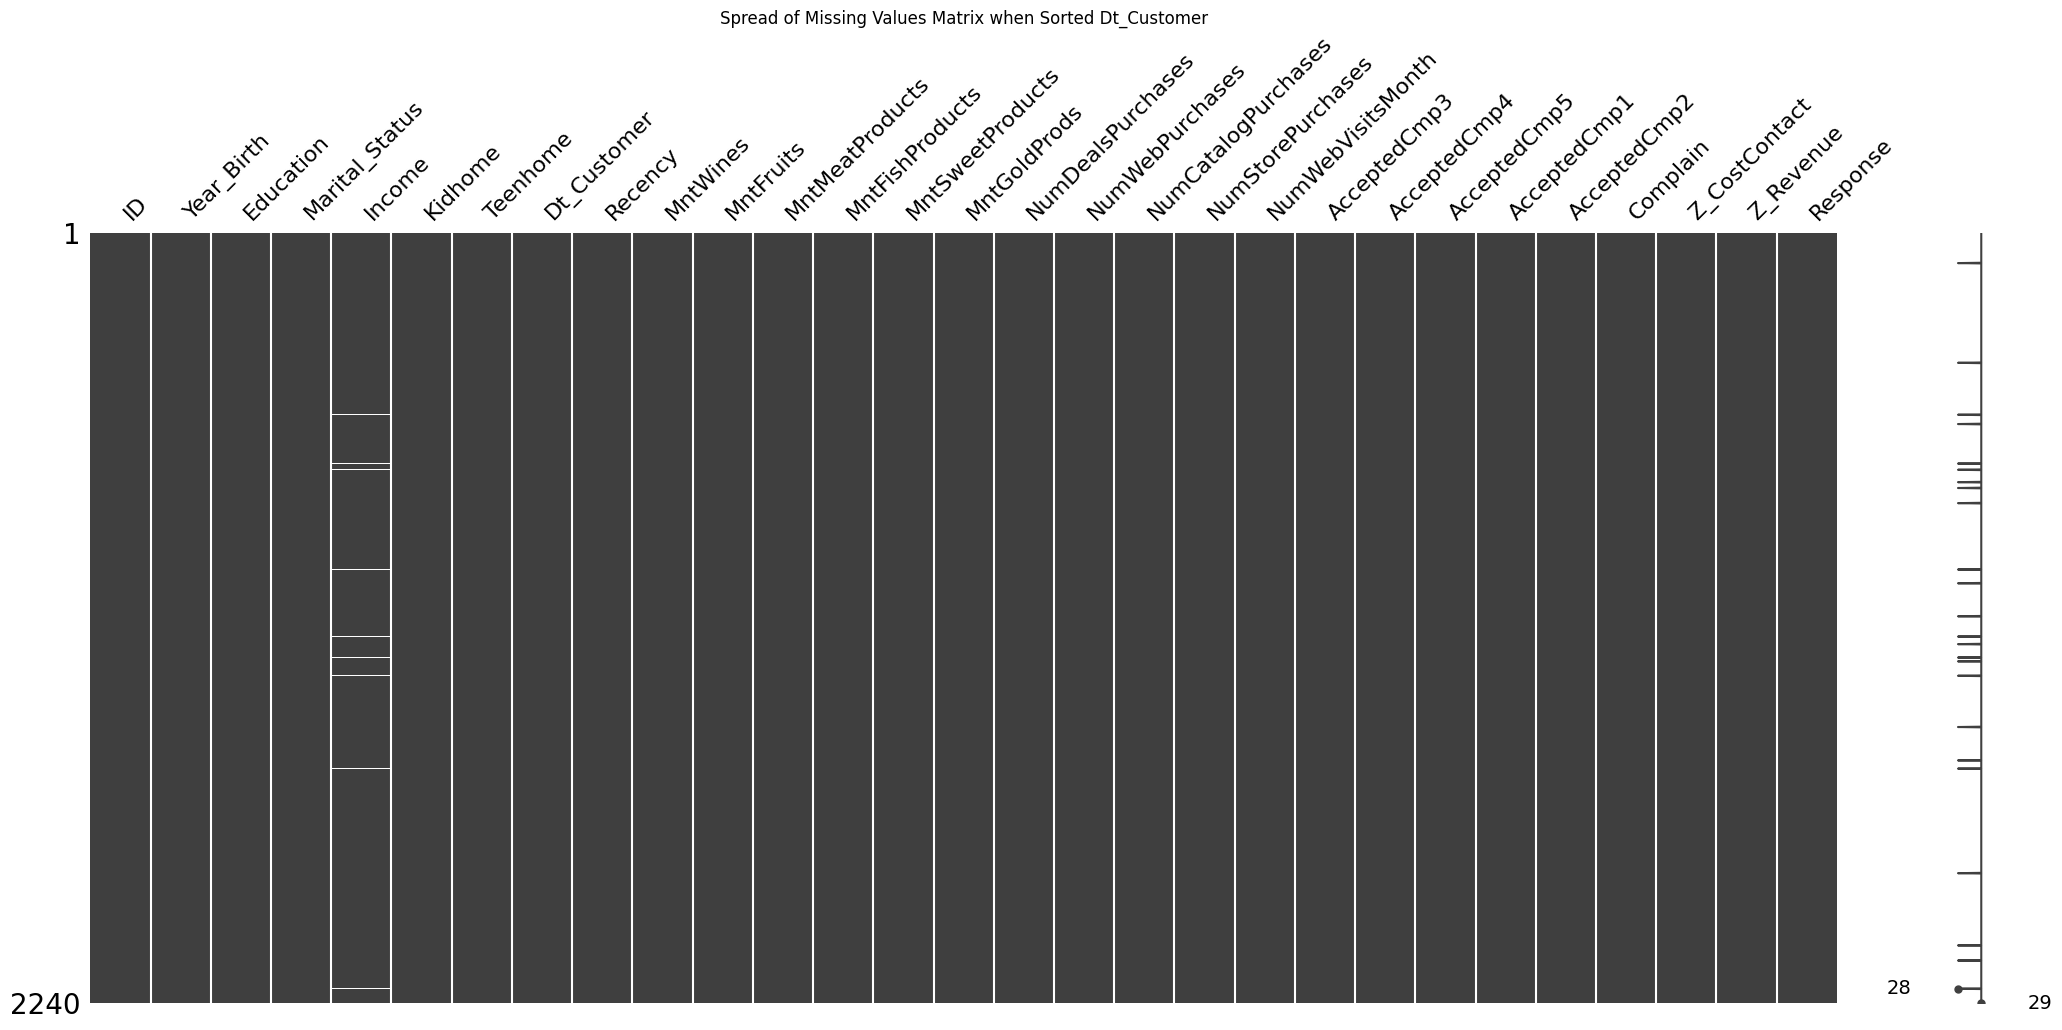

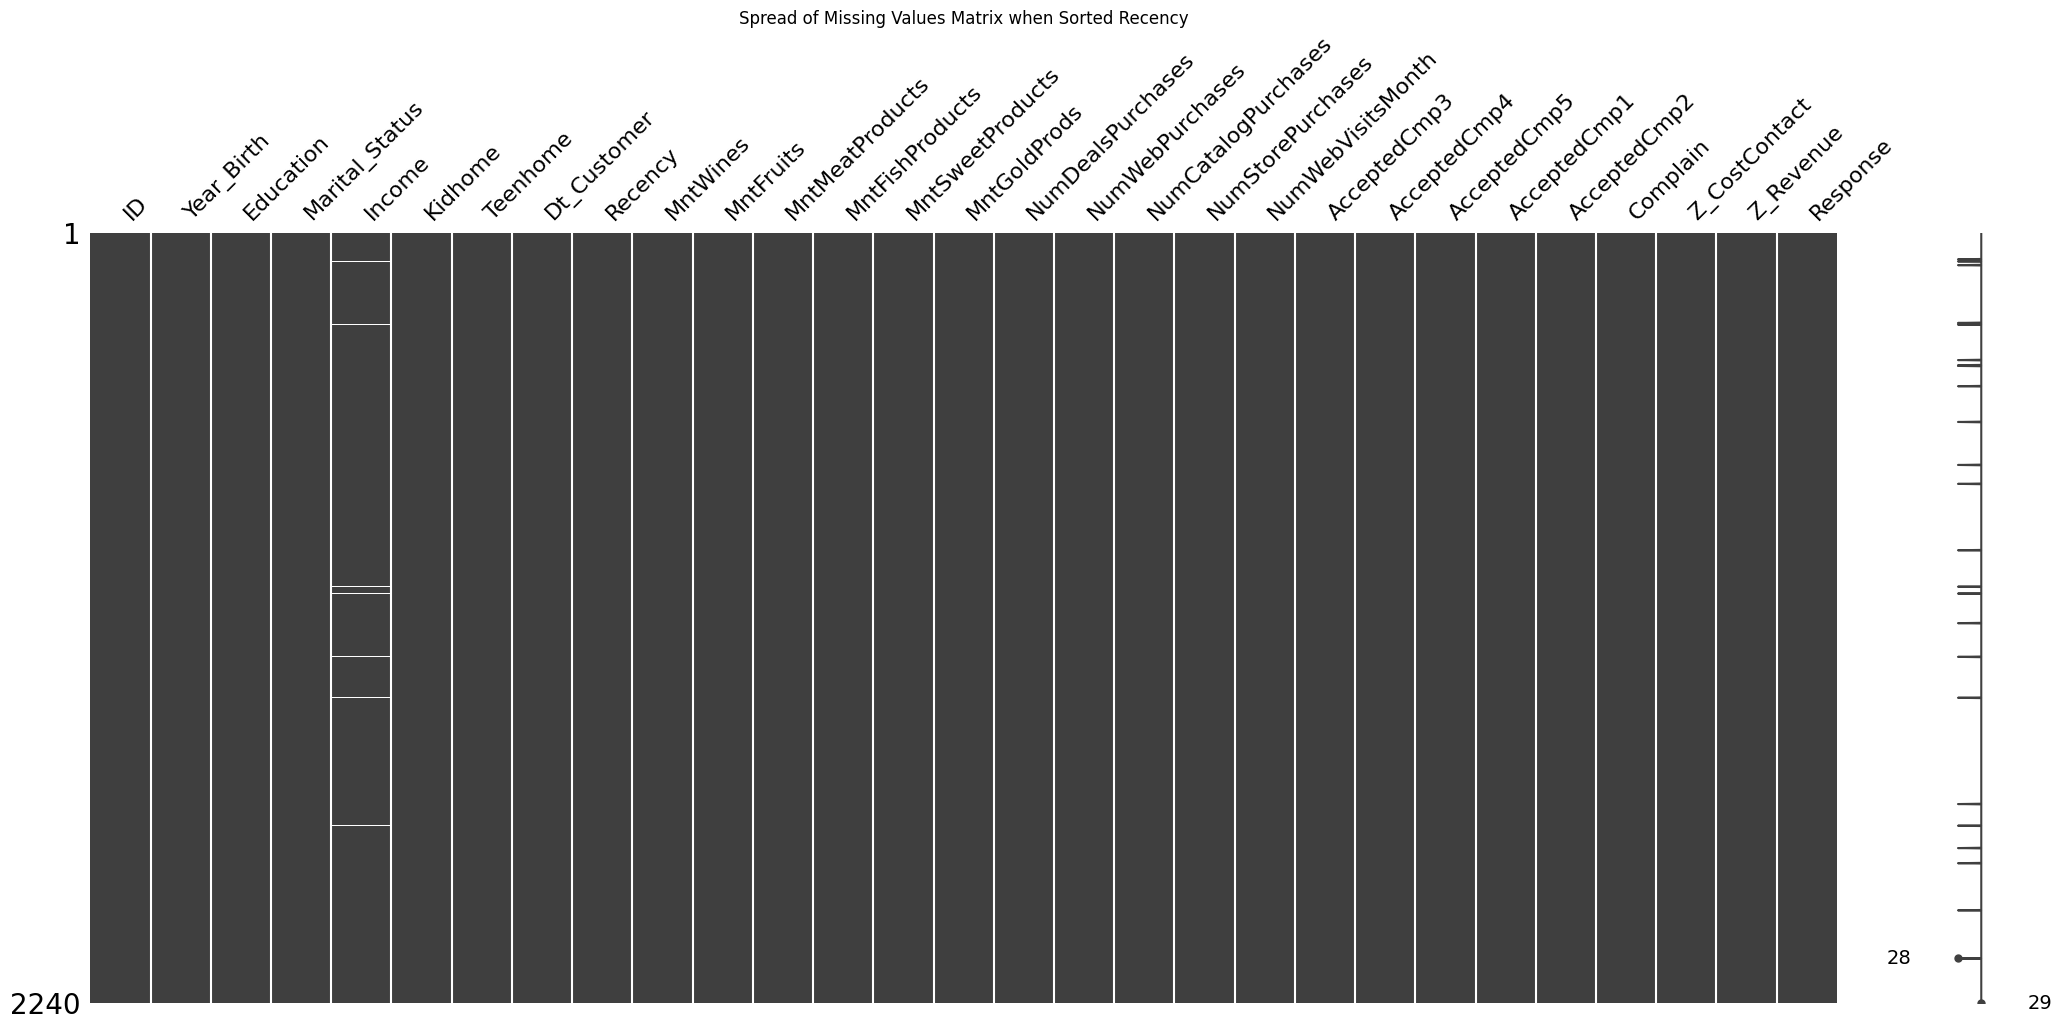

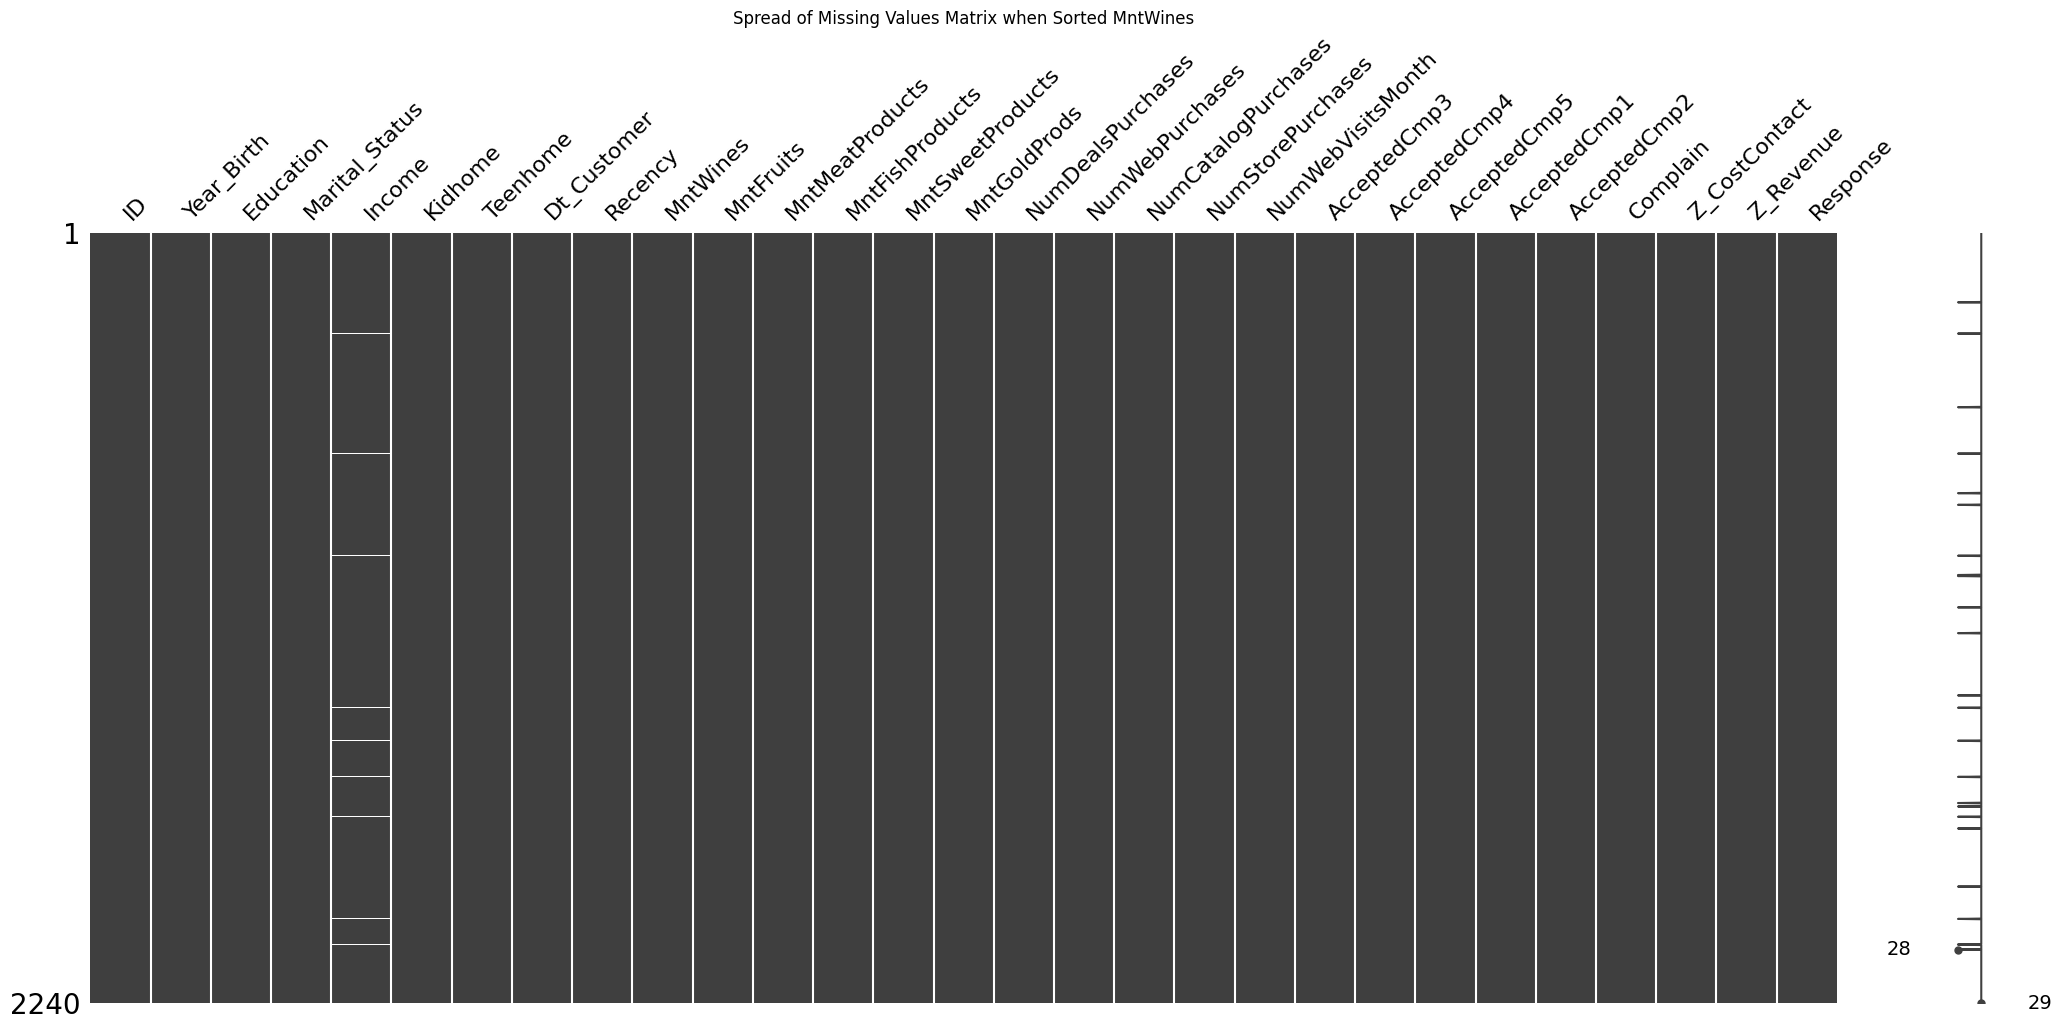

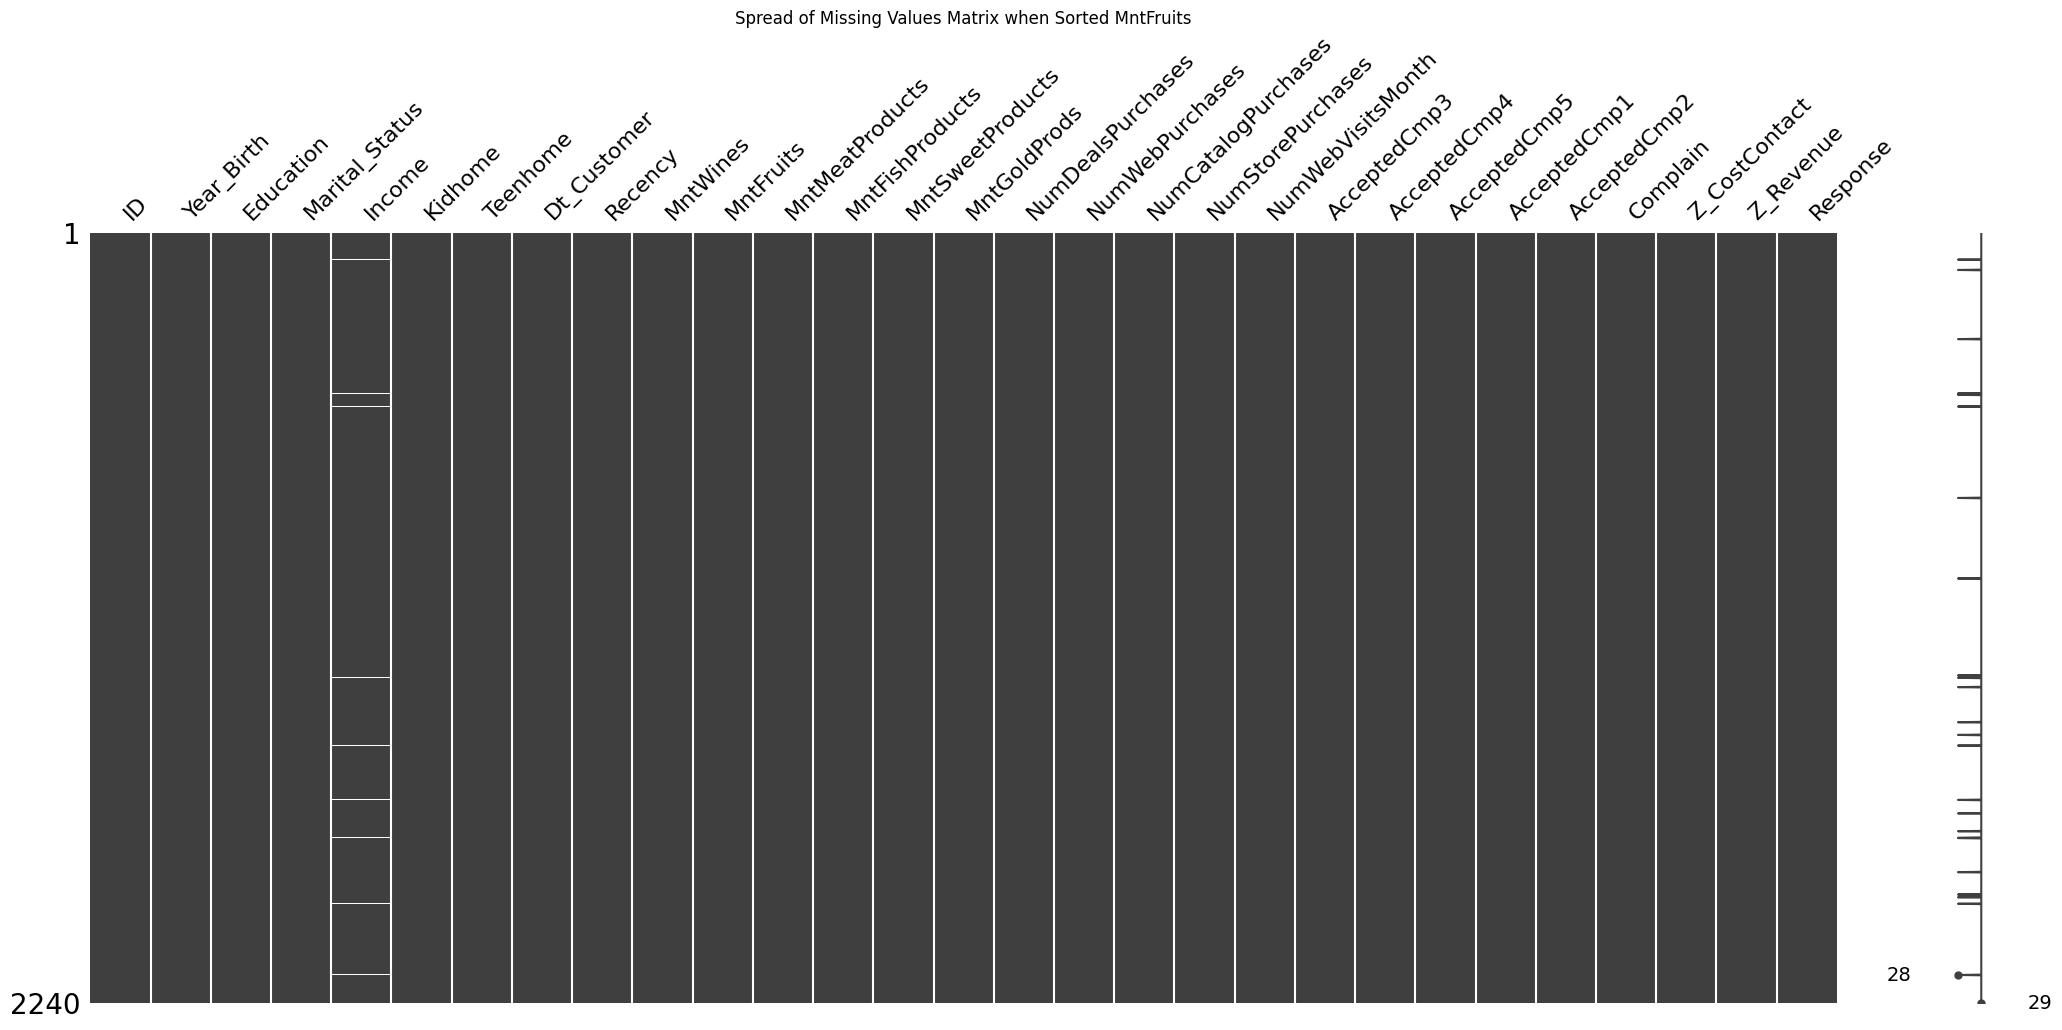

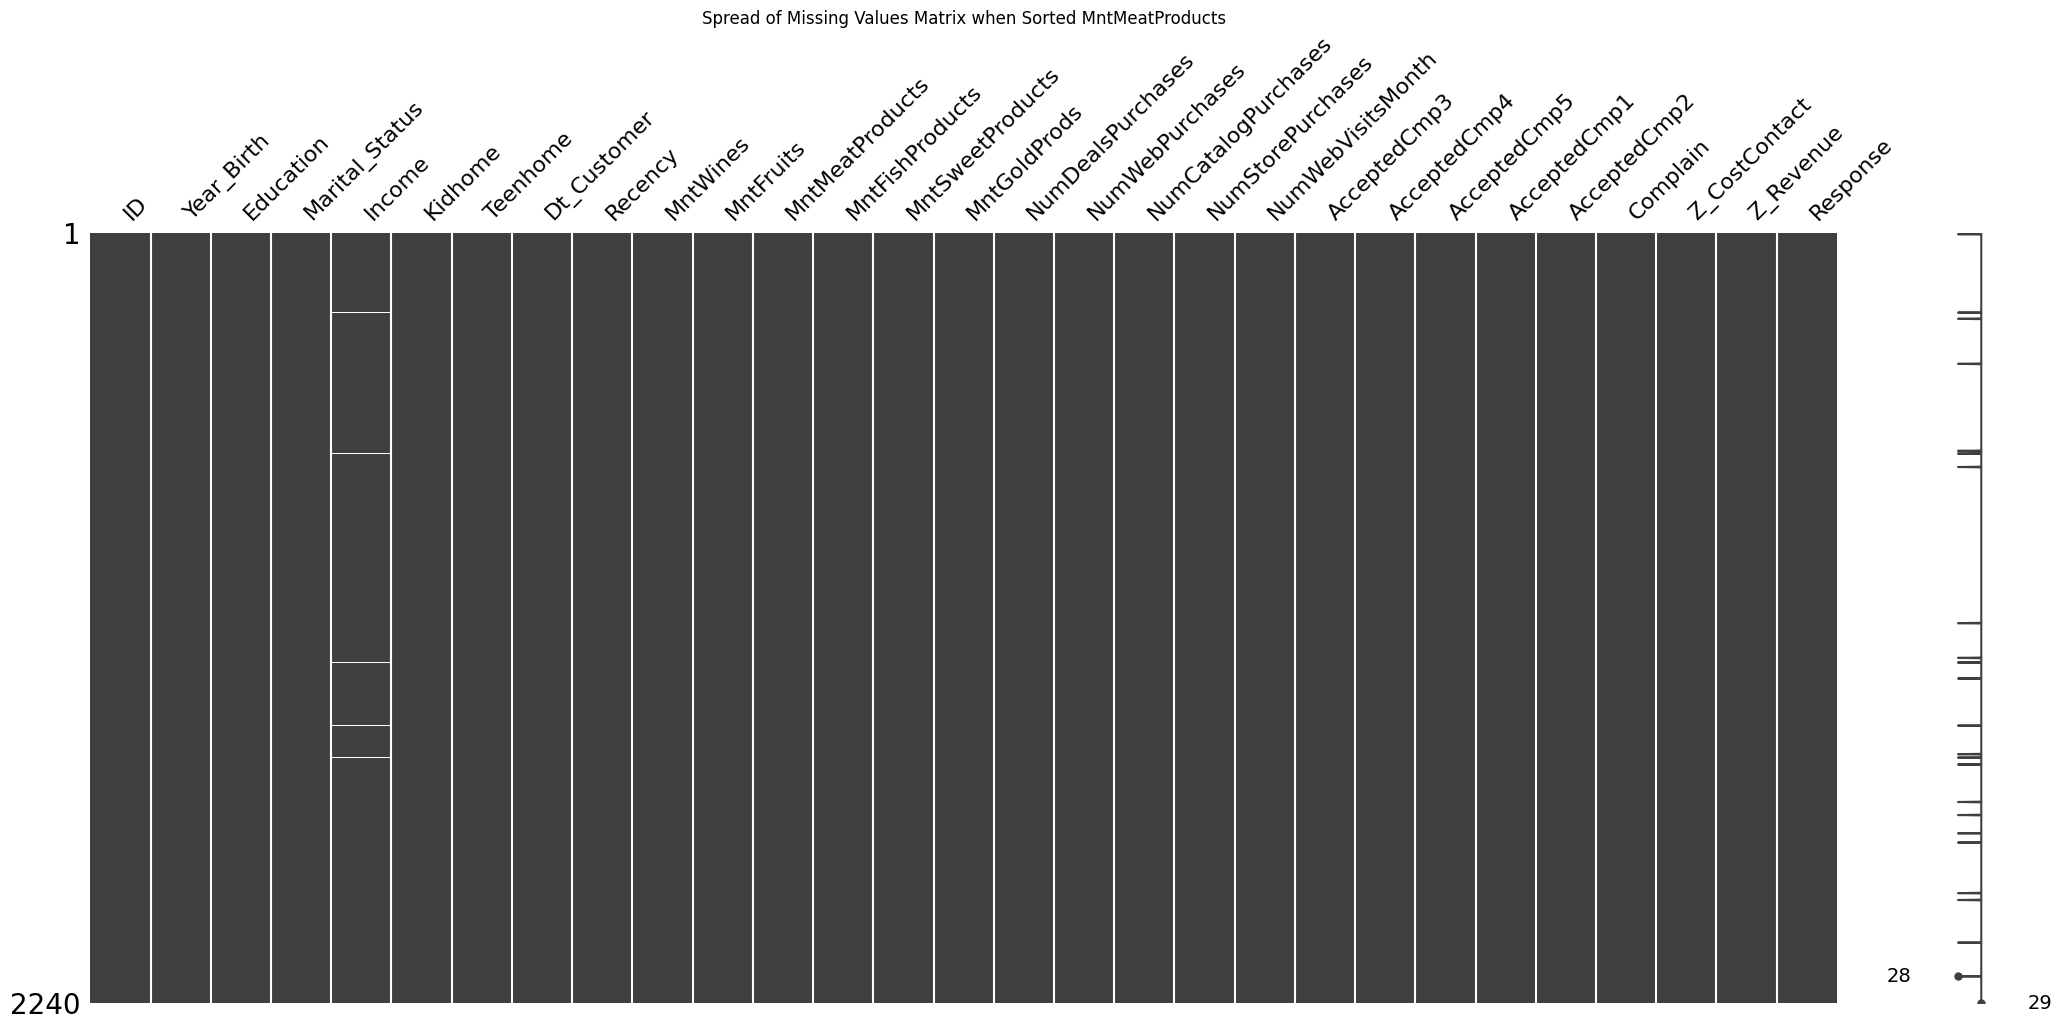

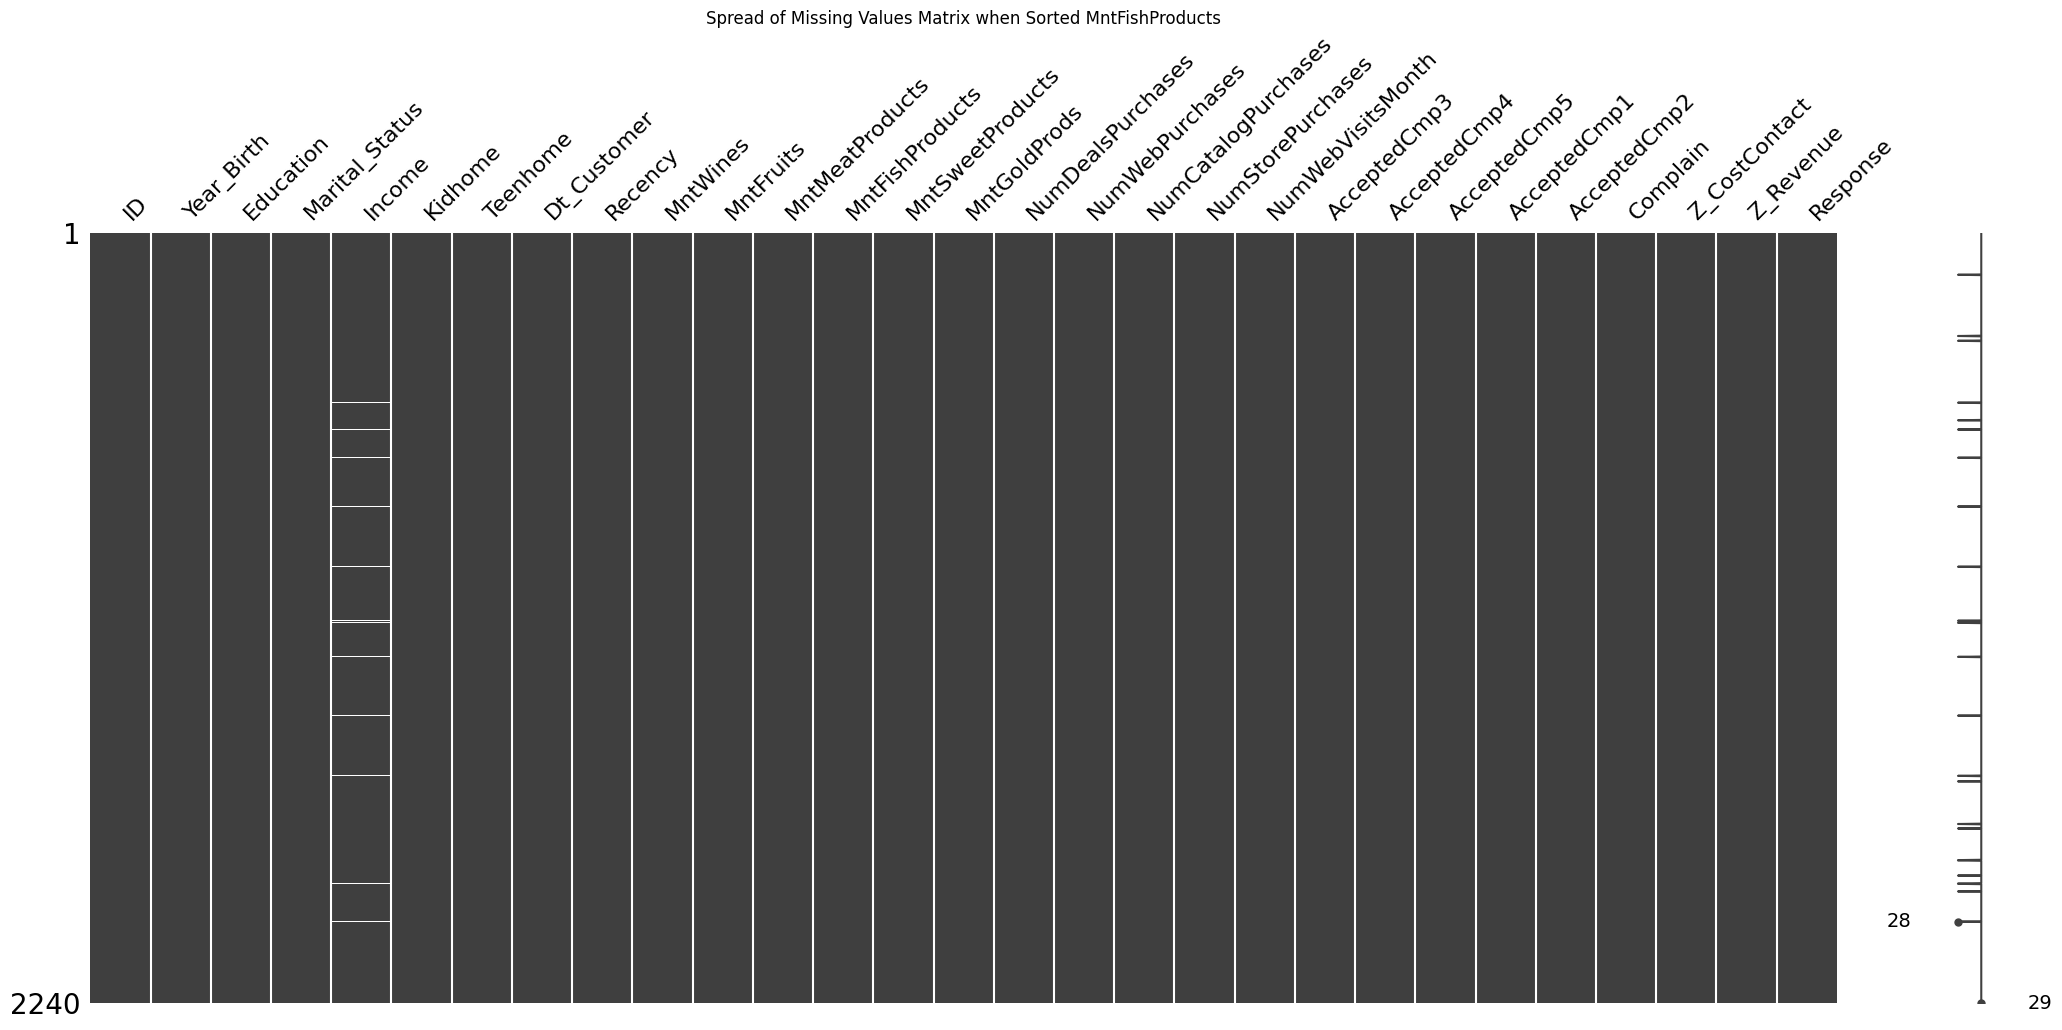

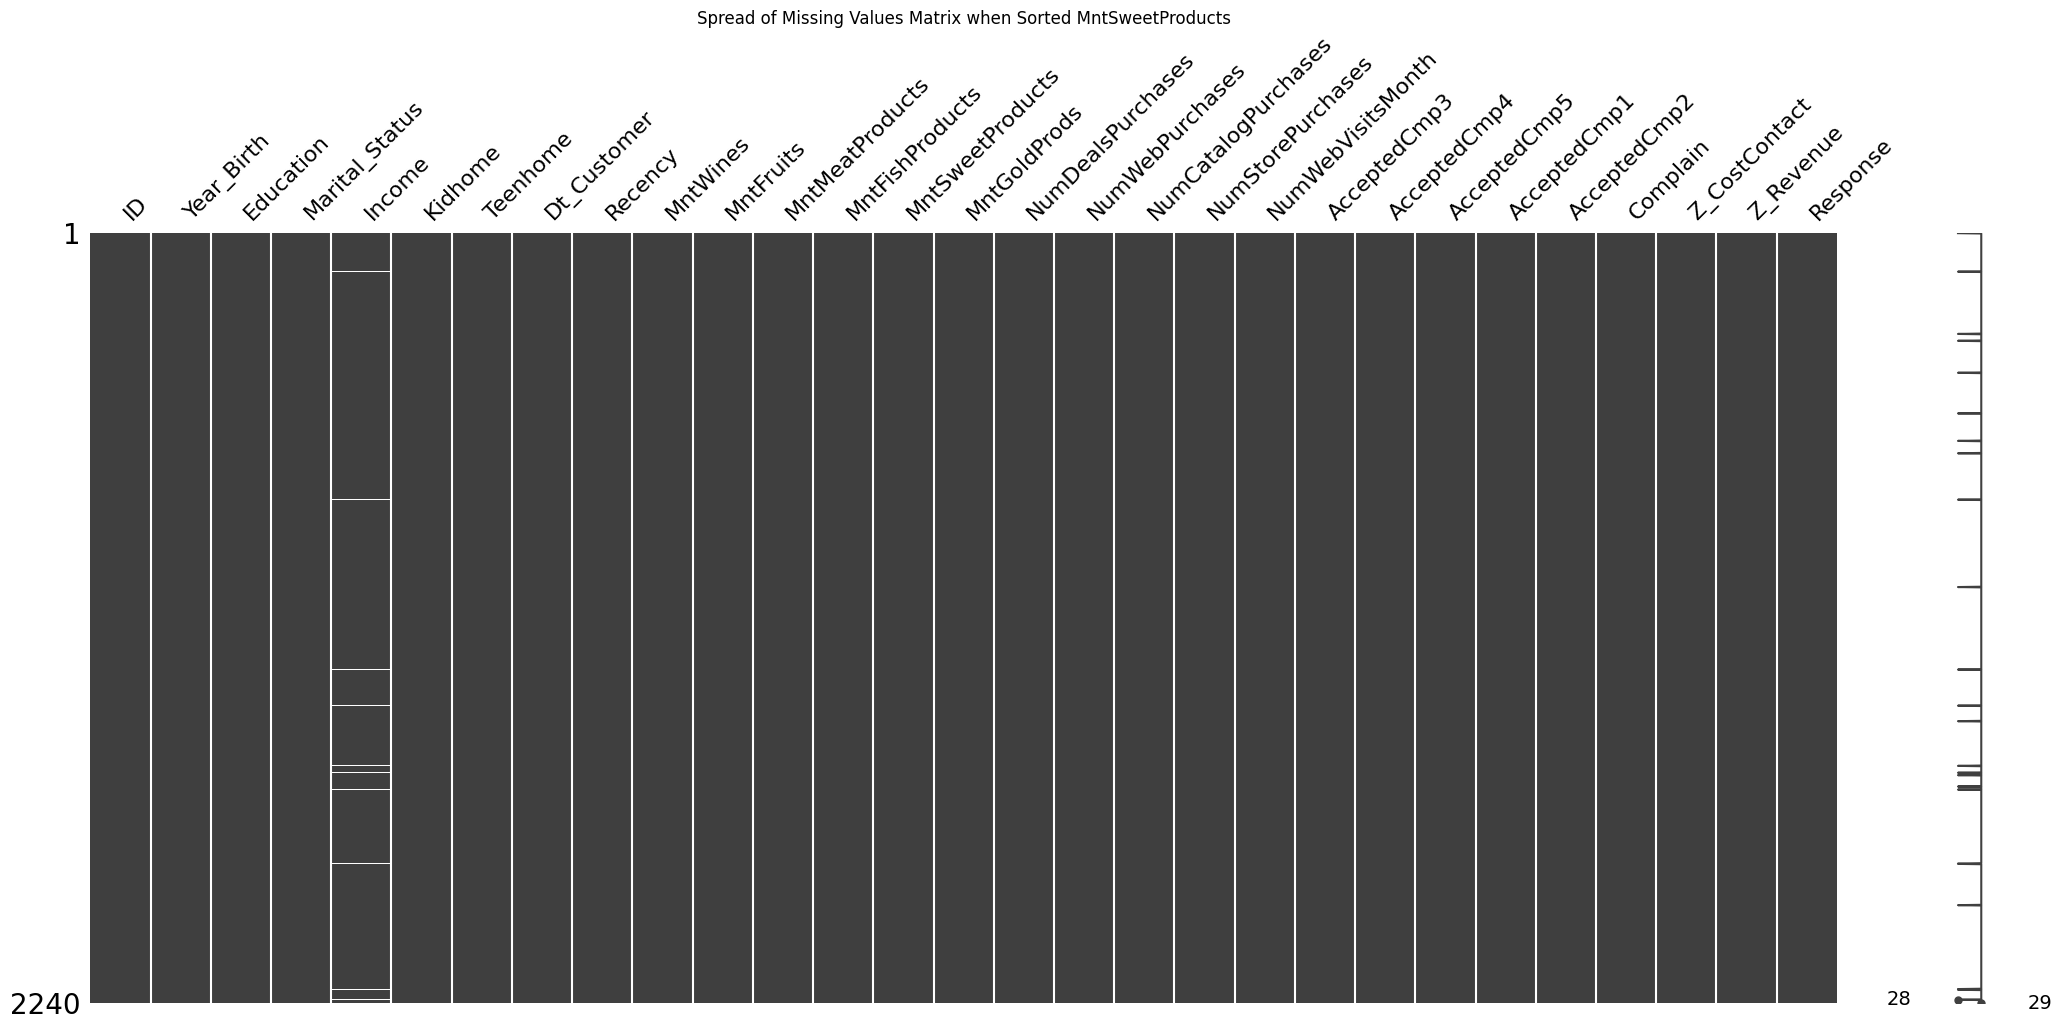

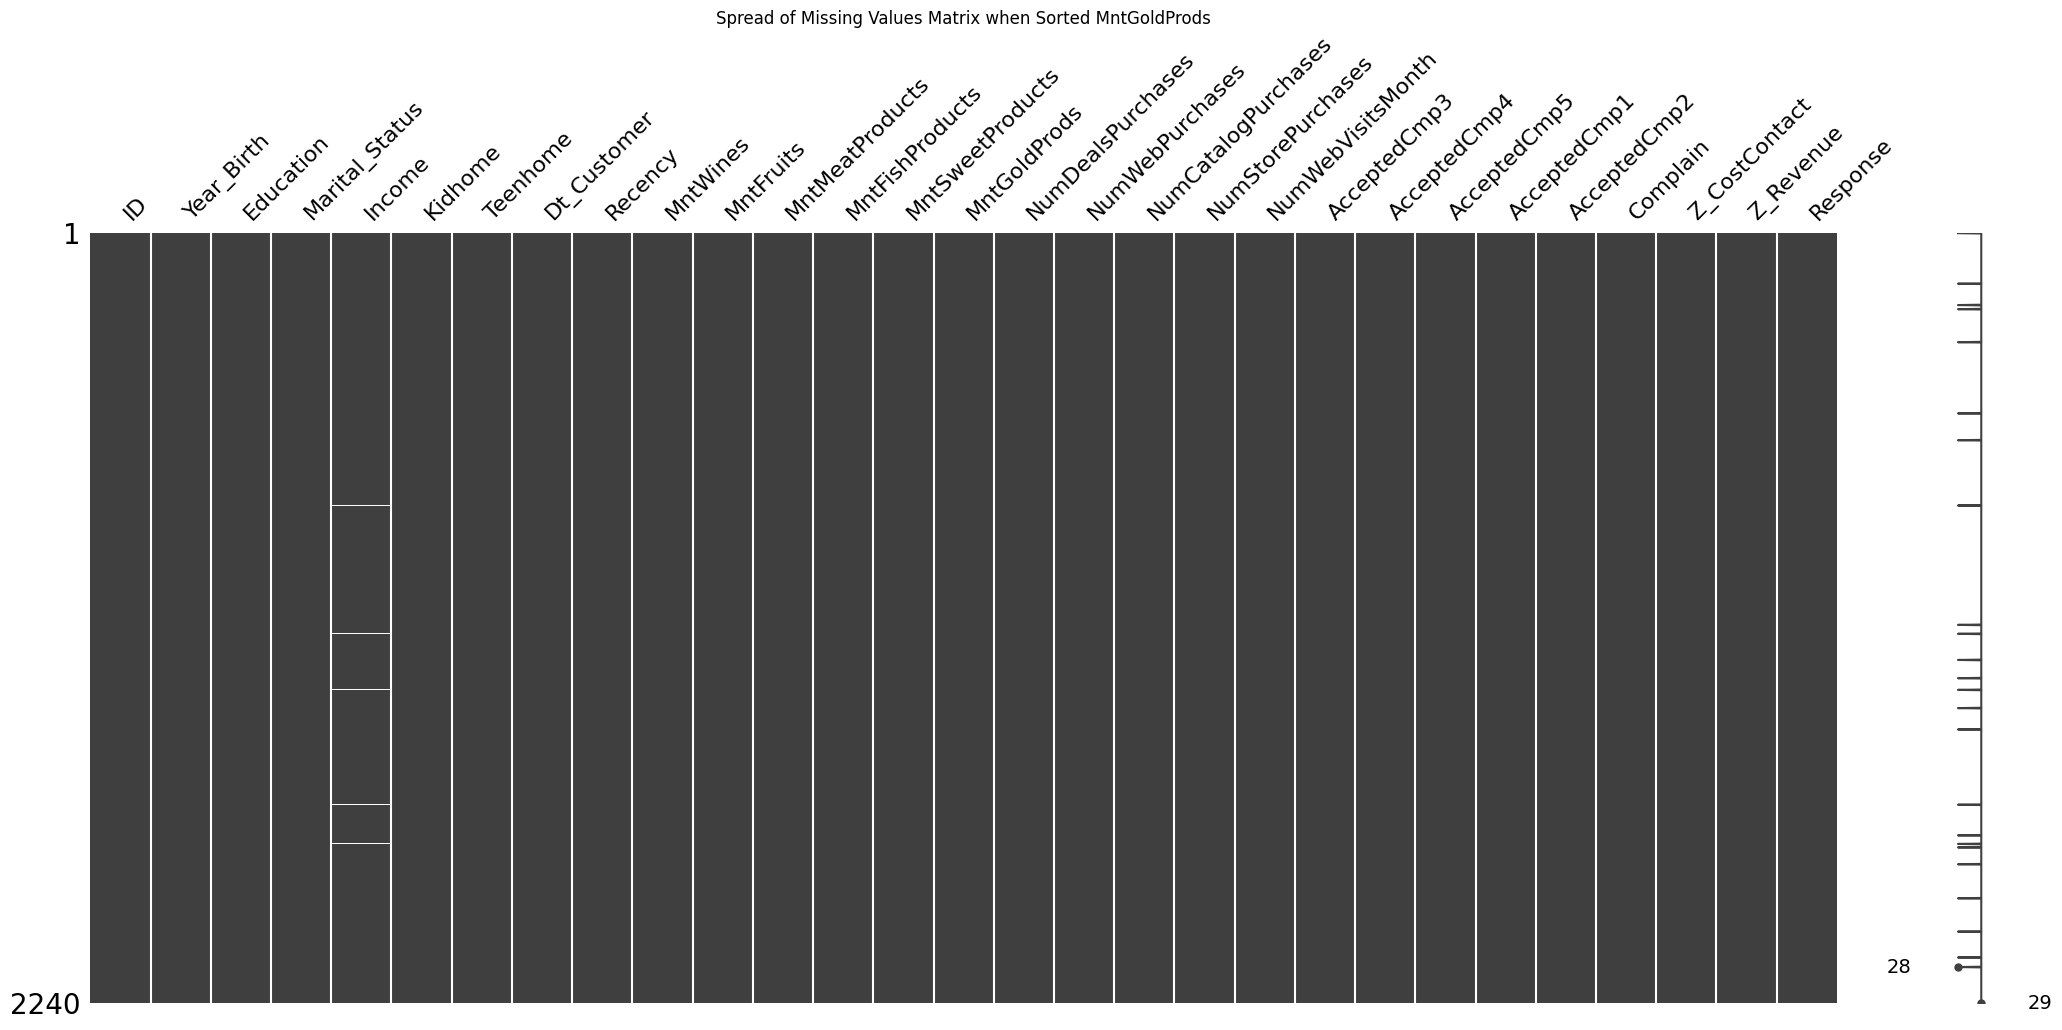

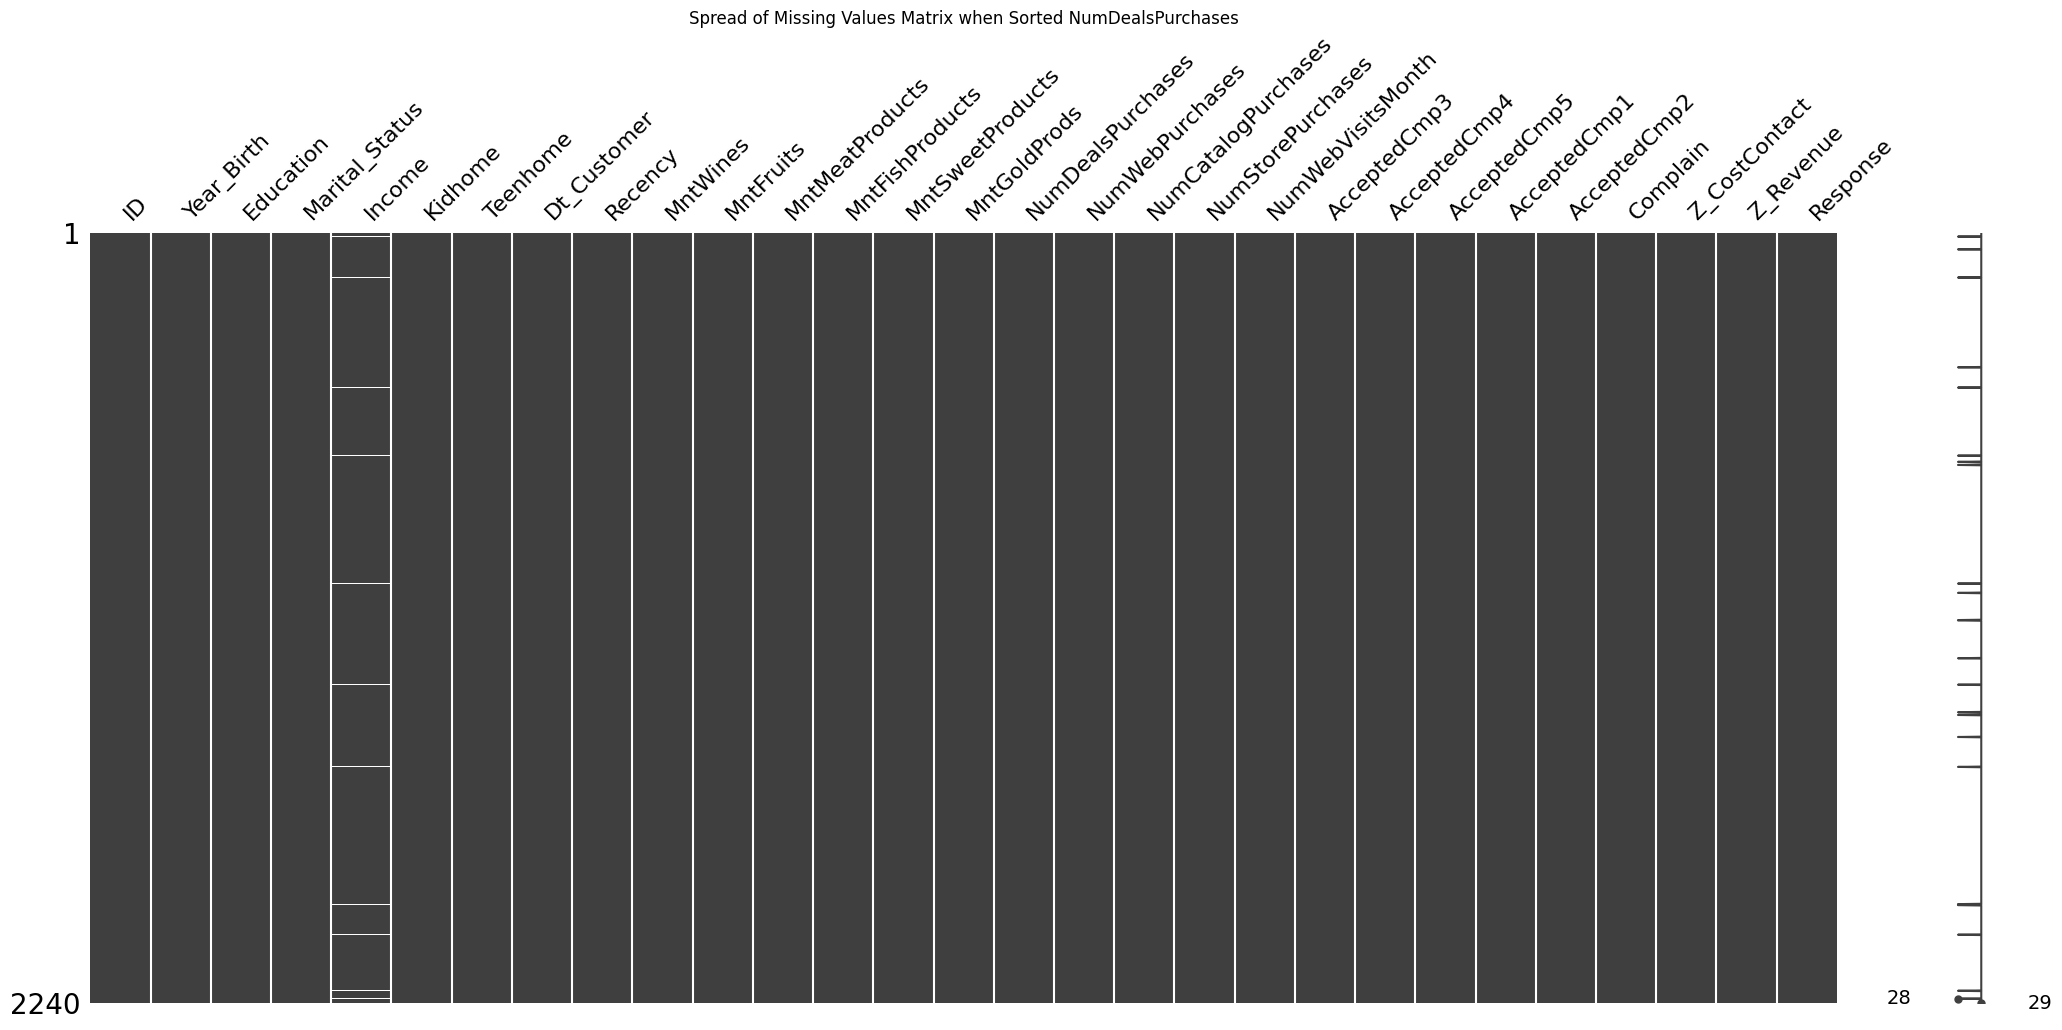

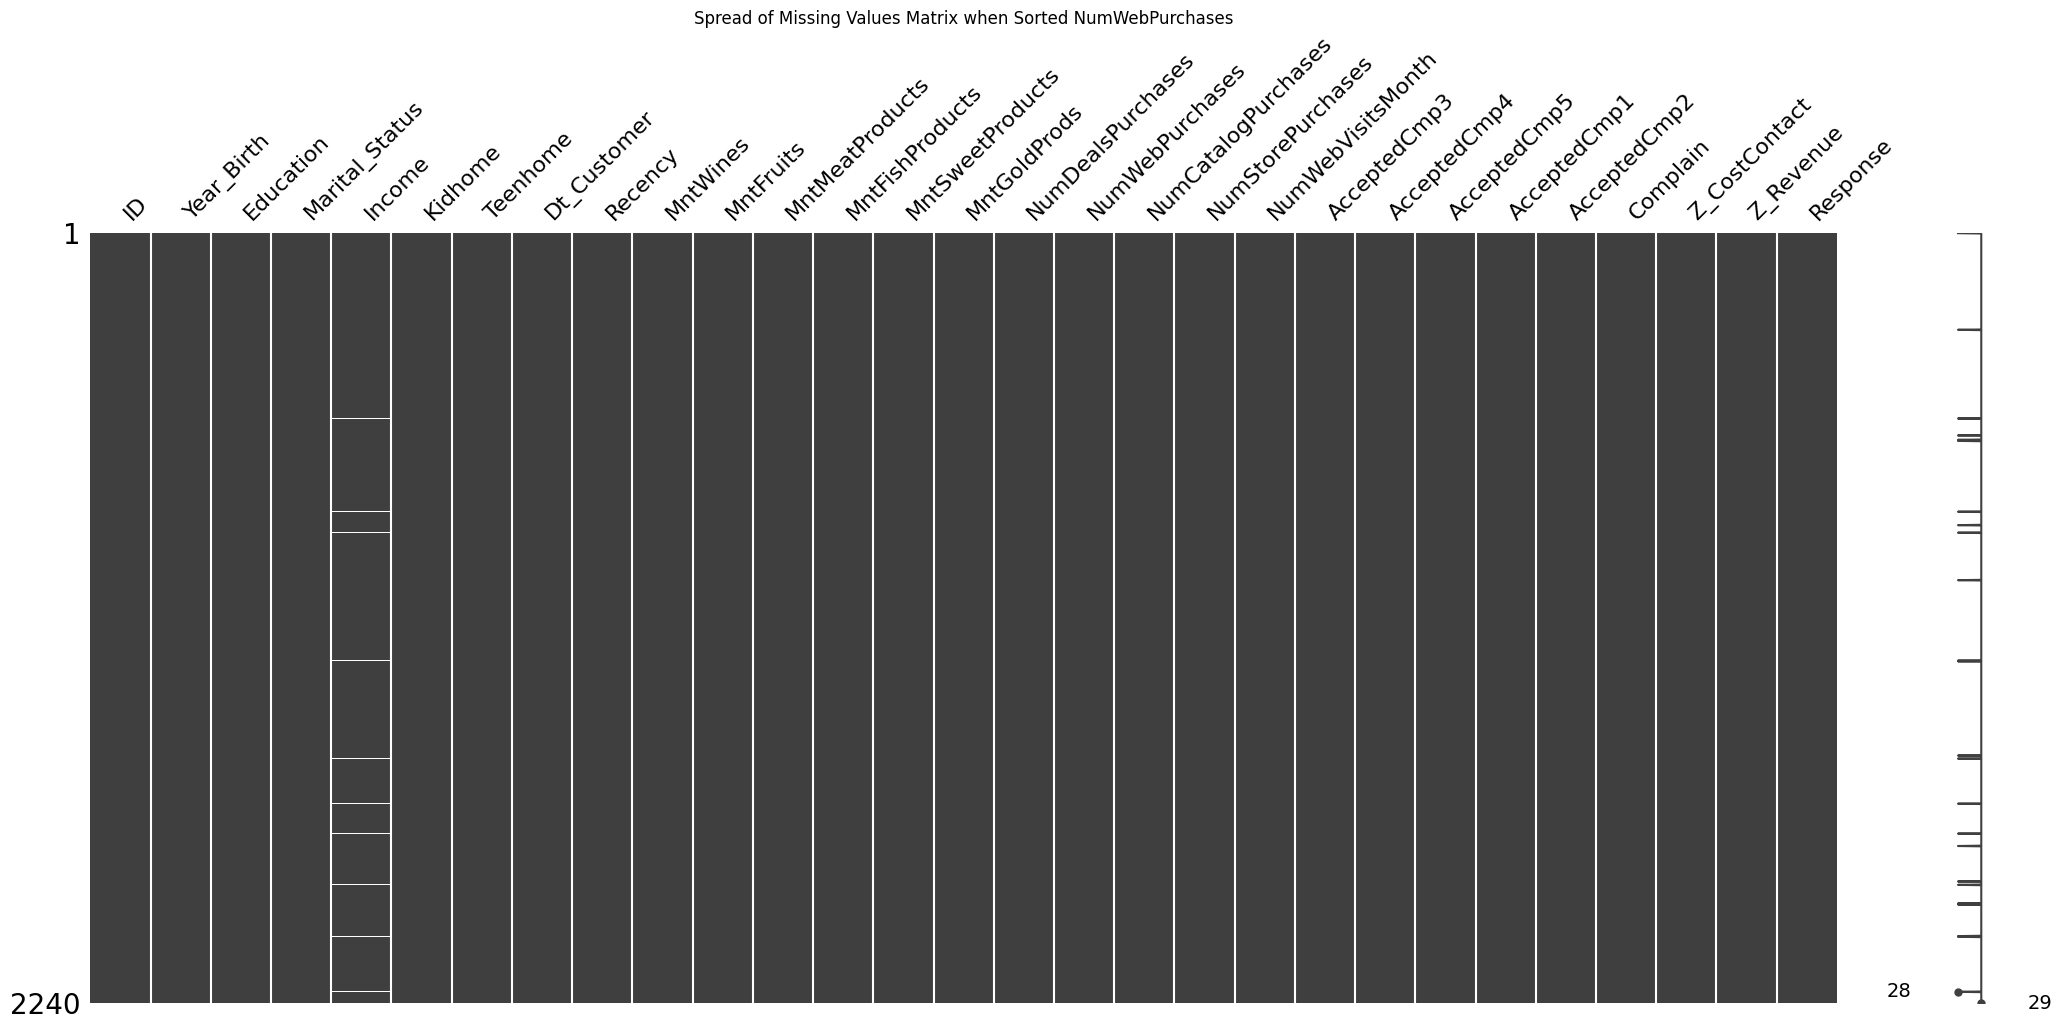

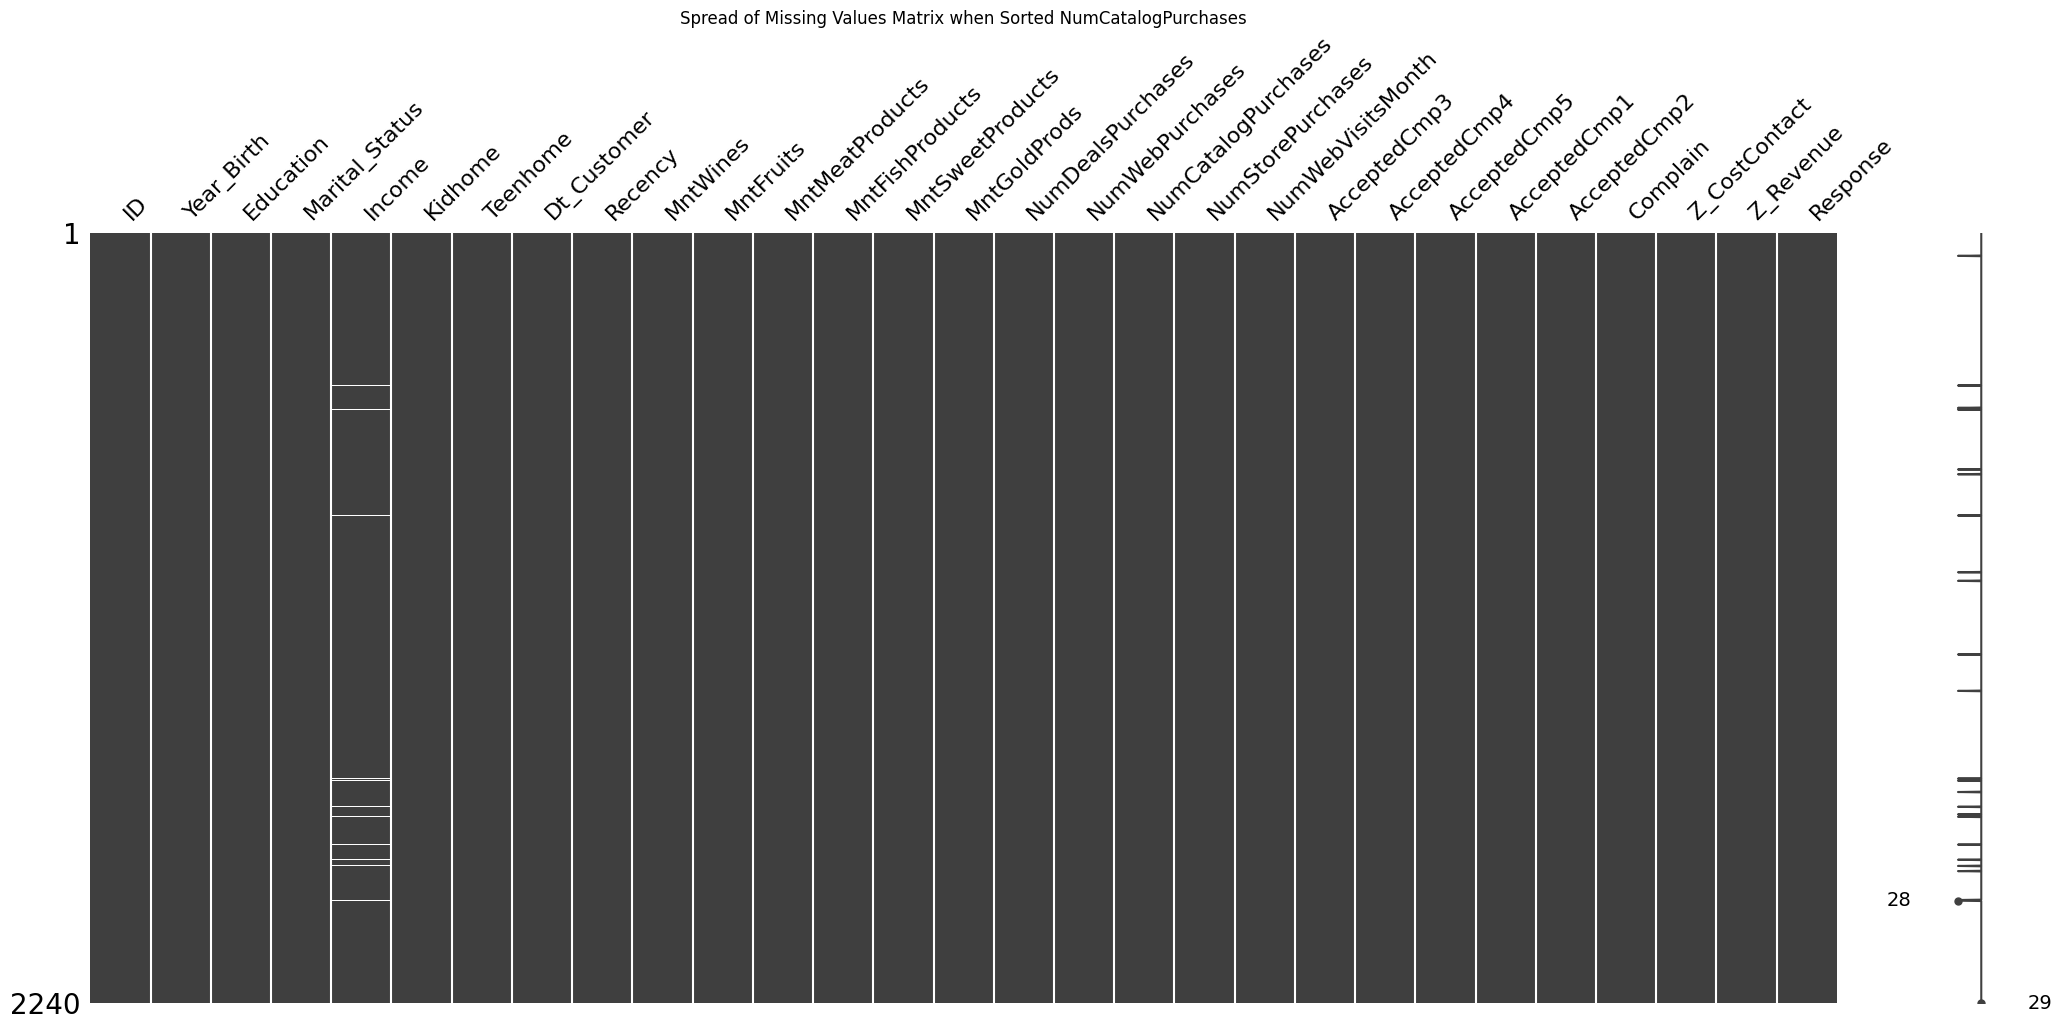

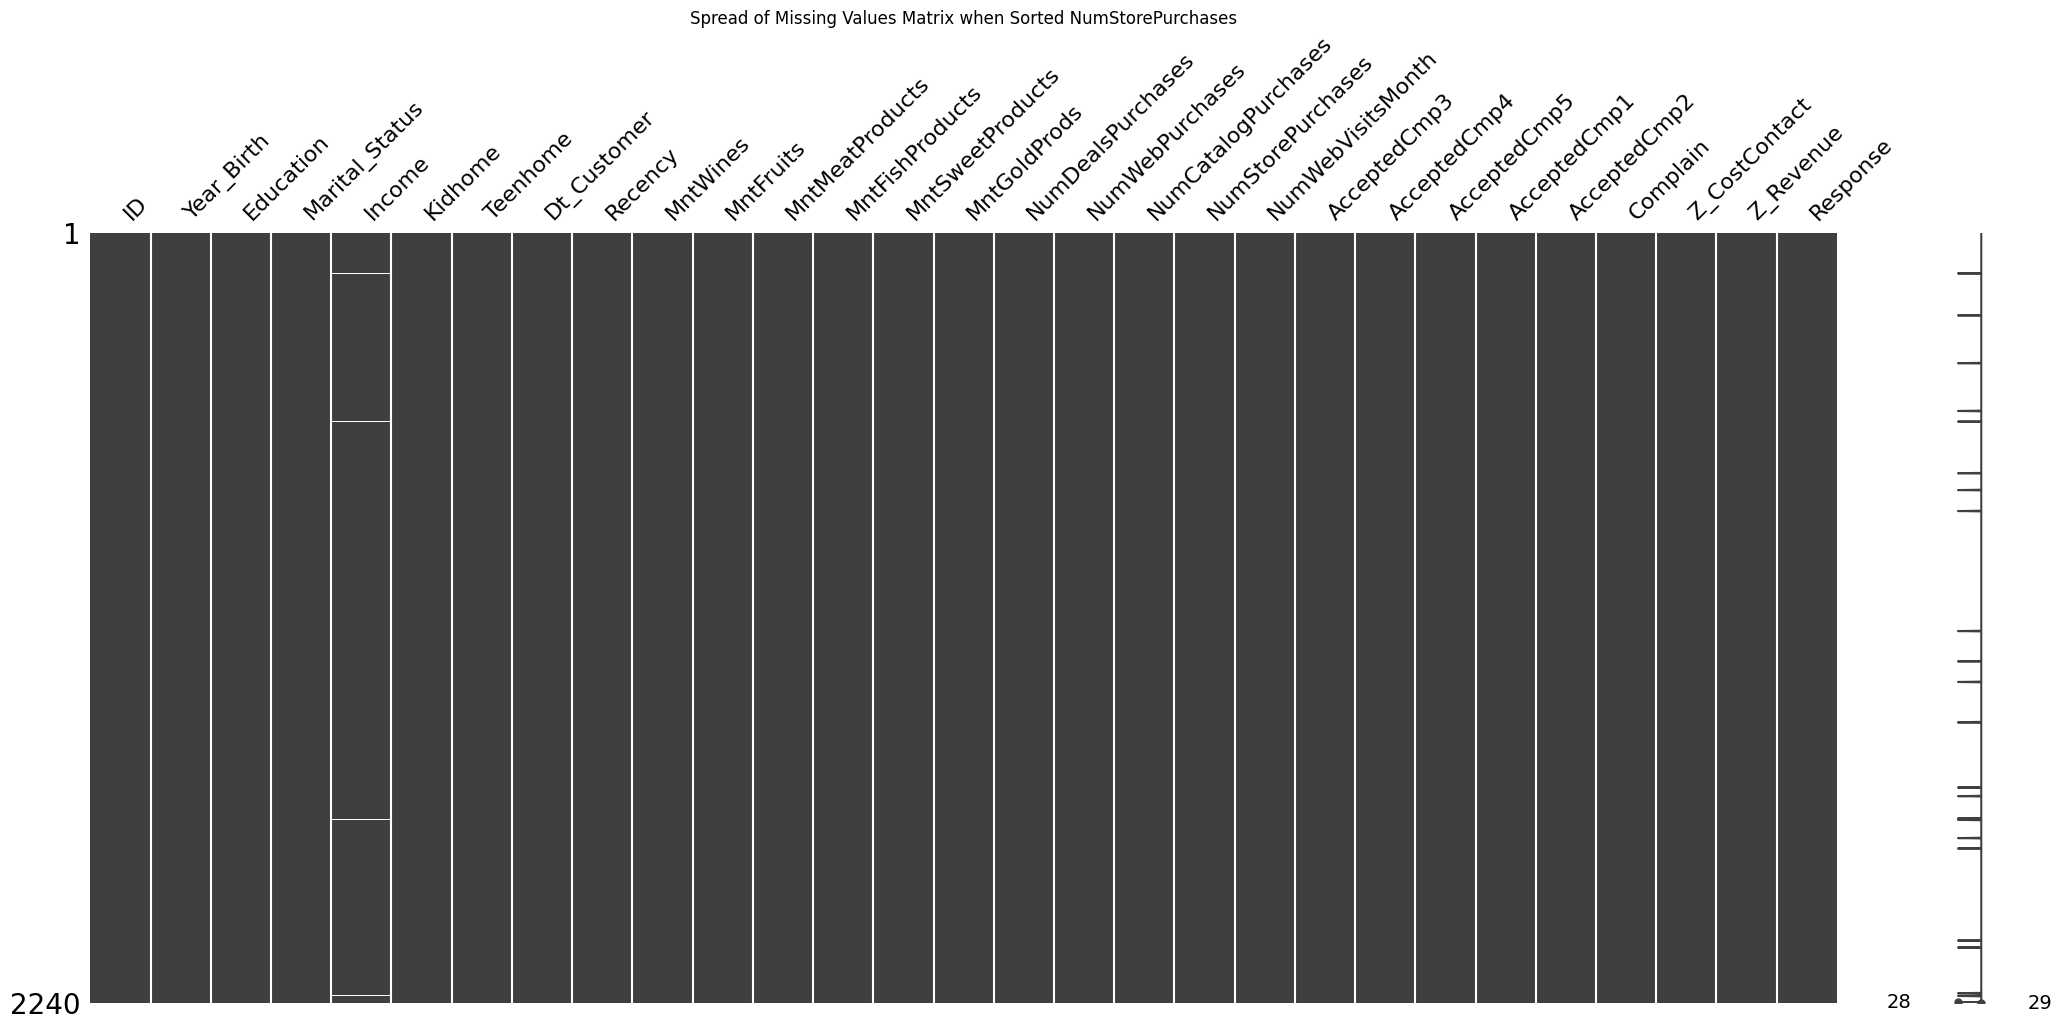

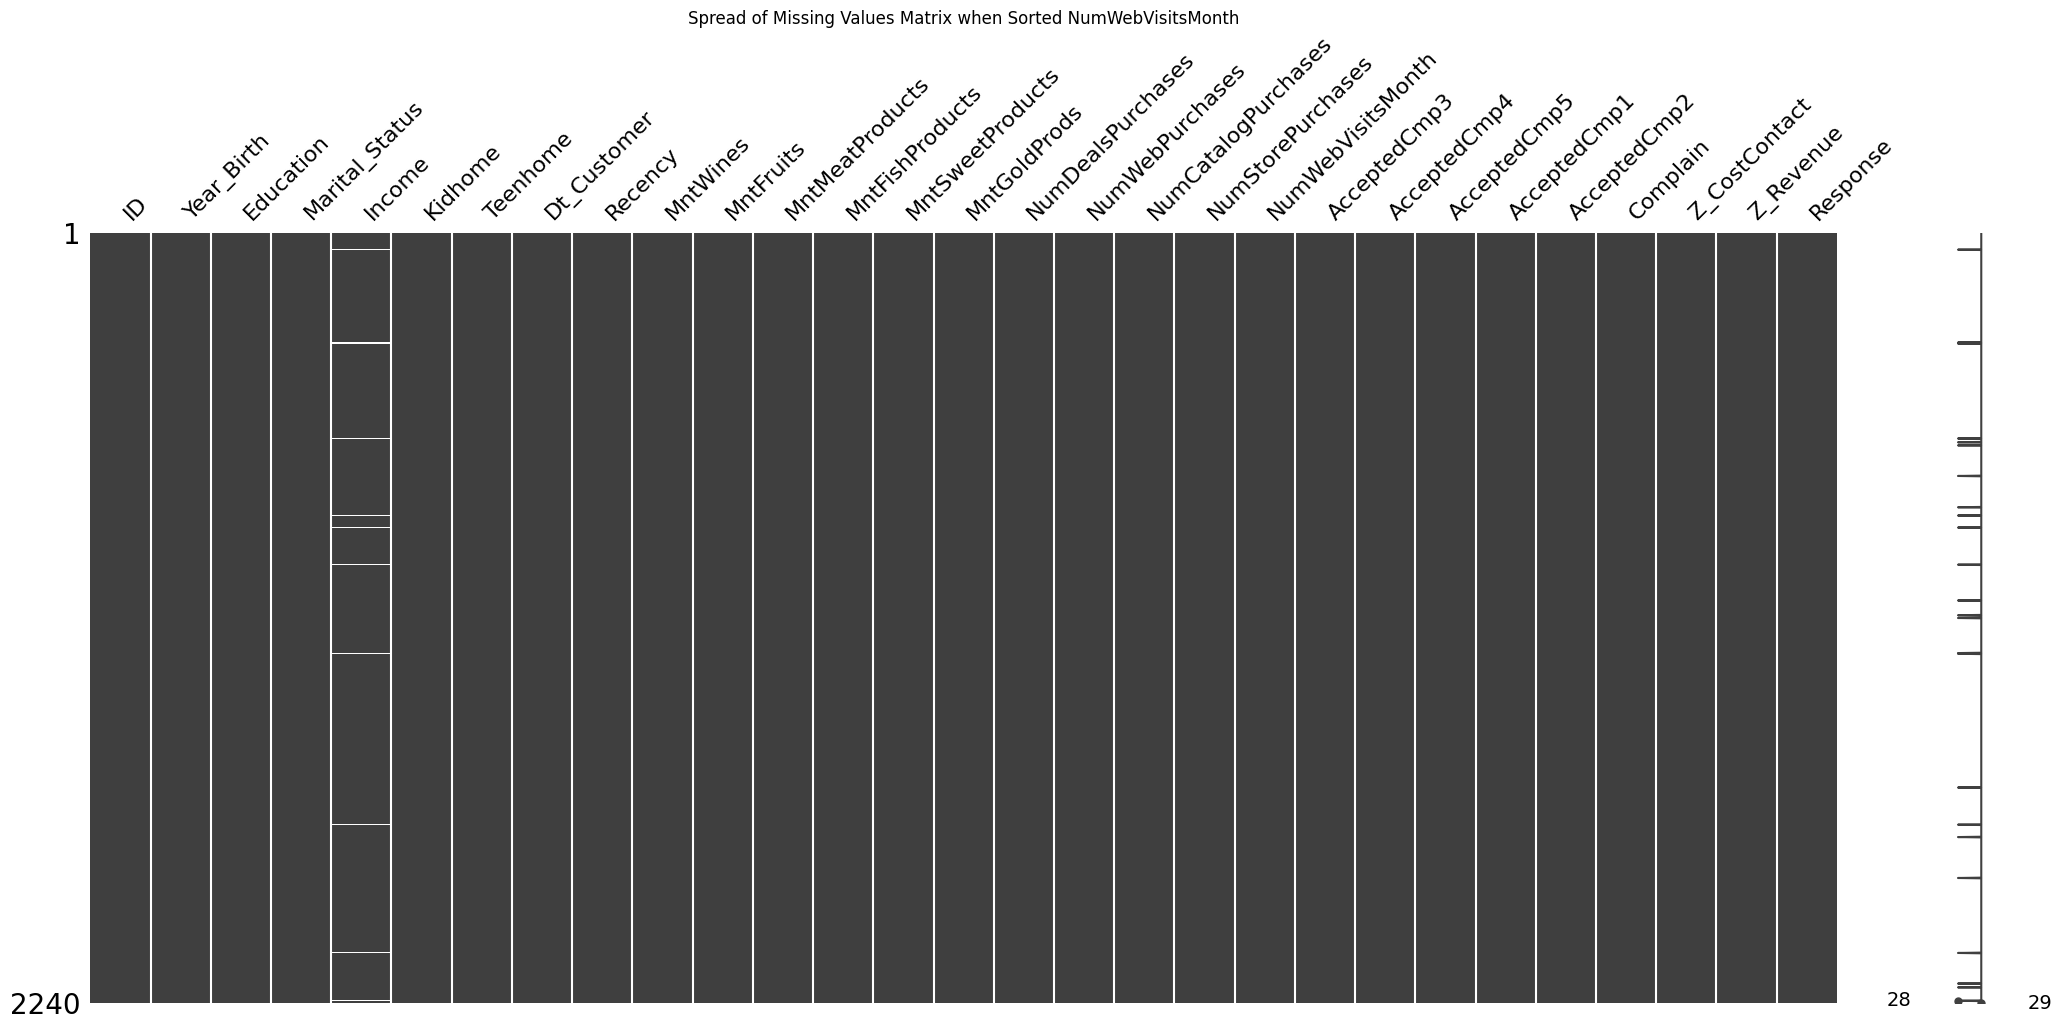

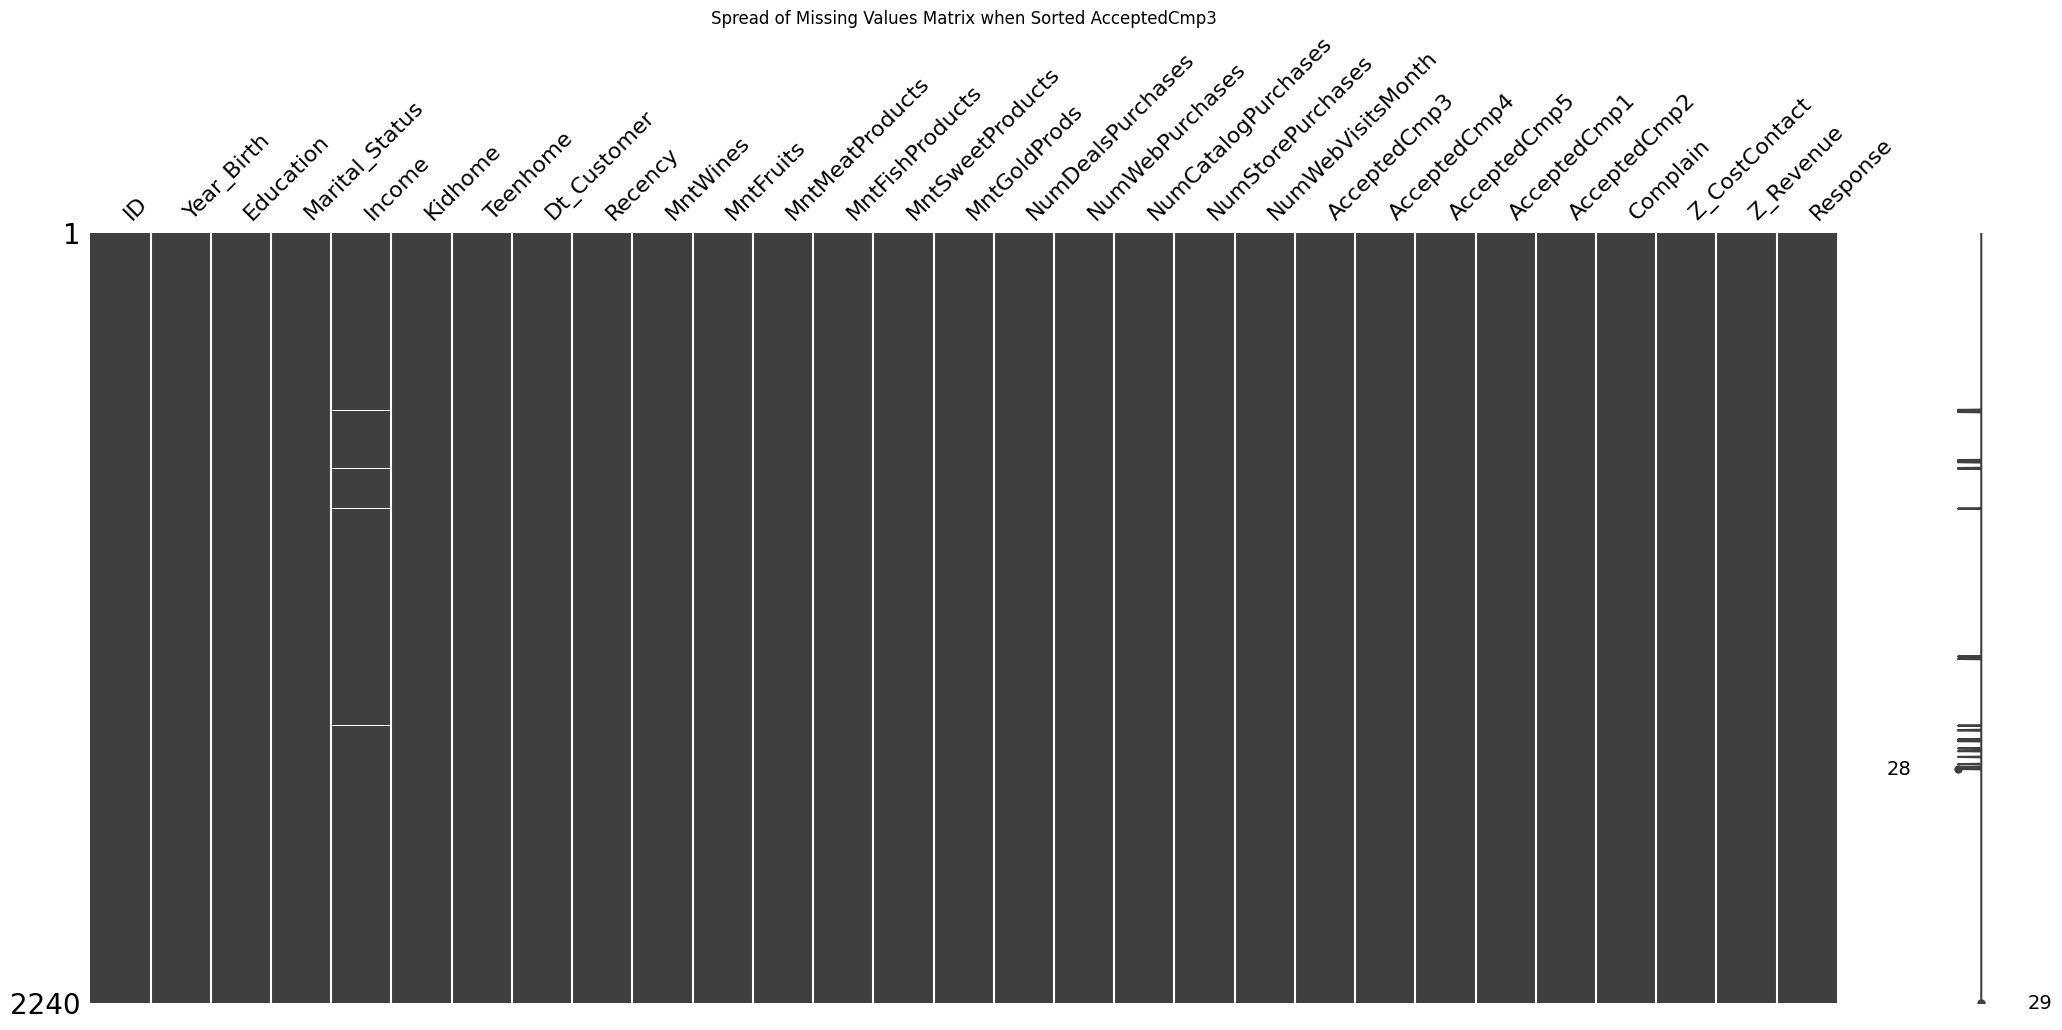

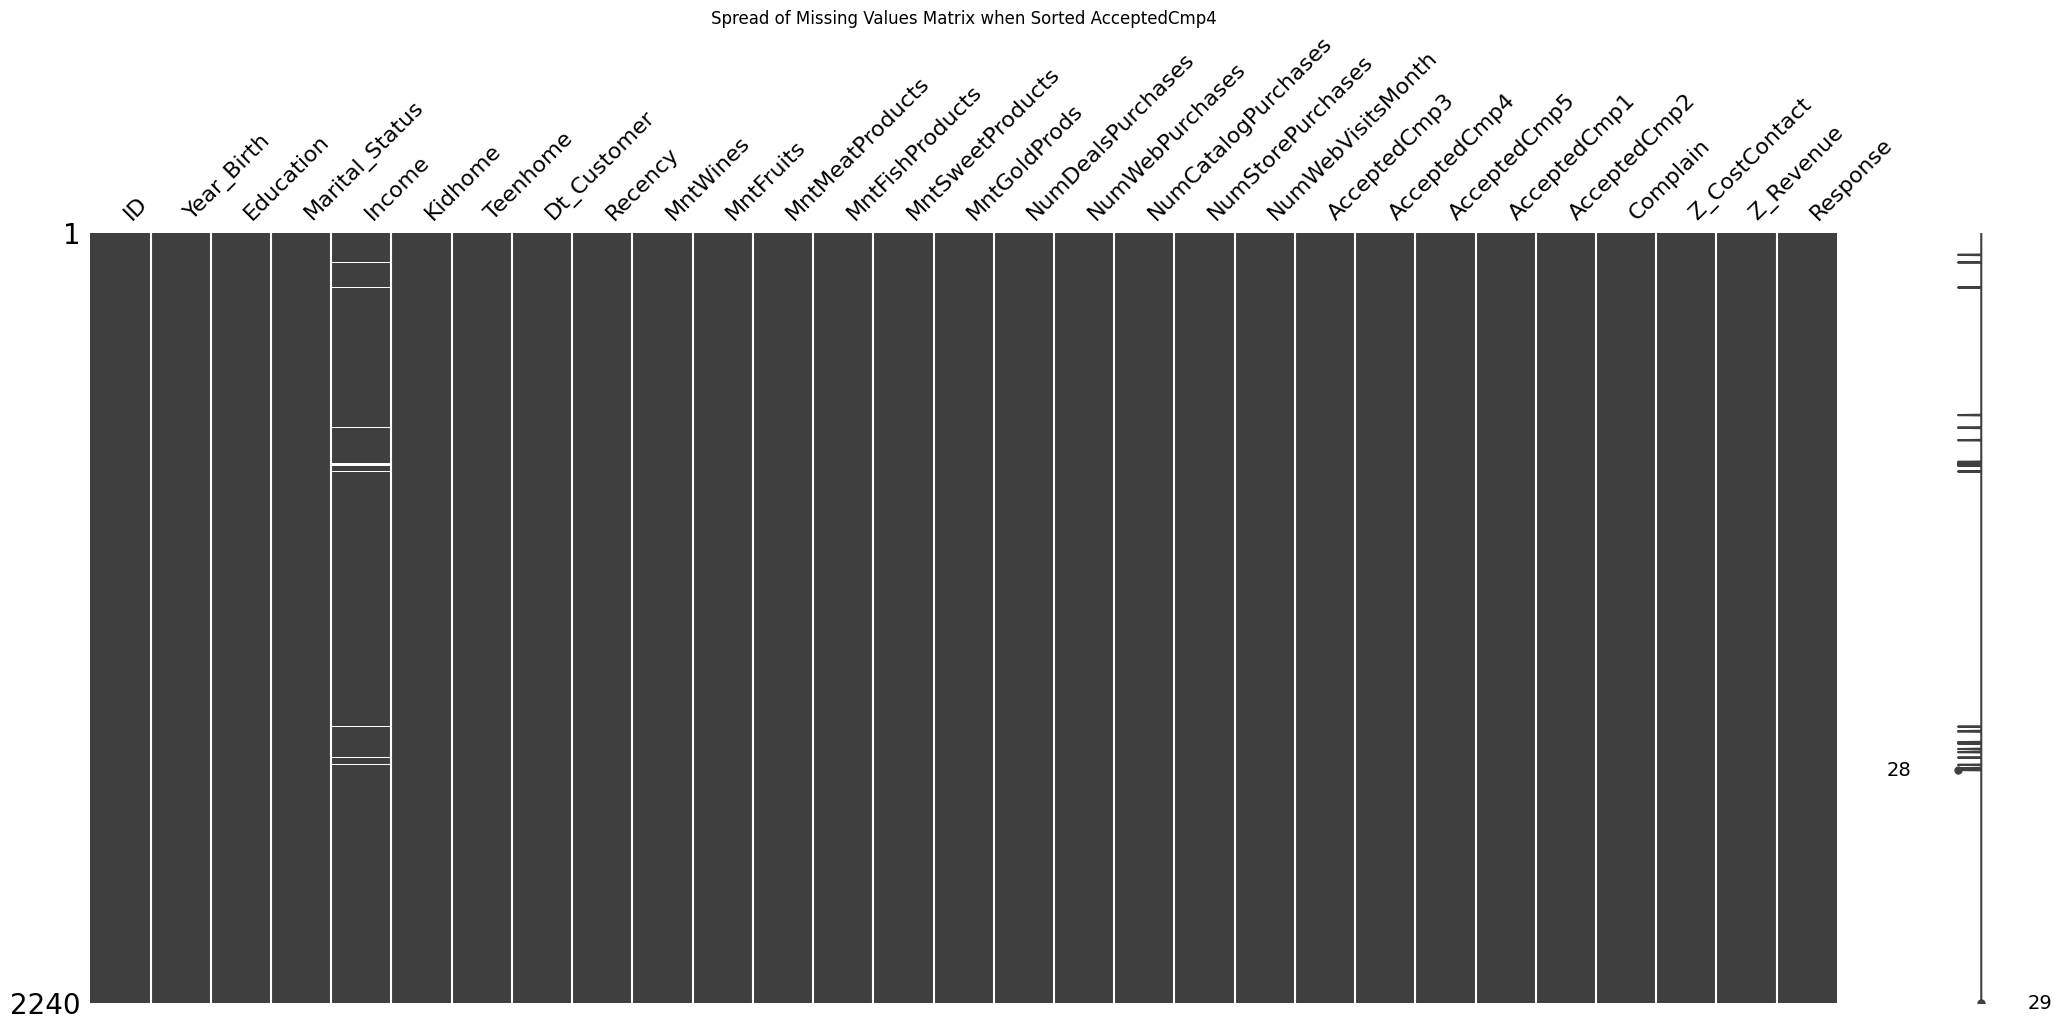

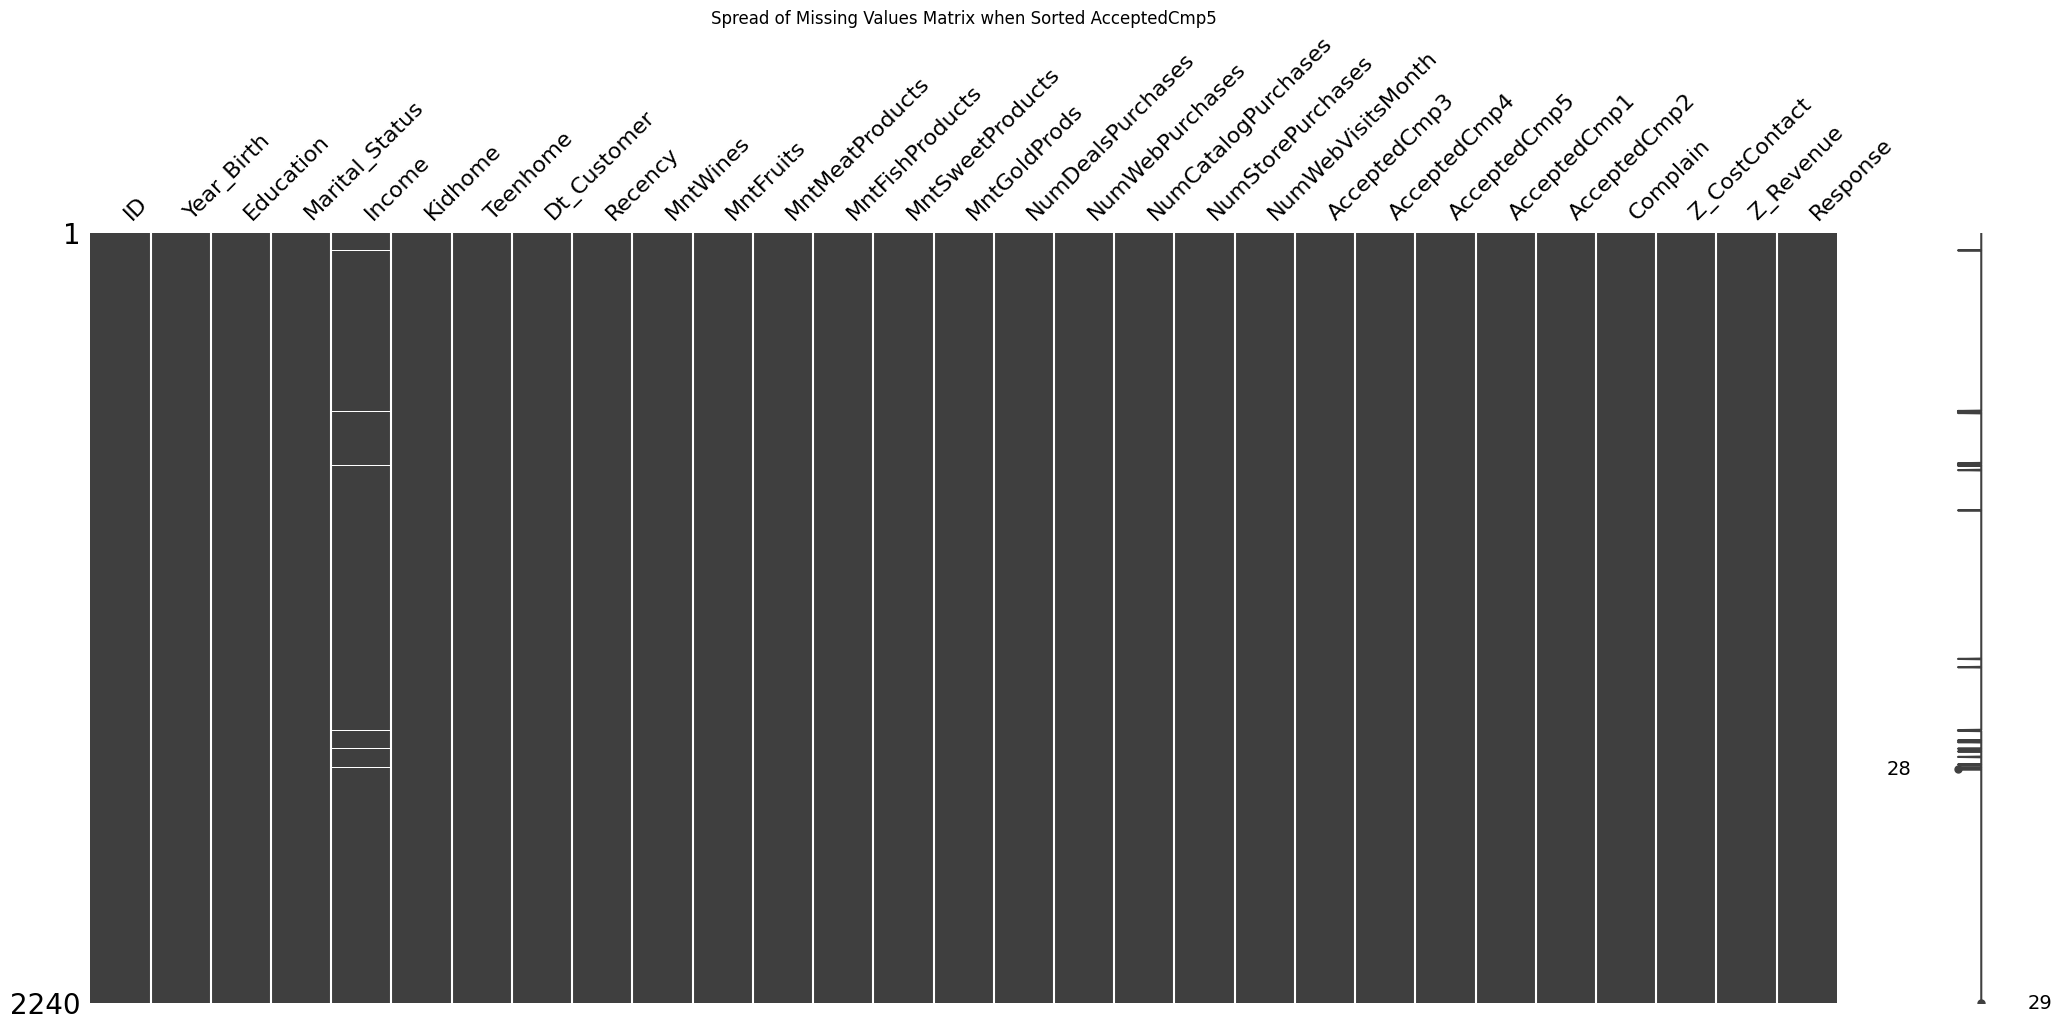

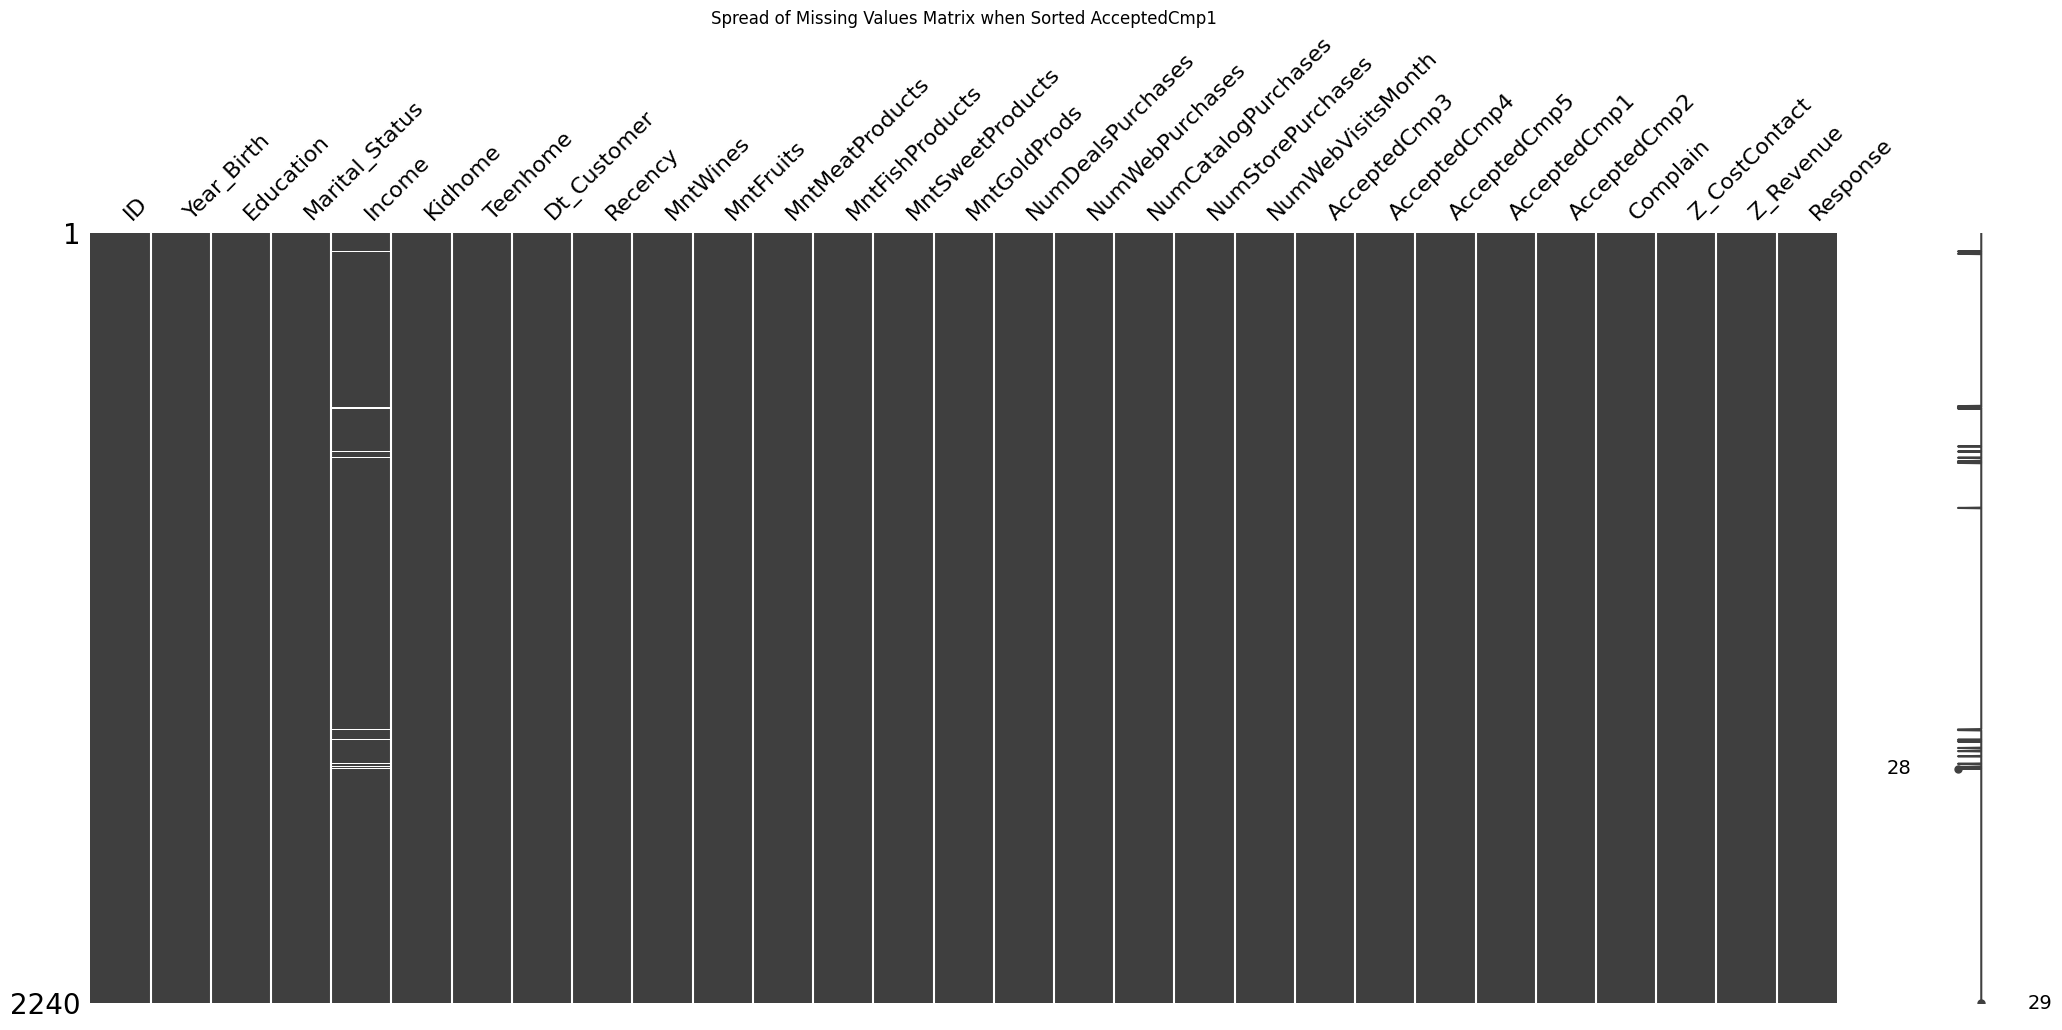

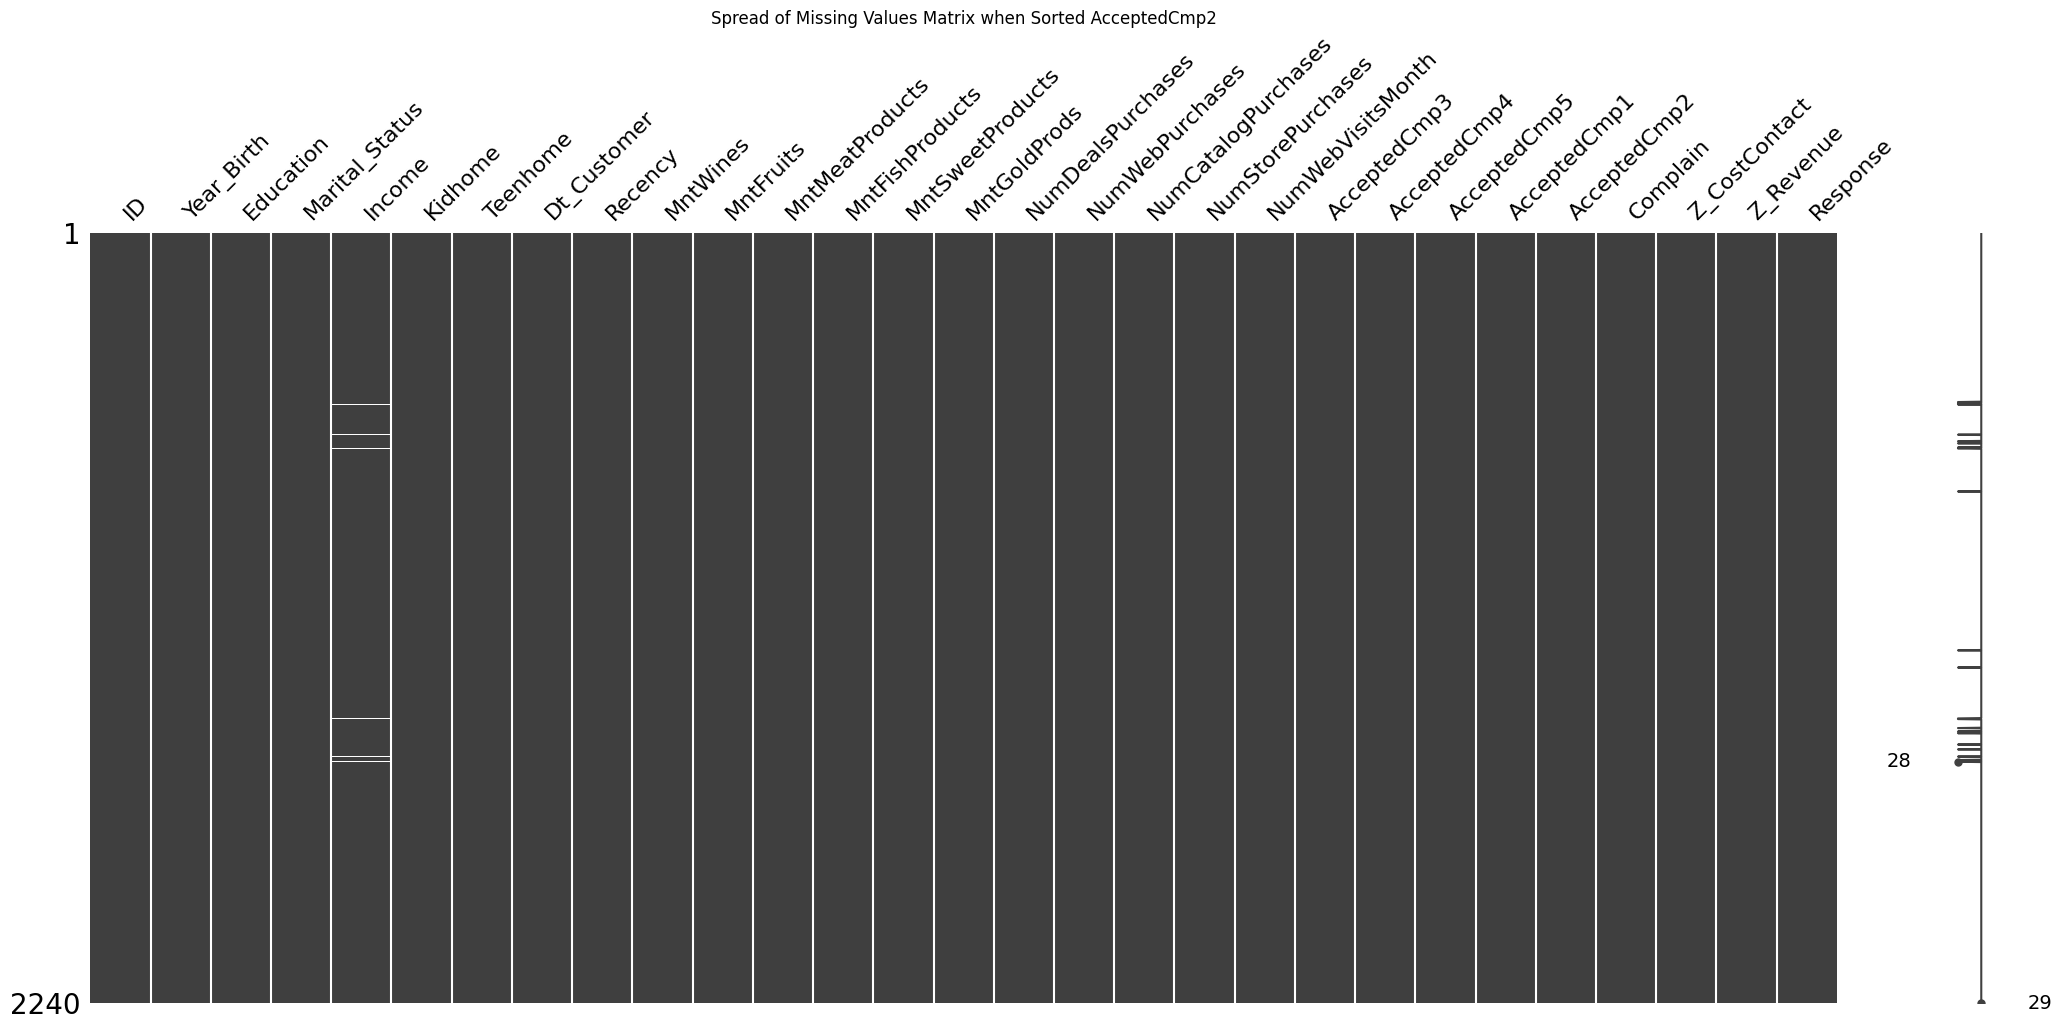

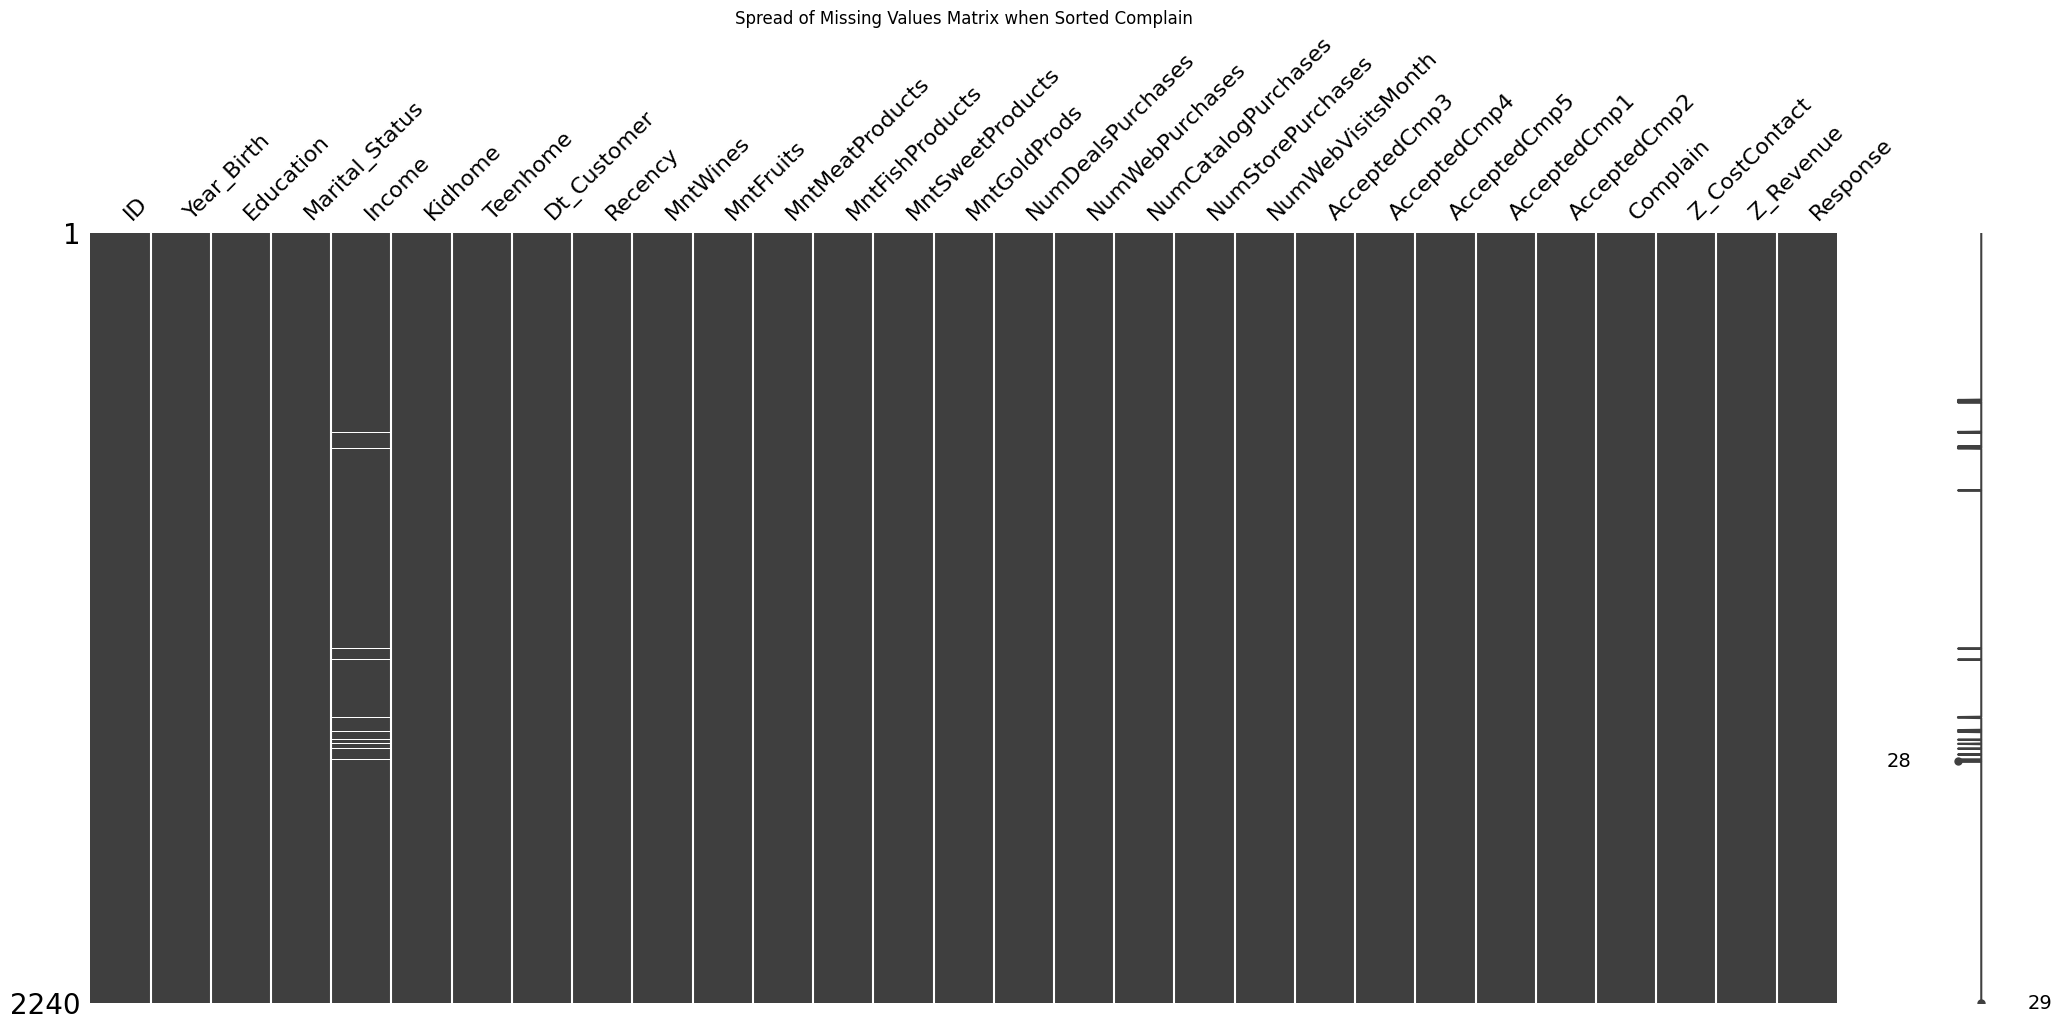

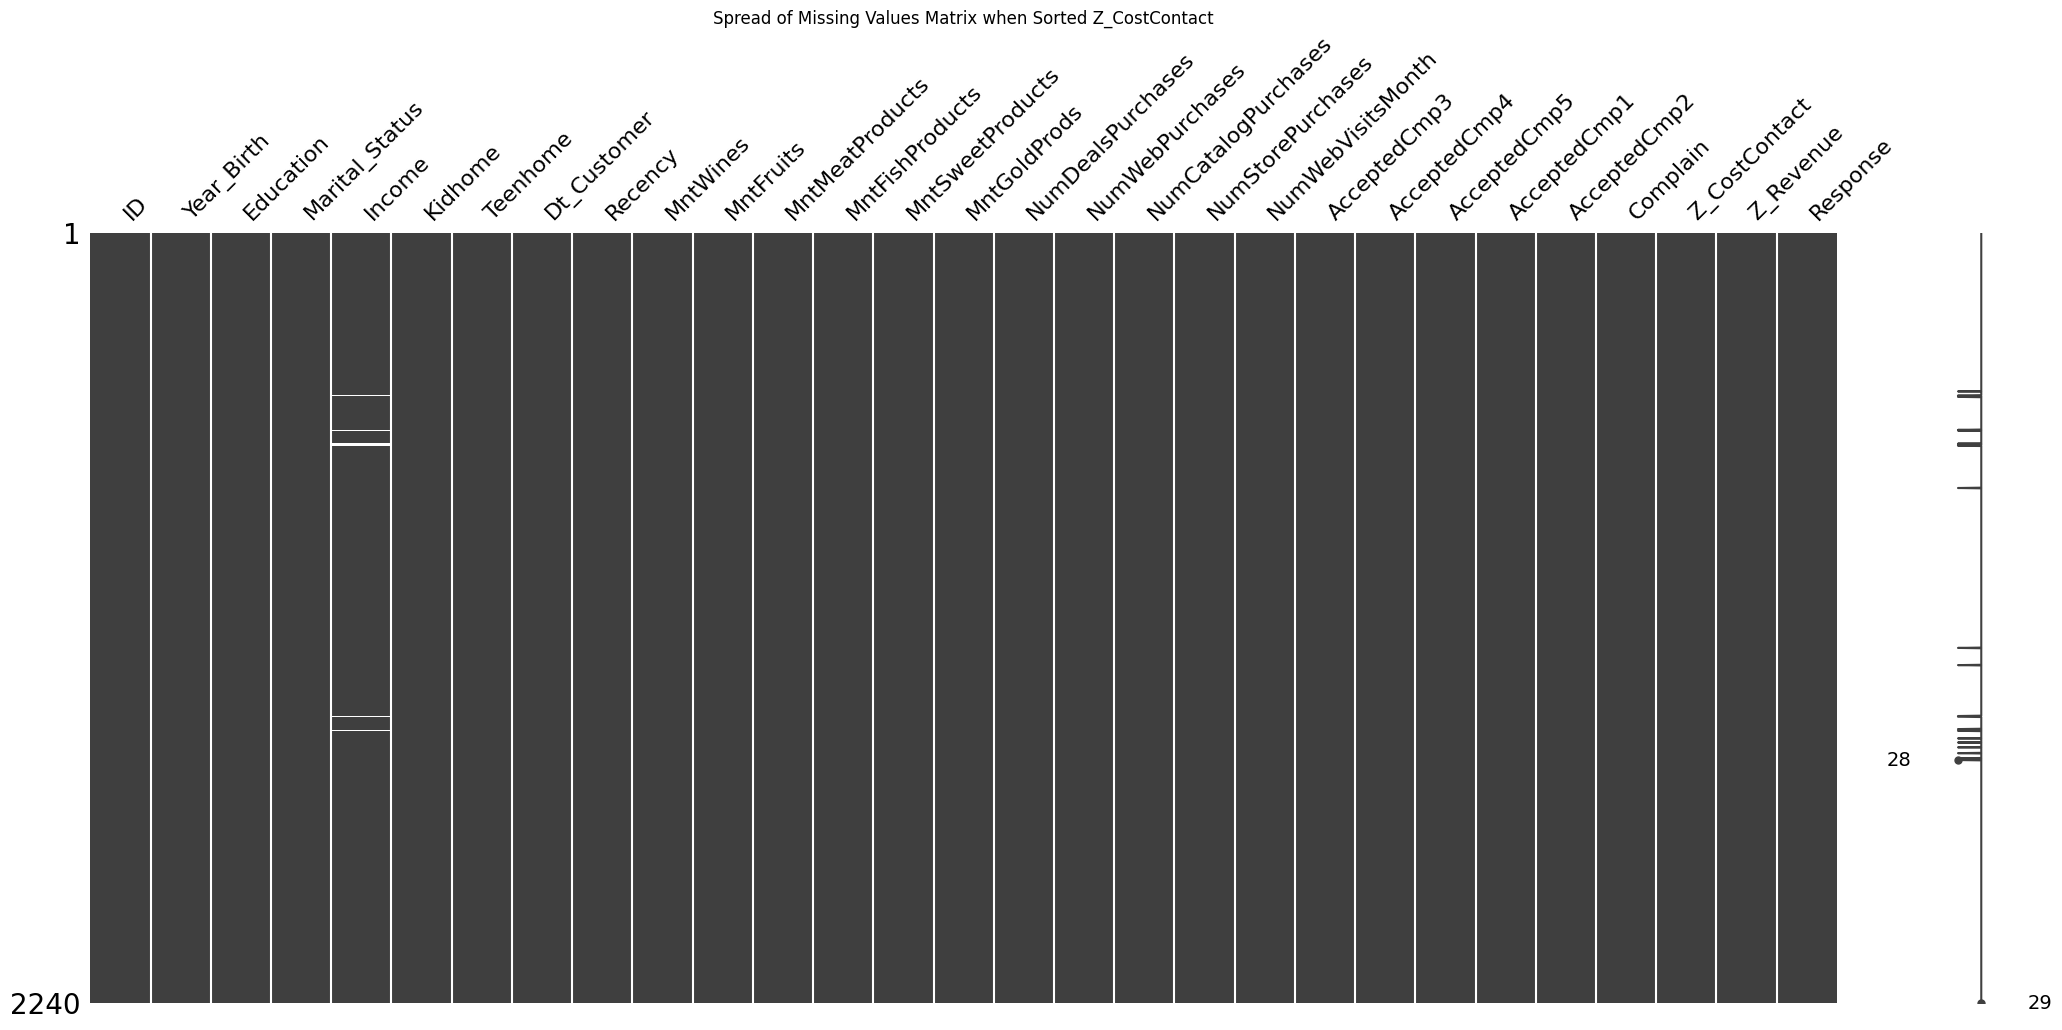

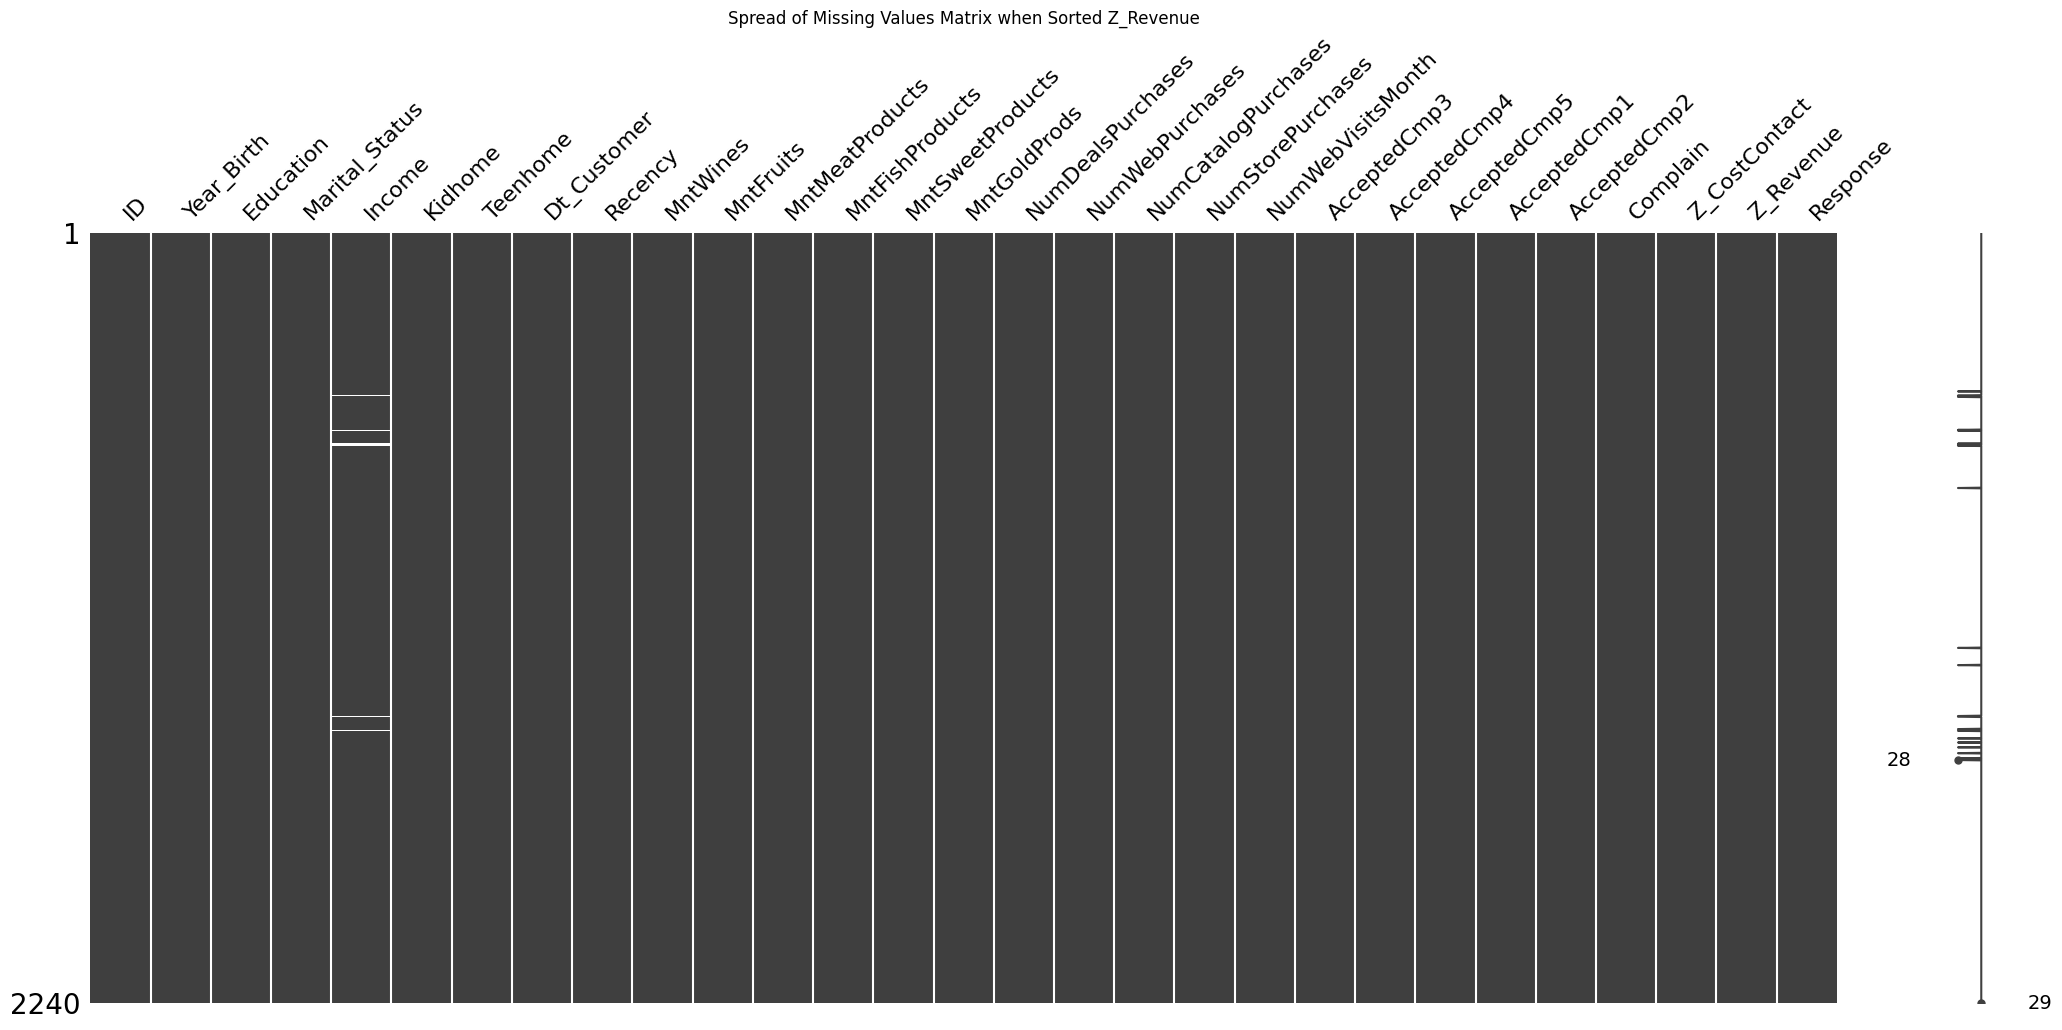

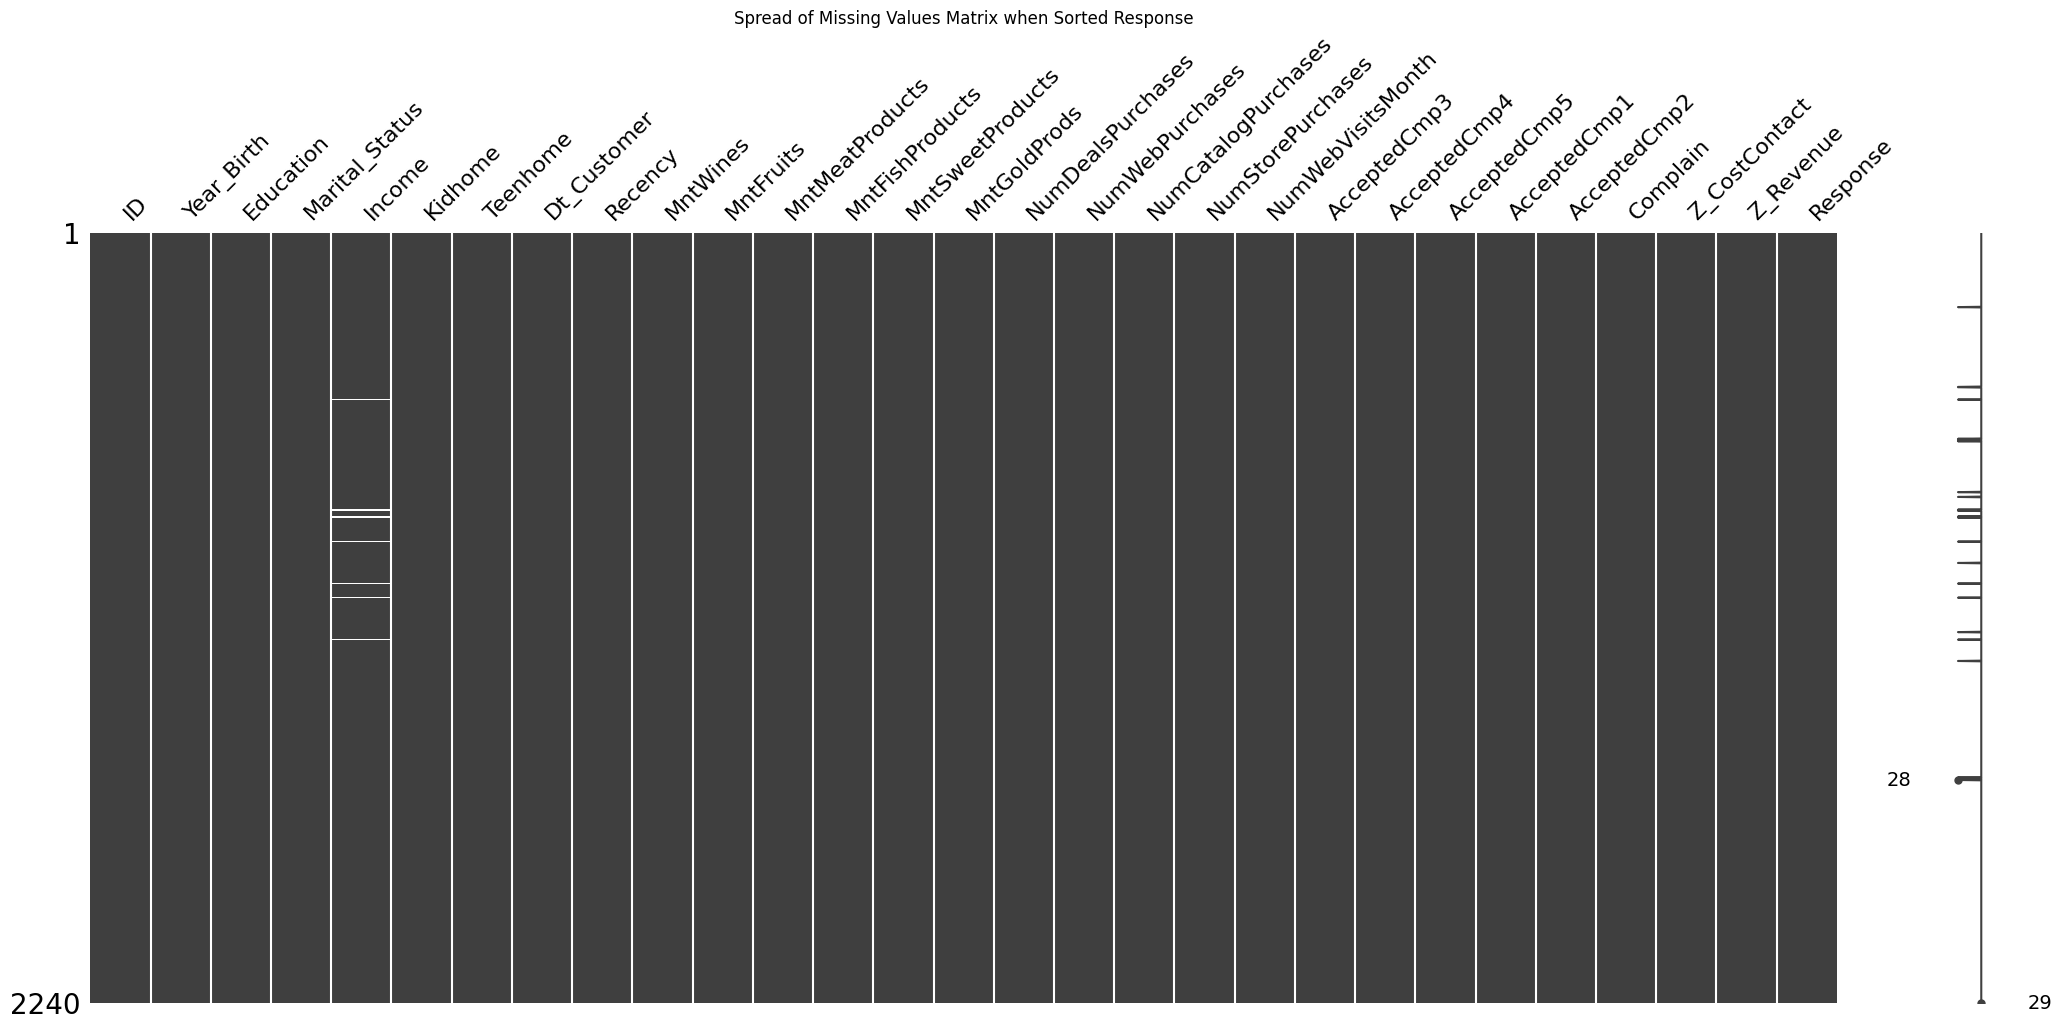

In [11]:
# Checking spread of Missing Values
# Loop through each column in the dataframe
for col in df.columns:

    # Sort the dataframe by the number of missing values in the current column
    sorted_df = df.sort_values(by=col, ascending=False)

    # Create a matrix of missing values for the sorted dataframe
    ax = msno.matrix(sorted_df)

    # Set the plot title based on the current column
    ax.set_title("Spread of Missing Values Matrix when Sorted {}".format(col))

Diketahui bahwa dari visualisasi menunjukan persebaran missing value terjadi secara acak / tidak membentuk pola pada setiap kolom (pengecualian untuk kolom income, pola akan terbentuk karena missing value-nya sendiri).

In [12]:
income_missing_value = df[df['Income'].isna()]
data = {'Column Name': [], 'Number of Unique': [],'Number of Unique for Missing Value': [], 'Unique Sample for Missing Value': []}

for column in df.columns:
    data['Column Name'].append(column)
    data['Number of Unique'].append(len(df[column].unique()))
    data['Number of Unique for Missing Value'].append(len(income_missing_value[column].unique()))
    data['Unique Sample for Missing Value'].append(income_missing_value[column].unique())

pd.DataFrame(data)

Column Name  Number of Unique  Number of Unique for Missing Value  \
0                    ID              2240                                  24   
1            Year_Birth                59                                  21   
2             Education                 5                                   4   
3        Marital_Status                 8                                   4   
4                Income              1975                                   1   
5               Kidhome                 3                                   3   
6              Teenhome                 3                                   3   
7           Dt_Customer               663                                  24   
8               Recency               100                                  21   
9              MntWines               776                                  21   
10            MntFruits               158                                  13   
11      MntMeatProducts               558                                  22   
12      MntFishProducts               182                                  15   
13     MntSweetProducts               177                                  14   
14         MntGoldProds               213                                  21   
15    NumDealsPurchases                15                                   8   
16      NumWebPurchases                15                                   9   
17  NumCatalogPurchases                14                                   7   
18    NumStorePurchases                14                                  12   
19    NumWebVisitsMonth                16                                  10   
20         AcceptedCmp3                 2                                   1   
21         AcceptedCmp4                 2                                   2   
22         AcceptedCmp5                 2                                   2   
23         AcceptedCmp1                 2                                   2   
24         AcceptedCmp2                 2                                   1   
25             Complain                 2                                   1   
26        Z_CostContact                 1                                   1   
27            Z_Revenue                 1                                   1   
28             Response                 2                                   2   

                      Unique Sample for Missing Value  
0   [1994, 5255, 7281, 7244, 8557, 10629, 8996, 92...  
1   [1983, 1986, 1959, 1951, 1982, 1973, 1957, 196...  
2                 [Graduation, PhD, 2n Cycle, Master]  
3                  [Married, Single, Together, Widow]  
4                                               [nan]  
5                                           [1, 0, 2]  
6                                           [0, 1, 2]  
7   [2013-11-15T00:00:00.000000000, 2013-02-20T00:...  
8   [11, 19, 80, 96, 57, 25, 4, 45, 87, 23, 69, 67...  
9   [5, 81, 48, 11, 25, 230, 7, 445, 352, 231, 861...  
10   [5, 1, 11, 3, 42, 0, 37, 65, 138, 20, 4, 126, 2]  
11  [6, 3, 50, 48, 22, 43, 192, 8, 359, 27, 196, 4...  
12  [0, 3, 6, 2, 17, 49, 98, 10, 38, 60, 52, 26, 9...  
13  [2, 263, 10, 4, 37, 0, 28, 71, 30, 50, 20, 66,...  
14  [1, 362, 39, 7, 6, 17, 53, 18, 15, 124, 61, 20...  
15                          [1, 0, 3, 2, 12, 6, 7, 4]  
16                       [1, 27, 2, 3, 7, 6, 4, 5, 0]  
17                             [0, 3, 1, 2, 4, 5, 10]  
18            [2, 0, 4, 3, 8, 7, 12, 10, 6, 5, 11, 1]  
19                     [7, 1, 2, 6, 8, 9, 4, 3, 5, 0]  
20                                                [0]  
21                                             [0, 1]  
22                                             [0, 1]  
23                                             [0, 1]  
24                                                [0]  
25                                                [0]  
26                                                [3]  
27           

Dari tabel menunjukan bahwa missing value tidak spesifik berkaitan dengan value tertentu pada kolom lain kecuali pada kolom AcceptedCmp3, AcceptedCmp2, dan Complain dimana missing value terjadi hanya di saat value tersebut 0 (Z_CostContact & Z_Revenue tidak dainggap berhubungan karena hanya memiliki 1 unique value).

Untuk itu perlu dianalisa lebih lanjut kemungkinan / peluang terjadinya missing value untuk mengetahui apakah ada hubungan pada kondisi tersebut.

In [13]:
# Define the columns to calculate proportion for
cols = ['AcceptedCmp3', 'AcceptedCmp2', 'Complain']

# Loop through the columns and calculate the proportion for each unique value
for col in cols:
    # Calculate the proportion of each unique value and assign it to a new dictionary
    unique_values_prop = {}
    for val in df[col].unique():
        prop = df[df[col] == val].shape[0] / df.shape[0]
        unique_values_prop[val] = prop
    
    # Print the results
    print(f"Proportions for column {col}:")
    for val, prop in unique_values_prop.items():
        print(f"Proportion of {val}: {prop}")
    print("------------------------")


Proportions for column AcceptedCmp3:
Proportion of 0: 0.9272321428571428
Proportion of 1: 0.07276785714285715
------------------------
Proportions for column AcceptedCmp2:
Proportion of 0: 0.9866071428571429
Proportion of 1: 0.013392857142857142
------------------------
Proportions for column Complain:
Proportion of 0: 0.990625
Proportion of 1: 0.009375
------------------------


Diketahui bahwa proporsi nilai 0 dari AcceptedCmp3, AcceptedCmp2, Complain sangat tinggi (>92%). Dengan demikian, kondisi bahwa missing values sangat mungkin ada saat kondisi value pada kolom tersebut bernilai 0.

Jika missing values muncul secara acak di kolom lain dan tidak terkait dengan nilai di variabel lain, ini menunjukkan bahwa mekanisme data yang hilang kemungkinan adalah Missing Completely at Random (MCAR).

Berkaitan dengan persentase missing values sangat kecil (sekitar 1%) dan sebaran missing values adalah MCAR, penanganan missing values adalah dengan melakukan penghapusan dari setiap baris yang memiliki missing value.

In [14]:
df = df.dropna()
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

### Outlier Understanding & Data Adjustment
Salah satu masalah umum yang dihadapi dalam analisa data selama pembersihan data adalah adanya outlier. Outlier adalah data yang menyimpang secara signifikan dari data lainnya dan dapat berdampak negatif pada hasil analisis jika dibiarkan tidak ditangani.

Selain keterkaitan outlier, data perlu dilakukan penyesuaian lebih lanjut untuk memudahkan analisa sesuai kebutuhan.

In [16]:
data = {'Column Name': [], 'Data Type': [], 'Number of Unique': [], 'Unique Sample Sorted Desc': [], 'Unique Sample Sorted Asc': []}

for column in df.columns:
    data['Column Name'].append(column)
    data['Data Type'].append(df[column].dtype)
    data['Number of Unique'].append(len(df[column].unique()))
    data['Unique Sample Sorted Desc'].append(sorted(df[column].unique(), reverse=True))
    data['Unique Sample Sorted Asc'].append(sorted(df[column].unique()))

pd.DataFrame(data)

Column Name       Data Type  Number of Unique  \
0                    ID           int64              2216   
1            Year_Birth           int64                59   
2             Education          object                 5   
3        Marital_Status          object                 8   
4                Income         float64              1974   
5               Kidhome           int64                 3   
6              Teenhome           int64                 3   
7           Dt_Customer  datetime64[ns]               662   
8               Recency           int64               100   
9              MntWines           int64               776   
10            MntFruits           int64               158   
11      MntMeatProducts           int64               554   
12      MntFishProducts           int64               182   
13     MntSweetProducts           int64               176   
14         MntGoldProds           int64               212   
15    NumDealsPurchases           int64                15   
16      NumWebPurchases           int64                15   
17  NumCatalogPurchases           int64                14   
18    NumStorePurchases           int64                14   
19    NumWebVisitsMonth           int64                16   
20         AcceptedCmp3           int64                 2   
21         AcceptedCmp4           int64                 2   
22         AcceptedCmp5           int64                 2   
23         AcceptedCmp1           int64                 2   
24         AcceptedCmp2           int64                 2   
25             Complain           int64                 2   
26        Z_CostContact           int64                 1   
27            Z_Revenue           int64                 1   
28             Response           int64                 2   

                            Unique Sample Sorted Desc  \
0   [11191, 11188, 11187, 11181, 11178, 11176, 111...   
1   [1996, 1995, 1994, 1993, 1992, 1991, 1990, 198...   
2          [PhD, Master, Graduation, Basic, 2n Cycle]   
3   [YOLO, Widow, Together, Single, Married, Divor...   
4   [666666.0, 162397.0, 160803.0, 157733.0, 15724...   
5                                           [2, 1, 0]   
6                                           [2, 1, 0]   
7   [2014-06-29T00:00:00.000000000, 2014-06-28T00:...   
8   [99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 8...   
9   [1493, 1492, 1486, 1478, 1462, 1459, 1449, 139...   
10  [199, 197, 194, 193, 190, 189, 185, 184, 183, ...   
11  [1725, 1622, 1582, 984, 981, 974, 968, 961, 95...   
12  [259, 258, 254, 253, 250, 247, 246, 242, 240, ...   
13  [262, 198, 197, 196, 195, 194, 192, 191, 189, ...   
14  [321, 291, 262, 249, 248, 247, 246, 245, 242, ...   
15  [15, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1...   
16  [27, 25, 23, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1...   
17     [28, 22, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]   
18     [13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]   
19  [20, 19, 17, 14, 13, 10, 9, 8, 7, 6, 5, 4, 3, ...   
20                                             [1, 0]   
21                                             [1, 0]   
22                                             [1, 0]   
23                                             [1, 0]   
24                                             [1, 0]   
25                                             [1, 0]   
26                                                [3]   
27                                               [11]   
28                                             [1, 0]   

                             Unique Sample Sorted Asc  
0   [0, 1, 9, 13, 17, 20, 22, 24, 25, 35, 48, 49, ...  
1   [1893, 1899, 1900, 1940, 1941, 1943, 1944, 194...  
2          [2n Cycle, Basic, Graduation, Master, PhD]  
3   [Absurd, Alone, Divorced, Married, Single, Tog...  
4   [1730.0, 2447.0, 3502.0, 4023.0, 4428.0, 4861....  
5                                           [0, 1, 2]  
6                                           [0, 1, 2]  
7   [2012-07-30T00:00:

Observasi:
- Year_Birth, sekilas diketahui bahwa range value sangat jauh (terendah 1893 dan tertinggi 1996). Maka diperlukan penyesuaian dan identifikasi outlier lebih lanjut dan pengelompokan untuk memudahkan proses analisis.
<br>
<br>
- Education, sekilas diketahui bahwa level pendidikan beragam. Maka diperlukan penyesuaian dalam pengelompokan lebih lanjut untuk memudahkan proses analisis.
<br>
<br>
- Marital_Status, sekilas diketahui bahwa statusnya sangat beragam yang sebanarnya memiliki klasifikasi tidak jauh berbeda (contoh: alone yang sebenarnya memiliki arti sebagai single juga). Maka diperlukan pengklasifikasian ulang terkait status perkawinan pelanggan.
<br>
<br>
- Income, sekilas diketahui bahwa nilai maximum value sangat jauh yaitu 666666.0. Maka diperlukan identifikasi outlier lebih lanjut.
<br>
<br>
- Kidhome & Teenhome, diketahui bahwa kedua kolom ini sebenarnya memiliki arti yang sama yaitu merepresentasikan jumlah anak dalam rumah. Maka perlu dilakukan penyesuaian lanjutan.
<br>
<br>
- Dt_Customer, diketahui bahwa pendaftaran pelanggan ada di range antara 2012 sampai 2014. Range tersebut dapat di klasifikasikan ulang dengan menghitung jumlah bulan terkait berapa lama customer sudah berafiliasi.
<br>
<br>
- MntWines s/d MntGoldProds, diketahui bahwa kolom ini merepresentasikan banyaknya pengeluaran. Data ini dapat disesuaikan untuk dihitung kembali sebagai kesatuan Total.
<br>
<br>
- NumWebPurchases, NumCatalogPurchases, NumStorePurchases, diketahui bahwa kolom ini merepresentasikan banyaknya pembelian berdasarkan tempat penjualannya. Data ini dapat disesuaikan untuk dihitung kembali sebagai kesatuan Total.
<br>
<br>
- AcceptedCmp & Response, diketahui bahwa kolom ini merepresentasikan banyaknya penerimaan campaign. Data ini dapat disesuaikan untuk dihitung kembali sebagai kesatuan Total.

#### Year_Birth

Year_Birth perlu disesuaikan dengan menghitung umur pelanggan (Age) untuk memudahkan analisa, kemudian diperlukan identifikasi outlier lebih lanjut. Sebagaimana diketahui bahwa pendaftaran pelanggan dengan perusahaan (Dt_Customer) antara 2012 dan 2014, diasumsikan data dikumpulkan pada 2015. Maka untuk mengetahui umur pelanggan adalah dengan mengurangi 2015 dengan Year_Birth.

Text(0.5, 1.0, 'Box Plot for Age')

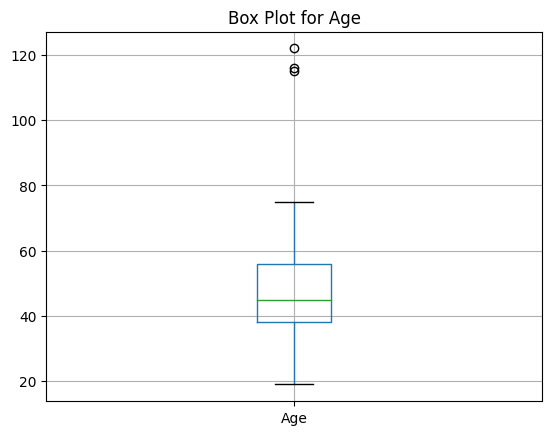

In [17]:
# Calculate Age 
df.insert(2,'Age',2015 - df.Year_Birth)

# Create a box plot for the column 'Age'
df.boxplot(column='Age')

# Set the title of the plot
plt.title('Box Plot for Age')

In [18]:
# Calculate IQR of Age column
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Calculate upper and lower bounds
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

# Identify outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
outliers

ID  Year_Birth  Age Education Marital_Status   Income  Kidhome  \
192   7829        1900  115  2n Cycle       Divorced  36640.0        1   
239  11004        1893  122  2n Cycle         Single  60182.0        0   
339   1150        1899  116       PhD       Together  83532.0        0   

     Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
192         0  2013-09-26       99        15          6                8   
239         1  2014-05-17       23         8          0                5   
339         0  2013-09-26       36       755        144              562   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
192                7                 4            25                  1   
239                7                 0             2                  1   
339              104                64           224                  1   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
192                2                    1                  2   
239                1                    0                  2   
339                4                    6                  4   

     NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
192                  5             0             0             0   
239                  4             0             0             0   
339                  1             0             0             1   

     AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
192             0             0         1              3         11         0  
239             0             0         0              3         11         0  
339             0             0         0              3         11         0

Diketahui bahwa ada 3 data Age yang diidentifikasi sebagai outliers, data tersebut memiliki value yang tidak wajar (umur lebih dari 100 tahun). Untuk memudahkan analisa, maka outlier tersebut akan dihapus.

In [19]:
# Remove outliers
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

# Calculate IQR of Age column
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Calculate upper and lower bounds
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

# Identify outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
outliers

Empty DataFrame
Columns: [ID, Year_Birth, Age, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

Untuk mempermudah proses analisis, diperlukan kategorisasi pada column Age
- <25
- 25-35
- 36-50
- 51-65
- 65+

In [20]:
# Create the 'Age_Categories' column based on 'Age' column
df.loc[df['Age'] < 25, 'Age_Categories'] = '0-24'
df.loc[(df['Age'] >= 25) & (df['Age'] <= 35), 'Age_Categories'] = '25-35'
df.loc[(df['Age'] >= 36) & (df['Age'] <= 50), 'Age_Categories'] = '36-50'
df.loc[(df['Age'] >= 51) & (df['Age'] <= 65), 'Age_Categories'] = '51-65'
df.loc[df['Age'] > 65, 'Age_Categories'] = '66+'

# Extract the 'Age_Categories' column
age_categories_col = df['Age_Categories']

# Drop the 'Age_Categories' column
df = df.drop('Age_Categories', axis=1)

# Insert the 'Age_Categories' column at index position 4
df.insert(3, 'Age_Categories', age_categories_col)

# Sorted by Age
df.sort_values('Age')

ID  Year_Birth  Age Age_Categories   Education Marital_Status  \
1170   193        1996   19           0-24       Basic        Married   
46    9909        1996   19           0-24    2n Cycle        Married   
2213  3661        1995   20           0-24    2n Cycle         Single   
696   8315        1995   20           0-24  Graduation         Single   
995   5184        1995   20           0-24  Graduation         Single   
...    ...         ...  ...            ...         ...            ...   
1923  4994        1943   72            66+      Master         Single   
1150  1453        1943   72            66+         PhD          Widow   
39    2968        1943   72            66+         PhD       Divorced   
424   6932        1941   74            66+         PhD        Married   
1950  6663        1940   75            66+         PhD         Single   

       Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  \
1170  14421.0        0         0  2014-02-17       81         0          0   
46     7500.0        0         0  2012-11-09       24         3         18   
2213  80617.0        0         0  2012-10-12       42       594         51   
696   34824.0        0         0  2014-03-26       65         4          2   
995   34824.0        0         0  2014-03-26       65         4          2   
...       ...      ...       ...         ...      ...       ...        ...   
1923  77598.0        0         0  2013-10-01       53      1193         33   
1150  57513.0        0         0  2013-07-06       59       735         40   
39    48948.0        0         0  2013-02-01       53       437          8   
424   93027.0        0         0  2013-04-13       77      1285         42   
1950  51141.0        0         0  2013-07-08       96       144          0   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
1170                2                3                 3             8   
46                 14               15                22            50   
2213              631               72                55            32   
696                11                2                 0             4   
995                11                2                 0             4   
...               ...              ...               ...           ...   
1923              281              129                66            33   
1150              183               52                20            30   
39                206              160                49            42   
424               716               55                 0            21   
1950                7                0                 0             6   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1170                  1                1                    0   
46                    3                3                    1   
2213                  1                4                    6   
696                   1                1                    0   
995                   1                1                    0   
...                 ...              ...                  ...   
1923                  1                7                    5   
1150                  2                9                    3   
39                    2                7                   10   
424                   0                7                   10   
1950                  1                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
1170                  2                  5             1             0   
46                    3                  9             0             0   
2213                  8                  2             0             0   
696                   2                  6             0             0   
995                   2                  6             0             0   
...                 ...                ...           ...           ...   
1923  

#### Education

Sebagaimana diketahui pada kolom Education memiliki 5 unique value berupa PhD, Master, Graduation, Basic, 2n Cycle. Untuk mempermudah proses analisa, diperlukan pengelompokan yang lebih umum:
- Education Level Basic
- Education Level Bachelor dari Graduation
- Education Level Master dari Master & 2nd Cycle (2nd Cycle umumnya merujuk program master degree berdasarkan European Higher Education Area (EHEA))
- Education Level Doctor dari PhD

In [21]:
# Create a dictionary to map Education values to Education_Level
education_level_dict = {'Basic': 'Basic','Graduation': 'Bachelor','Master': 'Master','2n Cycle': 'Master','PhD': 'Doctor'} 

# Create a new Education Level column
df.insert(5, 'Education_Level', df['Education'].map(education_level_dict))

df['Education_Level'].unique()

array(['Bachelor', 'Doctor', 'Master', 'Basic'], dtype=object)

In [22]:
# Sorted by Education_Level
df.sort_values('Education_Level')

ID  Year_Birth  Age Age_Categories   Education Education_Level  \
0      5524        1957   58          51-65  Graduation        Bachelor   
1695    550        1952   63          51-65  Graduation        Bachelor   
872    3623        1976   39          36-50  Graduation        Bachelor   
871    9353        1959   56          51-65  Graduation        Bachelor   
869    2447        1979   36          36-50  Graduation        Bachelor   
...     ...         ...  ...            ...         ...             ...   
844    5332        1960   55          51-65    2n Cycle          Master   
838   10856        1980   35          25-35    2n Cycle          Master   
836    6141        1972   43          36-50      Master          Master   
859    1031        1989   26          25-35    2n Cycle          Master   
1122    675        1973   42          36-50      Master          Master   

     Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0            Single  58138.0        0         0  2012-09-04       58   
1695       Divorced  62335.0        0         1  2013-05-23       87   
872        Together  21675.0        1         0  2014-06-11       55   
871          Single  62450.0        0         1  2014-01-06       61   
869        Together  30545.0        1         0  2012-10-17       71   
...             ...      ...      ...       ...         ...      ...   
844         Married  82504.0        0         0  2013-07-27        2   
838          Single  45889.0        0         1  2013-07-02       42   
836          Single  49494.0        1         0  2013-04-25       46   
859         Married  85710.0        0         0  2013-05-05        5   
1122       Divorced  52034.0        1         1  2013-05-17       67   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546              172                88   
1695       243        131              217               85                 6   
872          4          0               16               17                 4   
871        515         47              267               62                66   
869          4         12               15               19                 7   
...        ...        ...              ...              ...               ...   
844        362         50              431              134                35   
838         31          0                6                0                 1   
836        191          9               97                0                 6   
859        600         20              350               29                30   
1122       146          0               93                7                13   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0               88                  3                8                   10   
1695            26                  2                3                    3   
872              4                  3                4                    0   
871             38                  2                5                    5   
869             12                  2                2                    0   
...            ...                ...              ...                  ...   
844             54                  1                3                    6   
838              8                  1                1                    0   
836             82                  2                6                    1   
859             33                  1                6                    9   
1122            73                  5                4                    2   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1695                 13                  2             0             0   
872                   3                  7             0             0   
871                   4  

#### Marital_Status

Untuk analisa mrepresentasikan status pernikahan pelanggan, dapat dilakukan kategorisasi yang lebih mudah diantaranya dengan pengelompokan yang lebih umum:
- Together: Couple
- Married: Couple
- Divorced: Single
- Widow: Single
- Alone: Single
- Absurd: Single
- YOLO:Single

In [23]:
# Create a dictionary to map Marital_Status to Marital_Level
marital_level_dict = {'Together': 'Couple', 'Married': 'Couple', 'Single': 'Single' ,'Divorced': 'Single', 'Widow': 'Single', 'Alone': 'Single', 'Absurd': 'Single', 'YOLO': 'Single'} 

# Create a new Marital_Level column
df.insert(7, 'Marital_Level', df['Marital_Status'].map(marital_level_dict))

df['Marital_Level'].unique()

array(['Single', 'Couple'], dtype=object)

In [24]:
# Sorted by Marital_Level
df.sort_values('Marital_Level')

ID  Year_Birth  Age Age_Categories   Education Education_Level  \
2239  9405        1954   61          51-65         PhD          Doctor   
1090  1127        1973   42          36-50         PhD          Doctor   
1088  5577        1983   32          25-35  Graduation        Bachelor   
1087  1509        1958   57          51-65         PhD          Doctor   
1085  6295        1977   38          36-50  Graduation        Bachelor   
...    ...         ...  ...            ...         ...             ...   
1058  4507        1952   63          51-65  Graduation        Bachelor   
1055  7290        1985   30          25-35  Graduation        Bachelor   
1053  5740        1970   45          36-50    2n Cycle          Master   
1067  2223        1965   50          36-50    2n Cycle          Master   
1122   675        1973   42          36-50      Master          Master   

     Marital_Status Marital_Level   Income  Kidhome  Teenhome Dt_Customer  \
2239        Married        Couple  52869.0        1         1  2012-10-15   
1090        Married        Couple  85844.0        0         0  2014-05-29   
1088       Together        Couple  43776.0        1         0  2014-05-03   
1087       Together        Couple  84460.0        0         0  2013-01-04   
1085        Married        Couple  54233.0        0         1  2013-02-04   
...             ...           ...      ...      ...       ...         ...   
1058         Single        Single  72228.0        0         0  2012-11-27   
1055         Single        Single  70596.0        0         0  2012-10-05   
1053       Divorced        Single  25959.0        1         1  2013-02-14   
1067       Divorced        Single  64176.0        0         1  2012-08-03   
1122       Divorced        Single  52034.0        1         1  2013-05-17   

      Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
2239       40        84          3               61                2   
1090       62       938         19              843               25   
1088       77         8          0                9                2   
1087       80       152         27              103              106   
1085       46       652          8              158               21   
...       ...       ...        ...              ...              ...   
1058       87       631         28              491               30   
1055       68       347         44              534               17   
1053        1         4          2               12                7   
1067       52      1215         33              249               64   
1122       67       146          0               93                7   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
2239                 1            21                  3                3   
1090                95            38                  1                6   
1088                 1             3                  1                1   
1087                54            81                  0                9   
1085                 0           142                  4               11   
...                ...           ...                ...              ...   
1058                14            56                  1                6   
1055                 0            26                  1                3   
1053                 5            26                  2                1   
1067               116           149                  8                8   
1122                13            73                  5                4   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
2239                    1                  4                  7             0   
1090                    6                  7                  2             0   
1088                    0                  2                  6             0   
1087                    9                  4                  5             0   
1085       

#### Income

Diperlukan analisa lebih lanjut terkait outlier sebagaimana observasi dari kolom Unique Sample Sorted Desc sebelumnya, terdapat indikasi outlier yang dapat mendistorsi hasil dan memengaruhi keakuratan analisis.

Text(0.5, 1.0, 'Box Plot for Income')

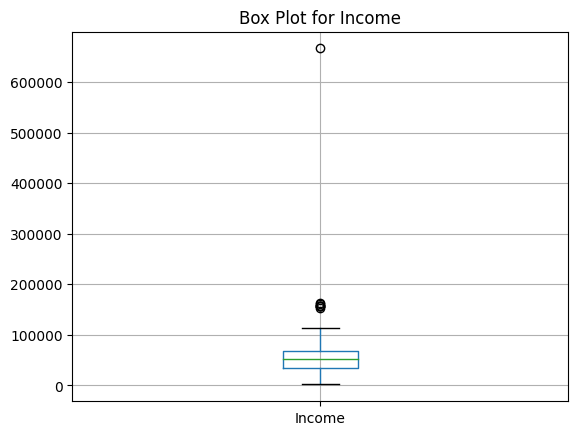

In [25]:
# Create a box plot for the column 'Income'
df.boxplot(column='Income')

# Set the title of the plot
plt.title('Box Plot for Income')

In [26]:
# Calculate IQR of Income column
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Calculate upper and lower bounds
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

# Identify outliers
outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]
outliers

ID  Year_Birth  Age Age_Categories   Education Education_Level  \
164    8475        1973   42          36-50         PhD          Doctor   
617    1503        1976   39          36-50         PhD          Doctor   
655    5555        1975   40          36-50  Graduation        Bachelor   
687    1501        1982   33          25-35         PhD          Doctor   
1300   5336        1971   44          36-50      Master          Master   
1653   4931        1977   38          36-50  Graduation        Bachelor   
2132  11181        1949   66            66+         PhD          Doctor   
2233   9432        1977   38          36-50  Graduation        Bachelor   

     Marital_Status Marital_Level    Income  Kidhome  Teenhome Dt_Customer  \
164         Married        Couple  157243.0        0         1  2014-03-01   
617        Together        Couple  162397.0        1         1  2013-06-03   
655        Divorced        Single  153924.0        0         0  2014-02-07   
687         Married        Couple  160803.0        0         0  2012-08-04   
1300       Together        Couple  157733.0        1         0  2013-06-04   
1653       Together        Couple  157146.0        0         0  2013-04-29   
2132        Married        Couple  156924.0        0         0  2013-08-29   
2233       Together        Couple  666666.0        1         0  2013-06-02   

      Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
164        98        20          2             1582                1   
617        31        85          1               16                2   
655        81         1          1                1                1   
687        21        55         16             1622               17   
1300       37        39          1                9                2   
1653       13         1          0             1725                2   
2132       85         2          1                2                1   
2233       23         9         14               18                8   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
164                  2             1                 15                0   
617                  1             2                  0                0   
655                  1             1                  0                0   
687                  3             4                 15                0   
1300                 0             8                  0                1   
1653                 1             1                  0                0   
2132                 1             1                  0                0   
2233                 1            12                  4                3   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
164                    22                  0                  0             0   
617                     0                  1                  1             0   
655                     0                  0                  0             0   
687                    28                  1                  0             0   
1300                    0                  1                  1             0   
1653                   28                  0                  1             0   
2132                    0                  0                  0             0   
2233                    1                  3                  6             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
164              0             0             0             0         0   
617              0             0             0             0         0   
655              0             0             0             0         0   
687              0             0             0             0         0   
1300             0             0             0             0         0   
1653             0             0             0             0         0   
2132             0             0             0  

Diketahui bahwa total terdapat 8 data outlier, dimana 1 outlier memiliki nilai ekstrim dari kumpulan data lainnya. 

- Kemungkinan besar 1 outlier extreme tersebut disebabkan oleh kesalahan pengukuran atau anomali lainnya, dengan menghapusnya dapat membantu meningkatkan akurasi analisis.
- 7 outlier lainnya dimungkinkan kondisi poin data asli yang mencerminkan distribusi pendapatan yang sebenarnya karena nilainya masing-masing tidak jauh berbeda, maka data akan tetap digunakan untuk analisis.

In [27]:
# Remove extreme outliers
df = df[df['Income'] != 666666.0]

# Sorted by Income
df.sort_values('Income')

ID  Year_Birth  Age Age_Categories   Education Education_Level  \
1245   6862        1971   44          36-50  Graduation        Bachelor   
21     5376        1979   36          36-50  Graduation        Bachelor   
1524  11110        1973   42          36-50  Graduation        Bachelor   
1846   9931        1963   52          51-65         PhD          Doctor   
1975  10311        1969   46          36-50  Graduation        Bachelor   
...     ...         ...  ...            ...         ...             ...   
1653   4931        1977   38          36-50  Graduation        Bachelor   
164    8475        1973   42          36-50         PhD          Doctor   
1300   5336        1971   44          36-50      Master          Master   
687    1501        1982   33          25-35         PhD          Doctor   
617    1503        1976   39          36-50         PhD          Doctor   

     Marital_Status Marital_Level    Income  Kidhome  Teenhome Dt_Customer  \
1245       Divorced        Single    1730.0        0         0  2014-05-18   
21          Married        Couple    2447.0        1         0  2013-01-06   
1524         Single        Single    3502.0        1         0  2013-04-13   
1846        Married        Couple    4023.0        1         1  2014-06-23   
1975        Married        Couple    4428.0        0         1  2013-10-05   
...             ...           ...       ...      ...       ...         ...   
1653       Together        Couple  157146.0        0         0  2013-04-29   
164         Married        Couple  157243.0        0         1  2014-03-01   
1300       Together        Couple  157733.0        1         0  2013-06-04   
687         Married        Couple  160803.0        0         0  2012-08-04   
617        Together        Couple  162397.0        1         1  2013-06-03   

      Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
1245       65         1          1                3                1   
21         42         1          1             1725                1   
1524       56         2          1                1                0   
1846       29         5          0                1                1   
1975        0        16          4               12                2   
...       ...       ...        ...              ...              ...   
1653       13         1          0             1725                2   
164        98        20          2             1582                1   
1300       37        39          1                9                2   
687        21        55         16             1622               17   
617        31        85          1               16                2   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
1245                 1             1                 15                0   
21                   1             1                 15                0   
1524                 0             1                  0                0   
1846                 1             1                 15                0   
1975                 4           321                  0               25   
...                ...           ...                ...              ...   
1653                 1             1                  0                0   
164                  2             1                 15                0   
1300                 0             8                  0                1   
687                  3             4                 15                0   
617                  1             2                  0                0   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
1245                    0                  0                 20             0   
21                     28                  0                  1             0   
1524                    0                  0                 14             0   
1846                    0                  0                 19      

#### Kidhome & Teenhome

Salah satu cara untuk mengukur ukuran keluarga adalah dengan menghitung jumlah anak yang tinggal dalam satu rumah tangga. Dua variabel yang digunakan dalam konteks ini adalah "Kidhome" dan "Teenhome",

Menggabungkan kedua variabel ini menjadi satu variabel, "Number_of_Child", dapat memberikan ukuran keluarga yang lebih komprehensif yang mencakup keseluruhan anak terhadap pengeluaran rumah tangga.

In [28]:
# Create a new Number_of_Child column
df.insert(11, 'Number_of_Child', df['Kidhome'] + df['Teenhome'])

# Sorted by Number_of_Child
df.sort_values('Number_of_Child')

ID  Year_Birth  Age Age_Categories   Education Education_Level  \
0      5524        1957   58          51-65  Graduation        Bachelor   
513    6036        1959   56          51-65      Master          Master   
515     203        1975   40          36-50      Master          Master   
518    4607        1959   56          51-65  Graduation        Bachelor   
519    3711        1944   71            66+      Master          Master   
...     ...         ...  ...            ...         ...             ...   
1277  10637        1964   51          51-65  Graduation        Bachelor   
178   10492        1959   56          51-65  Graduation        Bachelor   
1487   5529        1946   69            66+         PhD          Doctor   
733    5956        1948   67            66+         PhD          Doctor   
2147   1100        1960   55          51-65      Master          Master   

     Marital_Status Marital_Level   Income  Kidhome  Teenhome  \
0            Single        Single  58138.0        0         0   
513        Together        Couple  89120.0        0         0   
515          Single        Single  81169.0        0         0   
518        Together        Couple  71367.0        0         0   
519         Married        Couple  80184.0        0         0   
...             ...           ...      ...      ...       ...   
1277        Married        Couple  40800.0        1         2   
178        Together        Couple  38285.0        2         1   
1487       Together        Couple  64014.0        2         1   
733        Divorced        Single  45072.0        1         2   
2147       Together        Couple  41275.0        1         2   

      Number_of_Child Dt_Customer  Recency  MntWines  MntFruits  \
0                   0  2012-09-04       58       635         88   
513                 0  2014-03-17       78      1168         92   
515                 0  2013-04-14       47      1288         20   
518                 0  2013-08-23       24       227         23   
519                 0  2014-03-01       19      1035        134   
...               ...         ...      ...       ...        ...   
1277                3  2013-01-01       77        24          0   
178                 3  2014-06-24       96         2          0   
1487                3  2014-06-10       56       406          0   
733                 3  2013-10-16       74       144          2   
2147                3  2014-03-24       33        24          4   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0                 546              172                88            88   
513               408               72               129            55   
515               613               80                61            27   
518               389               42                21            75   
519               670               25                38             0   
...               ...              ...               ...           ...   
1277               27                8                30            10   
178                 5                2                 0             1   
1487               30                0                 0             8   
733                99                7                 2            30   
2147               22                0                 2             9   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
513                   1                5                    6   
515                   1                5                    7   
518                   1                4                    5   
519                   1                6                    3   
...                 ...              ...                  ...   
1277                  2                3                    0   
178                   1                0                    0   
1487                  7                8        

#### Dt_Customer

Sebagaimana diketahui asumsi data dikumpulkan terakhir pada 2014 (by Sorting Dt_Customer). Dalam hal ini, untuk memperoleh informasi yang akurat, diasumsikan bahwa jumlah bulan pelanggan berafiliasi dengan perusahaan mengacu pada Januari 2015.

In [29]:
# Create a new Months_Since_Customer column
df.insert(13, 'Months_Since_Customer', (pd.to_datetime('2015-01-01') - df['Dt_Customer']) //np.timedelta64(1, 'M'))

# Sorted by Months_Since_Customer
df.sort_values('Months_Since_Customer')

ID  Year_Birth  Age Age_Categories   Education Education_Level  \
1269   9400        1958   57          51-65    2n Cycle          Master   
1032   9888        1969   46          36-50  Graduation        Bachelor   
822       1        1961   54          51-65  Graduation        Bachelor   
1455   4399        1969   46          36-50  Graduation        Bachelor   
1638  10785        1969   46          36-50  Graduation        Bachelor   
...     ...         ...  ...            ...         ...             ...   
1255   6653        1970   45          36-50         PhD          Doctor   
2194   7118        1957   58          51-65  Graduation        Bachelor   
2029  10001        1985   30          25-35    2n Cycle          Master   
976    2611        1959   56          51-65      Master          Master   
724    4692        1976   39          36-50  Graduation        Bachelor   

     Marital_Status Marital_Level   Income  Kidhome  Teenhome  \
1269         Single        Single  85485.0        0         0   
1032       Together        Couple  68695.0        0         0   
822          Single        Single  57091.0        0         0   
1455       Together        Couple  68695.0        0         0   
1638        Married        Couple  44078.0        1         1   
...             ...           ...      ...      ...       ...   
1255        Married        Couple  55158.0        1         1   
2194        Married        Couple  73803.0        0         1   
2029       Together        Couple   7500.0        1         0   
976        Together        Couple  82576.0        0         0   
724         Married        Couple   7500.0        1         0   

      Number_of_Child Dt_Customer  Months_Since_Customer  Recency  MntWines  \
1269                0  2014-06-21                      6       73       630   
1032                0  2014-06-25                      6        3       458   
822                 0  2014-06-15                      6        0       464   
1455                0  2014-06-25                      6        3       458   
1638                2  2014-06-19                      6       17        24   
...               ...         ...                    ...      ...       ...   
1255                2  2012-07-30                     29       72       293   
2194                1  2012-08-01                     29       61       833   
2029                1  2012-08-01                     29       98         5   
976                 0  2012-08-01                     29       66      1206   
724                 1  2012-08-01                     29       19         7   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
1269         26              611               44                18   
1032         81              356              106                50   
822           5               64                7                 0   
1455         81              356              106                50   
1638          1               10                2                 0   
...         ...              ...              ...               ...   
1255          0               87                4                11   
2194         80              363               52                26   
2029         17               17               13                14   
976          55              445              168                18   
724           0               12               13                 7   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1269            54                  1                6                    6   
1032            40                  1                4                    4   
822             37                  1                7                    3   
1455            40                  1                4                    4   
1638             4                  2                2                    0   
...            ...                ...              

#### Total Expenses (MntWines, MntFruits, MntMeatProducts,  ...)

Dalam analisis data, kolom-kolom MntWines sampai dengan MntGoldProds dapat merepresentasikan banyaknya pembelian produk dalam jumlah tertentu. Untuk memudahkan analisis, data dapat diubah dan dihitung kembali sebagai satu kesatuan Total, yaitu Total_Expenses

In [30]:
# Create a new Total_Expenses column
df.insert(15, 'Total_Expenses', df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])

# Sorted by Total_Expenses
df.sort_values('Total_Expenses')

ID  Year_Birth  Age Age_Categories   Education Education_Level  \
1524  11110        1973   42          36-50  Graduation        Bachelor   
655    5555        1975   40          36-50  Graduation        Bachelor   
981    3955        1965   50          36-50  Graduation        Bachelor   
1420   5824        1972   43          36-50         PhD          Doctor   
2132  11181        1949   66            66+         PhD          Doctor   
...     ...         ...  ...            ...         ...             ...   
1052   4475        1949   66            66+         PhD          Doctor   
987    4580        1969   46          36-50  Graduation        Bachelor   
1492   1763        1988   27          25-35  Graduation        Bachelor   
1572   5350        1991   24           0-24      Master          Master   
1179   5735        1991   24           0-24      Master          Master   

     Marital_Status Marital_Level    Income  Kidhome  Teenhome  \
1524         Single        Single    3502.0        1         0   
655        Divorced        Single  153924.0        0         0   
981        Divorced        Single    4861.0        0         0   
1420       Together        Couple   34578.0        2         1   
2132        Married        Couple  156924.0        0         0   
...             ...           ...       ...      ...       ...   
1052        Married        Couple   69098.0        0         0   
987         Married        Couple   75759.0        0         0   
1492       Together        Couple   87679.0        0         0   
1572         Single        Single   90638.0        0         0   
1179         Single        Single   90638.0        0         0   

      Number_of_Child Dt_Customer  Months_Since_Customer  Recency  \
1524                1  2013-04-13                     20       56   
655                 0  2014-02-07                     10       81   
981                 0  2014-06-22                      6       20   
1420                3  2014-04-11                      8        1   
2132                0  2013-08-29                     16       85   
...               ...         ...                    ...      ...   
1052                0  2013-02-16                     22       82   
987                 0  2013-10-25                     14       46   
1492                0  2013-07-27                     17       62   
1572                0  2014-02-13                     10       29   
1179                0  2014-02-13                     10       29   

      Total_Expenses  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
1524               5         2          1                1                0   
655                6         1          1                1                1   
981                6         2          1                1                1   
1420               8         7          0                1                0   
2132               8         2          1                2                1   
...              ...       ...        ...              ...              ...   
1052            2440      1315         22              780              145   
987             2486      1394         22              708               89   
1492            2524      1259        172              815               97   
1572            2525      1156        120              915               94   
1179            2525      1156        120              915               94   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
1524                 0             1                  0                0   
655                  1             1                  0                0   
981                  0             1                  0                0   
1420                 0             0                  1                1   
2132                 1             1                  0                0   
...                ...           ...                ...              ...   
1052 

#### Total Purchases
Diketahui terdapat 3 media pemasaran yang dilakukan perusahaan untuk menjual barang. Diantaranya adalah dengan melalui Web, Catalog, dan Store. Banyaknya jumlah pembelian terangkum pada kolom NumWebPurchases, NumCatalogPurchases, NumStorePurchases. Untuk memudahkan analisis, data dapat diubah dan dihitung kembali sebagai satu kesatuan Total, yaitu Total_Purchases

In [31]:
# Create a new Total_Purchases column
df.insert(23, 'Total_Purchases', df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'])

# Sorted by Total_Purchases
df.sort_values('Total_Purchases')

ID  Year_Birth  Age Age_Categories   Education Education_Level  \
1524  11110        1973   42          36-50  Graduation        Bachelor   
2132  11181        1949   66            66+         PhD          Doctor   
1846   9931        1963   52          51-65         PhD          Doctor   
981    3955        1965   50          36-50  Graduation        Bachelor   
1245   6862        1971   44          36-50  Graduation        Bachelor   
...     ...         ...  ...            ...         ...             ...   
636    6945        1952   63          51-65  Graduation        Bachelor   
67     9369        1979   36          36-50    2n Cycle          Master   
1669   4127        1967   48          36-50         PhD          Doctor   
1252   5153        1967   48          36-50         PhD          Doctor   
412    7030        1955   60          51-65         PhD          Doctor   

     Marital_Status Marital_Level    Income  Kidhome  Teenhome  \
1524         Single        Single    3502.0        1         0   
2132        Married        Couple  156924.0        0         0   
1846        Married        Couple    4023.0        1         1   
981        Divorced        Single    4861.0        0         0   
1245       Divorced        Single    1730.0        0         0   
...             ...           ...       ...      ...       ...   
636          Single        Single   84574.0        0         0   
67           Single        Single   88194.0        0         1   
1669        Married        Couple   77766.0        0         1   
1252        Married        Couple   77766.0        0         1   
412         Married        Couple   66465.0        0         1   

      Number_of_Child Dt_Customer  Months_Since_Customer  Recency  \
1524                1  2013-04-13                     20       56   
2132                0  2013-08-29                     16       85   
1846                2  2014-06-23                      6       29   
981                 0  2014-06-22                      6       20   
1245                0  2014-05-18                      7       65   
...               ...         ...                    ...      ...   
636                 0  2013-06-04                     18       72   
67                  1  2014-03-19                      9       19   
1669                1  2013-02-22                     22       97   
1252                1  2013-02-22                     22       97   
412                 1  2013-03-30                     21        1   

      Total_Expenses  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
1524               5         2          1                1                0   
2132               8         2          1                2                1   
1846               9         5          0                1                1   
981                6         2          1                1                1   
1245               8         1          1                3                1   
...              ...       ...        ...              ...              ...   
636             1375       387         20              713               38   
67              1274       688         14              309              201   
1669            1529      1004         59              265              115   
1252            1529      1004         59              265              115   
412             1485      1200          0              204               38   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  Total_Purchases  \
1524                 0             1                  0                0   
2132                 1             1                  0                0   
1846                 1             1                 15                0   
981                  0             1                  0                0   
1245                 1             1                 15                0   
...                ...           ...                ...              ...   
636  

#### Total Acc Camp

Menggabungkan kolom AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, dan Response ke dalam satu kolom yang mewakili total penerimaan campaign dapat memudahkan analisis dengan memberikan satu pemahaman yang lebih komprehensif tentang bagaimana pelanggan merespon.

In [32]:
# Create a new Total_Acc_Camp column
df.insert(28, 'Total_Acc_Camp', df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response'])

# Sorted by Total_Acc_Camp
df.sort_values('Total_Acc_Camp')

ID  Year_Birth  Age Age_Categories   Education Education_Level  \
1121   4713        1979   36          36-50         PhD          Doctor   
1900  10789        1964   51          51-65         PhD          Doctor   
1136  10542        1968   47          36-50         PhD          Doctor   
1135   7613        1974   41          36-50    2n Cycle          Master   
1901  10779        1983   32          25-35  Graduation        Bachelor   
...     ...         ...  ...            ...         ...             ...   
2167   3520        1990   25          25-35      Master          Master   
430    3725        1961   54          51-65         PhD          Doctor   
252   10089        1974   41          36-50  Graduation        Bachelor   
559    3174        1959   56          51-65  Graduation        Bachelor   
1308   5758        1982   33          25-35  Graduation        Bachelor   

     Marital_Status Marital_Level    Income  Kidhome  Teenhome  \
1121        Married        Couple   31605.0        1         0   
1900        Married        Couple   45759.0        1         1   
1136        Married        Couple   36778.0        1         1   
1135       Together        Couple   49669.0        1         0   
1901         Single        Single   22148.0        0         0   
...             ...           ...       ...      ...       ...   
2167         Single        Single   91172.0        0         0   
430          Single        Single   84865.0        0         0   
252        Divorced        Single  102692.0        0         0   
559        Together        Couple   87771.0        0         1   
1308        Married        Couple   65169.0        0         0   

      Number_of_Child Dt_Customer  Months_Since_Customer  Recency  \
1121                1  2012-11-22                     25       15   
1900                2  2013-02-23                     22       13   
1136                2  2012-08-05                     28       63   
1135                1  2014-05-24                      7       97   
1901                0  2014-04-13                      8       16   
...               ...         ...                    ...      ...   
2167                0  2013-03-27                     21       94   
430                 0  2013-05-09                     19        1   
252                 0  2013-04-05                     20        5   
559                 1  2013-05-22                     19       61   
1308                0  2014-01-14                     11       23   

      Total_Expenses  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
1121             125        74          0               42                2   
1900              68        42          1               18                3   
1136              77        29          4               34                2   
1135             326       166          5              107               11   
1901              49        15          5               14                0   
...              ...       ...        ...              ...              ...   
2167            1092       162         28              818                0   
430             1688      1248         16              349               43   
252             1112       168        148              444               32   
559             1957      1492         38              287               50   
1308            1189      1074          0               69                0   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  Total_Purchases  \
1121                 1             6                  2                7   
1900                 0             4                  2                5   
1136                 4             4                  3                6   
1135                 8            29                  2               12   
1901                 4            11                  1                4   
...                ...           ...                ...              ...   
2167 

**Cleaning Result**

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     2212 non-null   int64         
 1   Year_Birth             2212 non-null   int64         
 2   Age                    2212 non-null   int64         
 3   Age_Categories         2212 non-null   object        
 4   Education              2212 non-null   object        
 5   Education_Level        2212 non-null   object        
 6   Marital_Status         2212 non-null   object        
 7   Marital_Level          2212 non-null   object        
 8   Income                 2212 non-null   float64       
 9   Kidhome                2212 non-null   int64         
 10  Teenhome               2212 non-null   int64         
 11  Number_of_Child        2212 non-null   int64         
 12  Dt_Customer            2212 non-null   datetime64[ns]
 13  Mon

In [34]:
data = {'Column Name': [], 'Data Type': [], 'Number of Unique': [], 'Unique Sample Sorted Desc': [], 'Unique Sample Sorted Asc': []}

for column in df.columns:
    data['Column Name'].append(column)
    data['Data Type'].append(df[column].dtype)
    data['Number of Unique'].append(len(df[column].unique()))
    data['Unique Sample Sorted Desc'].append(sorted(df[column].unique(), reverse=True))
    data['Unique Sample Sorted Asc'].append(sorted(df[column].unique()))

pd.DataFrame(data)

Column Name       Data Type  Number of Unique  \
0                      ID           int64              2212   
1              Year_Birth           int64                56   
2                     Age           int64                56   
3          Age_Categories          object                 5   
4               Education          object                 5   
5         Education_Level          object                 4   
6          Marital_Status          object                 8   
7           Marital_Level          object                 2   
8                  Income         float64              1970   
9                 Kidhome           int64                 3   
10               Teenhome           int64                 3   
11        Number_of_Child           int64                 4   
12            Dt_Customer  datetime64[ns]               662   
13  Months_Since_Customer           int64                24   
14                Recency           int64               100   
15         Total_Expenses           int64              1047   
16               MntWines           int64               775   
17              MntFruits           int64               158   
18        MntMeatProducts           int64               553   
19        MntFishProducts           int64               182   
20       MntSweetProducts           int64               176   
21           MntGoldProds           int64               212   
22      NumDealsPurchases           int64                15   
23        Total_Purchases           int64                33   
24        NumWebPurchases           int64                15   
25    NumCatalogPurchases           int64                14   
26      NumStorePurchases           int64                14   
27      NumWebVisitsMonth           int64                16   
28         Total_Acc_Camp           int64                 6   
29           AcceptedCmp3           int64                 2   
30           AcceptedCmp4           int64                 2   
31           AcceptedCmp5           int64                 2   
32           AcceptedCmp1           int64                 2   
33           AcceptedCmp2           int64                 2   
34               Complain           int64                 2   
35          Z_CostContact           int64                 1   
36              Z_Revenue           int64                 1   
37               Response           int64                 2   

                            Unique Sample Sorted Desc  \
0   [11191, 11188, 11187, 11181, 11178, 11176, 111...   
1   [1996, 1995, 1994, 1993, 1992, 1991, 1990, 198...   
2   [75, 74, 72, 71, 70, 69, 68, 67, 66, 65, 64, 6...   
3                    [66+, 51-65, 36-50, 25-35, 0-24]   
4          [PhD, Master, Graduation, Basic, 2n Cycle]   
5                   [Master, Doctor, Basic, Bachelor]   
6   [YOLO, Widow, Together, Single, Married, Divor...   
7                                    [Single, Couple]   
8   [162397.0, 160803.0, 157733.0, 157243.0, 15714...   
9                                           [2, 1, 0]   
10                                          [2, 1, 0]   
11                                       [3, 2, 1, 0]   
12  [2014-06-29T00:00:00.000000000, 2014-06-28T00:...   
13  [29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 1...   
14  [99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 8...   
15  [2525, 2524, 2486, 2440, 2352, 2349, 2346, 230...   
16  [1493, 1492, 1486, 1478, 1462, 1459, 1449, 139...   
17  [199, 197, 194, 193, 190, 189, 185, 184, 183, ...   
18  [1725, 1622, 1582, 984, 981, 974, 968, 961, 95...   
19  [259, 258, 254, 253, 250, 247, 246, 242, 240, ...   
20  [262, 198, 197, 196, 195, 194, 192, 191, 189, ...   
21  [321, 291, 262, 249, 248, 247, 246, 245, 242, ...   
22  [15, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1...   
23  [32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 2...   
24  [27, 25, 23, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1...   
25     [28, 22, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]   
26     [13, 12, 1

**Log Data Cleaning**
- Tidak ada penghapusan data karena duplikasi
- Mengubah data format dari object ke datetime64 untuk column Dt_Customer
- Menghapus missing value 24 row dari column Income, total dimensi tabel 2216 x 29
- Menambahkan column Age dan Age_Categories dengan mengacu column Year_Birth dan menghapus 3 row outlier, total dimensi tabel 2213 x 31
- Menambahkan column Education_Level dengan mengacu column Education, total dimensi tabel 2213 x 32
- Menambahkan column Marital_Level dengan mengacu column Marital_Status, total dimensi tabel 2213 x 33
- Menghapus 1 row outlier dari Income, total dimensi tabel 2212 x 33
- Menambahkan column Number_of_Child dengan mengacu column Kidhome & Teenhome, total dimensi tabel 2212 x 34
- Menambahkan column Months_Since_Customer dengan mengacu column Dt_Customer, total dimensi tabel 2212 x 35
- Menambahkan column Total_Expense dengan mengacu column MntWines s/d MntGoldProds (6 column), total dimensi tabel 2212 x 36
- Menambahkan column Total_Purchases dengan mengacu column NumWebPurchases, NumCatalogPurchases, NumStorePurchases, total dimensi tabel 2212 x 37
- Menambahkan column Total_Acc_Camp dengan mengacu column AcceptedCmp1 s/d Response (6 column), total dimensi tabel 2212 x 38

In [35]:
df

ID  Year_Birth  Age Age_Categories   Education Education_Level  \
0      5524        1957   58          51-65  Graduation        Bachelor   
1      2174        1954   61          51-65  Graduation        Bachelor   
2      4141        1965   50          36-50  Graduation        Bachelor   
3      6182        1984   31          25-35  Graduation        Bachelor   
4      5324        1981   34          25-35         PhD          Doctor   
...     ...         ...  ...            ...         ...             ...   
2235  10870        1967   48          36-50  Graduation        Bachelor   
2236   4001        1946   69            66+         PhD          Doctor   
2237   7270        1981   34          25-35  Graduation        Bachelor   
2238   8235        1956   59          51-65      Master          Master   
2239   9405        1954   61          51-65         PhD          Doctor   

     Marital_Status Marital_Level   Income  Kidhome  Teenhome  \
0            Single        Single  58138.0        0         0   
1            Single        Single  46344.0        1         1   
2          Together        Couple  71613.0        0         0   
3          Together        Couple  26646.0        1         0   
4           Married        Couple  58293.0        1         0   
...             ...           ...      ...      ...       ...   
2235        Married        Couple  61223.0        0         1   
2236       Together        Couple  64014.0        2         1   
2237       Divorced        Single  56981.0        0         0   
2238       Together        Couple  69245.0        0         1   
2239        Married        Couple  52869.0        1         1   

      Number_of_Child Dt_Customer  Months_Since_Customer  Recency  \
0                   0  2012-09-04                     27       58   
1                   2  2014-03-08                      9       38   
2                   0  2013-08-21                     16       26   
3                   1  2014-02-10                     10       26   
4                   1  2014-01-19                     11       94   
...               ...         ...                    ...      ...   
2235                1  2013-06-13                     18       46   
2236                3  2014-06-10                      6       56   
2237                0  2014-01-25                     11       91   
2238                1  2014-01-24                     11        8   
2239                2  2012-10-15                     26       40   

      Total_Expenses  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0               1617       635         88              546              172   
1                 27        11          1                6                2   
2                776       426         49              127              111   
3                 53        11          4               20               10   
4                422       173         43              118               46   
...              ...       ...        ...              ...              ...   
2235            1341       709         43              182               42   
2236             444       406          0               30                0   
2237            1241       908         48              217               32   
2238             843       428         30              214               80   
2239             172        84          3               61                2   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  Total_Purchases  \
0                   88            88                  3               22   
1                    1             6                  2                4   
2                   21            42                  1               20   
3                    3             5                  2                6   
4                   27            15                  5               14   
...                ...           ...                ...              ...   
2235             

**Export to Excel**

Proses export dilakukan untuk selanjutnya akan dibuat visualisai pada tableau.

In [36]:
# Exporting Data to Excel
df.to_excel('marketing_campaign(cleaned).xlsx', sheet_name='Data Clean', index=False)

# Exploring Data

## Background Pelanggan

Sesi ini akan mengeksplorasi hubungan dari background pelanggan untuk Total_Expense. Secara khusus, akan melihat pengaruh dari:
- Age_Categories
- Education_Level 
- Marital_Level
- Number_of_Child

Melalui analisis ini, diharapkan dapat memperoleh pemahaman yang lebih baik tentang segmen pelanggan (target market) apa yang paling cocok dijadikan sasaran sesuai dari produk dan melihat peluang improvement-nya. Proses analisis diawali dengan melakukan eksplorasi terkait proporsi dari variable tersebut dan melakukan test hipotesis.

### Proposi Variable

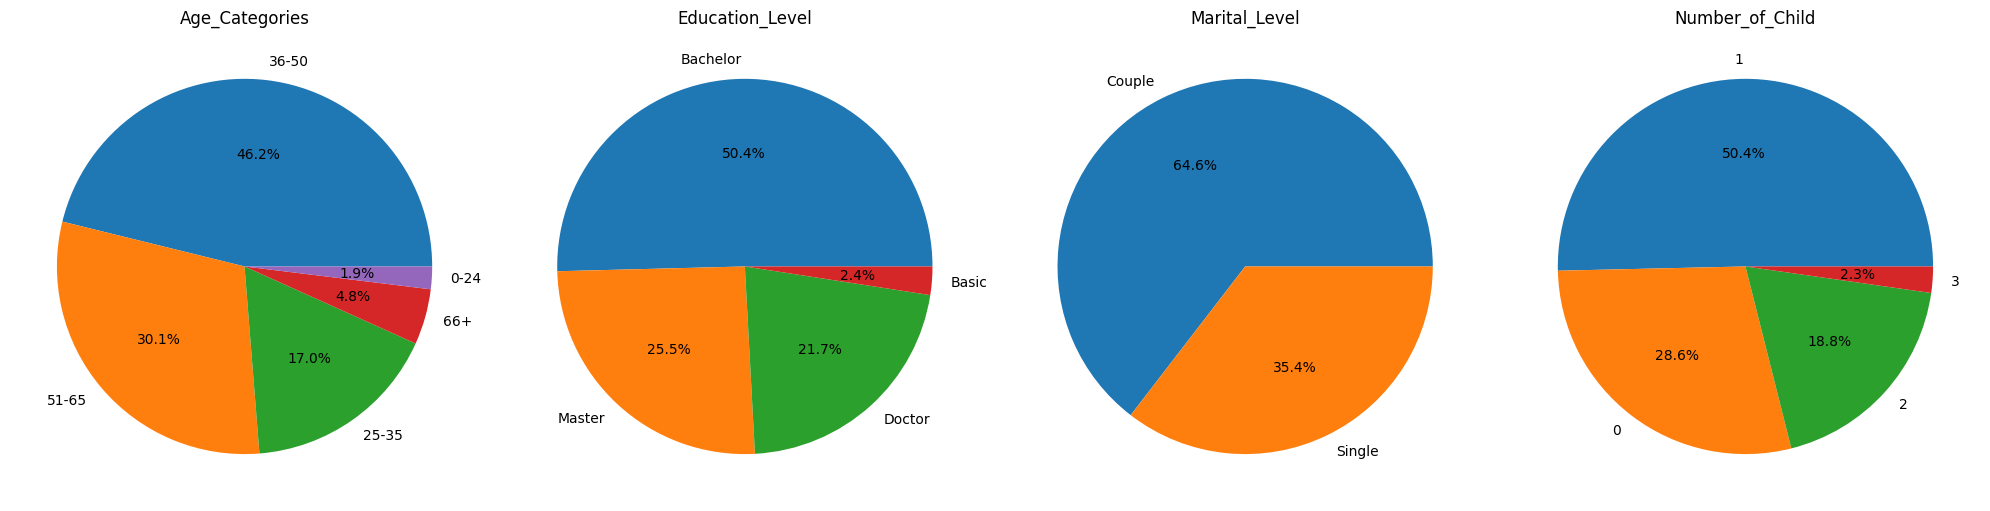

In [37]:
# Define the columns
cols = ["Age_Categories","Education_Level", "Marital_Level", "Number_of_Child"]

# Create subplots with pie charts and percentage labels
fig, axes = plt.subplots(1, len(cols), figsize=(20,5))
for i, col in enumerate(cols):
    # Get the counts for each category in the column
    counts = df[col].value_counts()

    # Create a pie chart with percentage labels
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%')
    axes[i].set_title(col)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Diketahui dominasi dari proporsi setiap variable
- Age_Categories 36-50 tahun: 46.2%
- Education_Level Sarjana: 50.4%
- Marital_Level Berpasangan: 64.6%
- Number_of_Child 1: 50.4%

Proporsi terkecil
- Age_Categories 0-24: 1.9%
- Education_Level Basic: 2.4%
- Marital_Level Single: 35.4%
- Number_of_Child 3: 2.3%

### Total Expense by Age Categories

In [38]:
df

ID  Year_Birth  Age Age_Categories   Education Education_Level  \
0      5524        1957   58          51-65  Graduation        Bachelor   
1      2174        1954   61          51-65  Graduation        Bachelor   
2      4141        1965   50          36-50  Graduation        Bachelor   
3      6182        1984   31          25-35  Graduation        Bachelor   
4      5324        1981   34          25-35         PhD          Doctor   
...     ...         ...  ...            ...         ...             ...   
2235  10870        1967   48          36-50  Graduation        Bachelor   
2236   4001        1946   69            66+         PhD          Doctor   
2237   7270        1981   34          25-35  Graduation        Bachelor   
2238   8235        1956   59          51-65      Master          Master   
2239   9405        1954   61          51-65         PhD          Doctor   

     Marital_Status Marital_Level   Income  Kidhome  Teenhome  \
0            Single        Single  58138.0        0         0   
1            Single        Single  46344.0        1         1   
2          Together        Couple  71613.0        0         0   
3          Together        Couple  26646.0        1         0   
4           Married        Couple  58293.0        1         0   
...             ...           ...      ...      ...       ...   
2235        Married        Couple  61223.0        0         1   
2236       Together        Couple  64014.0        2         1   
2237       Divorced        Single  56981.0        0         0   
2238       Together        Couple  69245.0        0         1   
2239        Married        Couple  52869.0        1         1   

      Number_of_Child Dt_Customer  Months_Since_Customer  Recency  \
0                   0  2012-09-04                     27       58   
1                   2  2014-03-08                      9       38   
2                   0  2013-08-21                     16       26   
3                   1  2014-02-10                     10       26   
4                   1  2014-01-19                     11       94   
...               ...         ...                    ...      ...   
2235                1  2013-06-13                     18       46   
2236                3  2014-06-10                      6       56   
2237                0  2014-01-25                     11       91   
2238                1  2014-01-24                     11        8   
2239                2  2012-10-15                     26       40   

      Total_Expenses  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0               1617       635         88              546              172   
1                 27        11          1                6                2   
2                776       426         49              127              111   
3                 53        11          4               20               10   
4                422       173         43              118               46   
...              ...       ...        ...              ...              ...   
2235            1341       709         43              182               42   
2236             444       406          0               30                0   
2237            1241       908         48              217               32   
2238             843       428         30              214               80   
2239             172        84          3               61                2   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  Total_Purchases  \
0                   88            88                  3               22   
1                    1             6                  2                4   
2                   21            42                  1               20   
3                    3             5                  2                6   
4                   27            15                  5               14   
...                ...           ...                ...              ...   
2235             

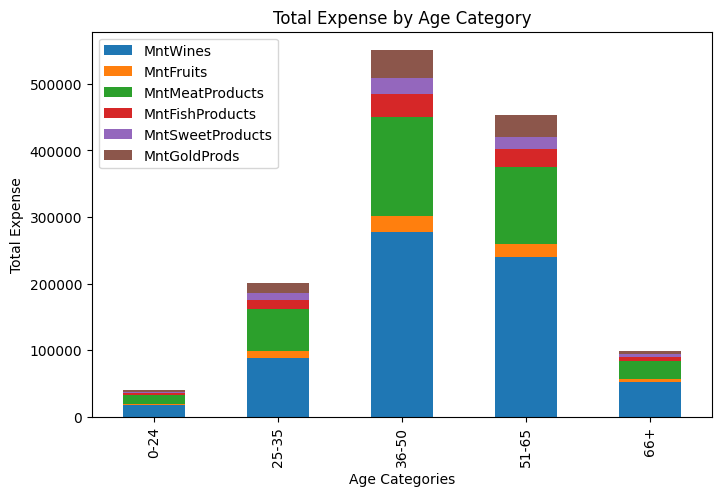

In [39]:
# Group the data by 'Age_Categories' and sum the expenses for each product
grouped_data_Age_Categories = df.groupby('Age_Categories')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

# Create a stacked bar chart
ax = grouped_data_Age_Categories.plot(kind='bar', stacked=True, figsize=(8, 5))
ax.set_title('Total Expense by Age Category')
ax.set_xlabel('Age Categories')
ax.set_ylabel('Total Expense')
plt.show()

In [40]:
grouped_data_Age_Categories

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Age_Categories                                                          
0-24               16884       1713            13912             2695   
25-35              87913      10274            63513            13904   
36-50             277242      24385           148788            33744   
51-65             240548      18159           115976            27160   
66+                52709       3710            27281             5776   

                MntSweetProducts  MntGoldProds  
Age_Categories                                  
0-24                        1792          2873  
25-35                      10126         14693  
36-50                      25457         41464  
51-65                      18437         33289  
66+                         4015          4845

In [41]:
# Create a contingency table with Age Categories in the rows and total expenses for each product in the columns
cont_table = grouped_data_Age_Categories.values.tolist()

# Conduct the chi-squared test of independence
chi2_stat, p_val, dof, expected_freq = chi2_contingency(cont_table)

# Print the results
print("Null Hypothesis (H0): There is no significant association between Age Categories and total expenses for any product.")
print("Alternative Hypothesis (H1): There is a significant association between Age Categories and total expenses for at least one product.")
print("p-value:", p_val)

# Check for significance at alpha = 0.05
alpha = 0.05
if p_val < alpha:
    print("We reject the Null Hypothesis. There is evidence to support the Alternative Hypothesis.")
else:
    print("We fail to reject the Null Hypothesis. There is no evidence to support the Alternative Hypothesis.")

Null Hypothesis (H0): There is no significant association between Age Categories and total expenses for any product.
Alternative Hypothesis (H1): There is a significant association between Age Categories and total expenses for at least one product.
p-value: 0.0
We reject the Null Hypothesis. There is evidence to support the Alternative Hypothesis.


Diketahui dari visualisasi tersebut didapatkan insight berupa:
- Range umur 36-50 memiliki pengeluaran paling tinggi
- Pengeluaran tertinggi di semua kategori umur adalah untuk wine.
- Produk buah kurang populer. Expense untuk produk buah lebih rendah dibandingkan dengan kategori produk lainnya, yang dapat menunjukkan permintaan atau preferensi yang lebih rendah untuk produk ini.

Dari insight tersebut juga dilakukan hipotesis test dan diketahui bahwa ada hubungan yang signifikan antara Age_Categories dan Total_Expense

### Total Expense by Education Level

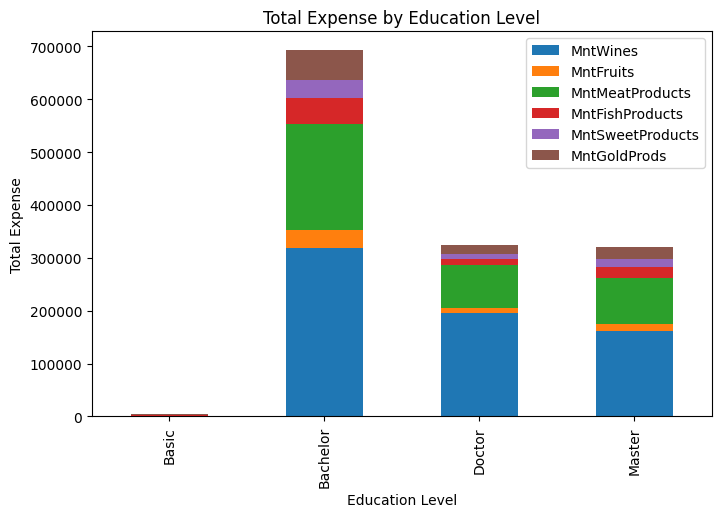

In [42]:
# Define the order of the categories
edu_levels = ['Basic', 'Bachelor', 'Doctor', 'Master']
edu_levels_cat = pd.Categorical(df['Education_Level'], categories=edu_levels, ordered=True)

# Group the data by 'Education_Level' and sum the expenses for each product
grouped_data_Education_Level = df.groupby(edu_levels_cat)[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

# Create a stacked bar chart
ax = grouped_data_Education_Level.plot(kind='bar', stacked=True, figsize=(8, 5))
ax.set_title('Total Expense by Education Level')
ax.set_xlabel('Education Level')
ax.set_ylabel('Total Expense')
plt.show()


In [43]:
grouped_data_Education_Level

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Basic          391        600              618              921   
Bachelor    318102      34427           201301            48445   
Doctor      195119       9546            81082            12824   
Master      161684      13668            86469            21089   

          MntSweetProducts  MntGoldProds  
Basic                  654          1233  
Bachelor             34914         56551  
Doctor                9723         15362  
Master               14536         24018

In [44]:
# Create a contingency table with Education Level in the rows and total expenses for each product in the columns
cont_table = grouped_data_Education_Level.values.tolist()

# Conduct the chi-squared test of independence
chi2_stat, p_val, dof, expected_freq = chi2_contingency(cont_table)

# Print the results
print("Null Hypothesis (H0): There is no significant association between Education Level Categories and total expenses for any product.")
print("Alternative Hypothesis (H1): There is a significant association between Education Level Categories and total expenses for at least one product.")
print("p-value:", p_val)

# Check for significance at alpha = 0.05
alpha = 0.05
if p_val < alpha:
    print("We reject the Null Hypothesis. There is evidence to support the Alternative Hypothesis.")
else:
    print("We fail to reject the Null Hypothesis. There is no evidence to support the Alternative Hypothesis.")

Null Hypothesis (H0): There is no significant association between Education Level Categories and total expenses for any product.
Alternative Hypothesis (H1): There is a significant association between Education Level Categories and total expenses for at least one product.
p-value: 0.0
We reject the Null Hypothesis. There is evidence to support the Alternative Hypothesis.


Diketahui dari visualisasi tersebut didapatkan insight berupa:
- Education Level Sarjana memiliki pengeluaran paling tinggi
- Pengeluaran tertinggi di Education Level Dasar adalah gold dan pengeluaran terendahnya adalah wine
- Pengeluaran tertinggi di Education Level Bachelor, Master, dan Doctor adalah wine dan pengeluaran terendahnya adalah buah

Dari insight tersebut juga dilakukan hipotesis test dan diketahui bahwa ada hubungan yang signifikan antara Education_Level dan Total_Expense

### Total Expense by Marital Level

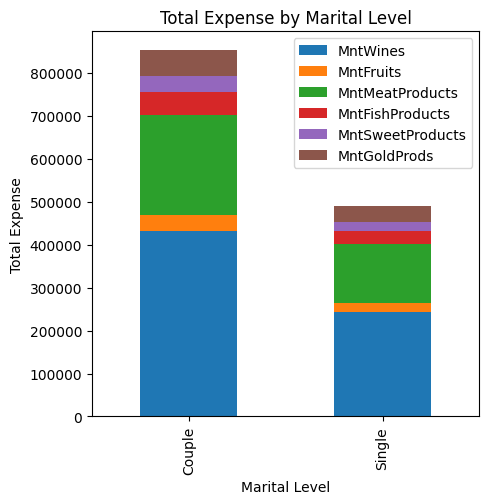

In [45]:
# Group the data by 'Marital_Level' and sum the expenses for each product
grouped_data_Marital_Level = df.groupby('Marital_Level')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

# Create a stacked bar chart
ax = grouped_data_Marital_Level.plot(kind='bar', stacked=True, figsize=(5, 5))
ax.set_title('Total Expense by Marital Level')
ax.set_xlabel('Marital Level')
ax.set_ylabel('Total Expense')
plt.show()

In [46]:
grouped_data_Marital_Level

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Marital_Level                                                          
Couple           432927      36435           232682            52666   
Single           242369      21806           136788            30613   

               MntSweetProducts  MntGoldProds  
Marital_Level                                  
Couple                    37892         61237  
Single                    21935         35927

In [47]:
# Create a contingency table with Marital Level in the rows and total expenses for each product in the columns
cont_table = grouped_data_Marital_Level.values.tolist()

# Conduct the chi-squared test of independence
chi2_stat, p_val, dof, expected_freq = chi2_contingency(cont_table)

# Print the results
print("Null Hypothesis (H0): There is no significant association between Marital Level Categories and total expenses for any product.")
print("Alternative Hypothesis (H1): There is a significant association between Marital Level Categories and total expenses for at least one product.")
print("p-value:", p_val)

# Check for significance at alpha = 0.05
alpha = 0.05
if p_val < alpha:
    print("We reject the Null Hypothesis. There is evidence to support the Alternative Hypothesis.")
else:
    print("We fail to reject the Null Hypothesis. There is no evidence to support the Alternative Hypothesis.")

Null Hypothesis (H0): There is no significant association between Marital Level Categories and total expenses for any product.
Alternative Hypothesis (H1): There is a significant association between Marital Level Categories and total expenses for at least one product.
p-value: 6.386114608844512e-38
We reject the Null Hypothesis. There is evidence to support the Alternative Hypothesis.


Diketahui dari visualisasi tersebut didapatkan insight berupa:

- Yang memiliki pasangan memiliki pengeluaran lebih tinggi
- Pengeluaran tertinggi untuk yang berpasangan maupun tidak adalah untuk wine.
- Produk buah kurang populer. Pengeluaran untuk produk buah lebih rendah dibandingkan dengan kategori produk lainnya, yang dapat menunjukkan permintaan atau preferensi yang lebih rendah untuk produk ini.

Dari insight tersebut juga dilakukan hipotesis test dan diketahui bahwa ada hubungan yang signifikan antara Marital_Level dan Total_Expense

### Total Expense by Number of Child

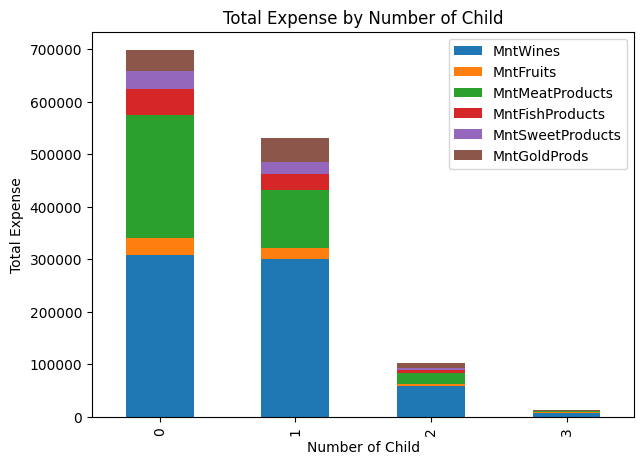

In [48]:
# Group the data by 'Number_of_Child' and sum the expenses for each product
grouped_data_Number_of_Child = df.groupby('Number_of_Child')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

# Create a stacked bar chart
ax = grouped_data_Number_of_Child.plot(kind='bar', stacked=True, figsize=(7, 5))
ax.set_title('Total Expense by Number of Child')
ax.set_xlabel('Number of Child')
ax.set_ylabel('Total Expense')
plt.show()

In [49]:
grouped_data_Number_of_Child

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Number_of_Child                                                          
0                  308195      32946           234196            48396   
1                  299901      21727           110789            29921   
2                   59133       3269            21504             4694   
3                    8067        299             2981              268   

                 MntSweetProducts  MntGoldProds  
Number_of_Child                                  
0                           33599         40437  
1                           22518         45235  
2                            3456         10586  
3                             254           906

In [50]:
# Create a contingency table with Number of Child in the rows and total expenses for each product in the columns
cont_table = grouped_data_Number_of_Child.values.tolist()

# Conduct the chi-squared test of independence
chi2_stat, p_val, dof, expected_freq = chi2_contingency(cont_table)

# Print the results
print("Null Hypothesis (H0): There is no significant association between Number of Child Categories and total expenses for any product.")
print("Alternative Hypothesis (H1): There is a significant association between Number of Child Categories and total expenses for at least one product.")
print("p-value:", p_val)

# Check for significance at alpha = 0.05
alpha = 0.05
if p_val < alpha:
    print("We reject the Null Hypothesis. There is evidence to support the Alternative Hypothesis.")
else:
    print("We fail to reject the Null Hypothesis. There is no evidence to support the Alternative Hypothesis.")

Null Hypothesis (H0): There is no significant association between Number of Child Categories and total expenses for any product.
Alternative Hypothesis (H1): There is a significant association between Number of Child Categories and total expenses for at least one product.
p-value: 0.0
We reject the Null Hypothesis. There is evidence to support the Alternative Hypothesis.


Diketahui dari visualisasi tersebut didapatkan insight berupa:

- Pelanggan yang tidak memiliki anak memiliki pengeluaran lebih tinggi
- Pengeluaran tertinggi untuk yang tidak memiliki anak dan memiliki anak adalah untuk wine.
- Pengeluaran paling sedikit bagi yang tidak memiliki anak, memiliki 1 anak, memiliki 2 anak adalah buah dan untuk yang memiliki 3 anak pengeluaran paling sedikit adalah produk manis

Dari insight tersebut juga dilakukan hipotesis test dan diketahui bahwa ada hubungan yang signifikan antara Number_of_Child dan Total_Expense

### Insight Summaries

In [51]:
# Create Combined DataFrames
combined_df = pd.concat([grouped_data_Age_Categories, grouped_data_Education_Level, grouped_data_Marital_Level, grouped_data_Number_of_Child], axis=0)

# Add a new column as the sum of all columns
combined_df['Total'] = combined_df.sum(axis=1)

# Calculate maximum and minimum values for each column
max_values = combined_df.max()
min_values = combined_df.min()

# Create DataFrames for maximum and minimum values
max_df = pd.DataFrame(max_values).T
max_df.index = ['max_value']
min_df = pd.DataFrame(min_values).T
min_df.index = ['min_value']

# Concatenate original DataFrame with maximum and minimum DataFrames
combined_df_with_extremes = pd.concat([combined_df, max_df, min_df])

# Add a new column to identify the original dataframes
combined_df_with_extremes['DataFrame Name'] = ['grouped_data_Age_Categories']*5 + ['grouped_data_Education_Level']*4 + ['grouped_data_Marital_Level']*2 + ['grouped_data_Number_of_Child']*4 + ['combined_df_with_extremes']*2

# Sort the DataFrame by the new 'Total' column
combined_df_with_extremes.sort_values('Total', ascending=False, inplace=True)

# Add the color bar
combined_df_with_extremes.style.background_gradient()

Dalam upaya **mempertahankan** revenue, perusahaan harus menjaga peforma dari pelanggan yang minimal memenuhi salah satu dari kategori berikut:
1. Pelanggan yang sudah memiliki pasangan
1. Pelanggan yang belum memiliki anak
1. Pelanggan yang level pendidikannya Sarjana
1. Pelanggan yang umur-nya berada di rentang 36-50

Dalam upaya **meningkatkan** revenue, perusahaan harus mencari peluang improvement untuk meningkatkan peforma atau menambah segmen dari pelanggan yang minimal memenuhi salah satu dari kategori berikut:
1. Pelanggan yang level pendidikannya Basic
1. Pelanggan yang memiliki 3 anak
1. Pelanggan yang umurnya berada di rentang 24 tahun atau kurang

Hal ini juga berkaitan sebagaimana kita ketahui bahwa proposi dari 3 kategori dengan Total_Expense sedikit tesebut sangat sedikit proporsinya:

- Pelanggan yang level pendidikannya Basic : 2.4 %
- Pelanggan yang memiliki 3 anak : 2.3 %
- Pelanggan yang umurnya berada di rentang 24 tahun atau kurang : 1.9%

## Prilaku Pelanggan

Sesi ini akan mengeksplorasi korelasi antar variable. Secara khusus, akan melihat pengaruh dari:
- Age
- Income
- Number_of_Child
- Months_Since_Customer
- Recency
- Total_Expenses
- NumDealsPurchases
- Total_Purchases
- Total_Acc_Camp
- Complain

Melalui analisis ini, diharapkan dapat memperoleh pemahaman yang lebih baik tentang korelasi antar variable yang tujuannya untuk mengenal lebih jauh tentang pelanggan.

### Correlation Variable

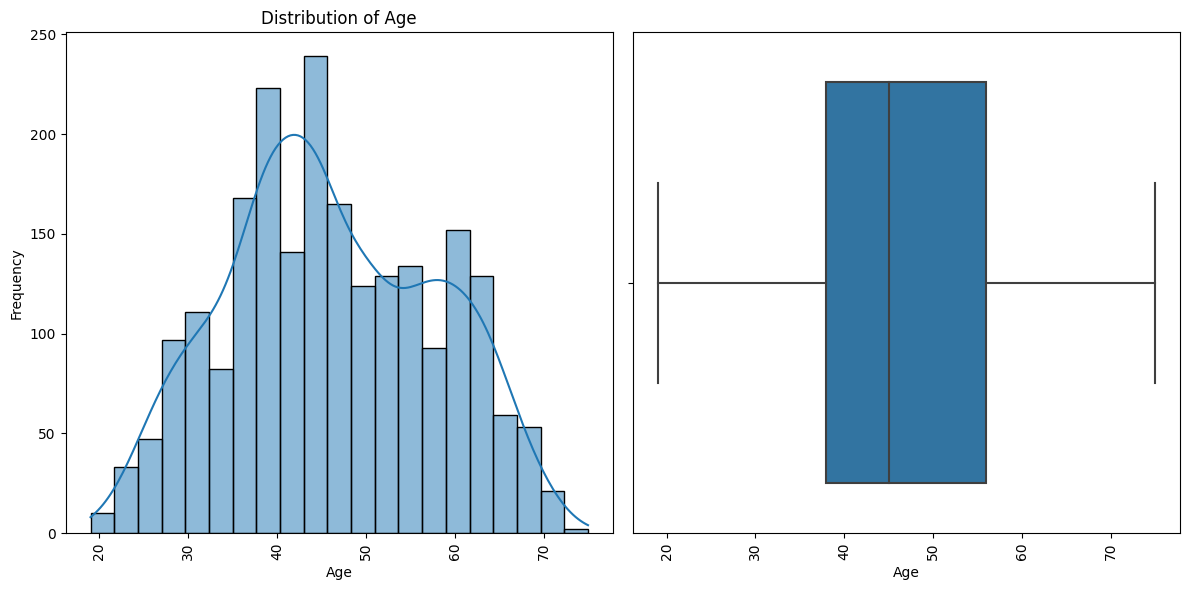

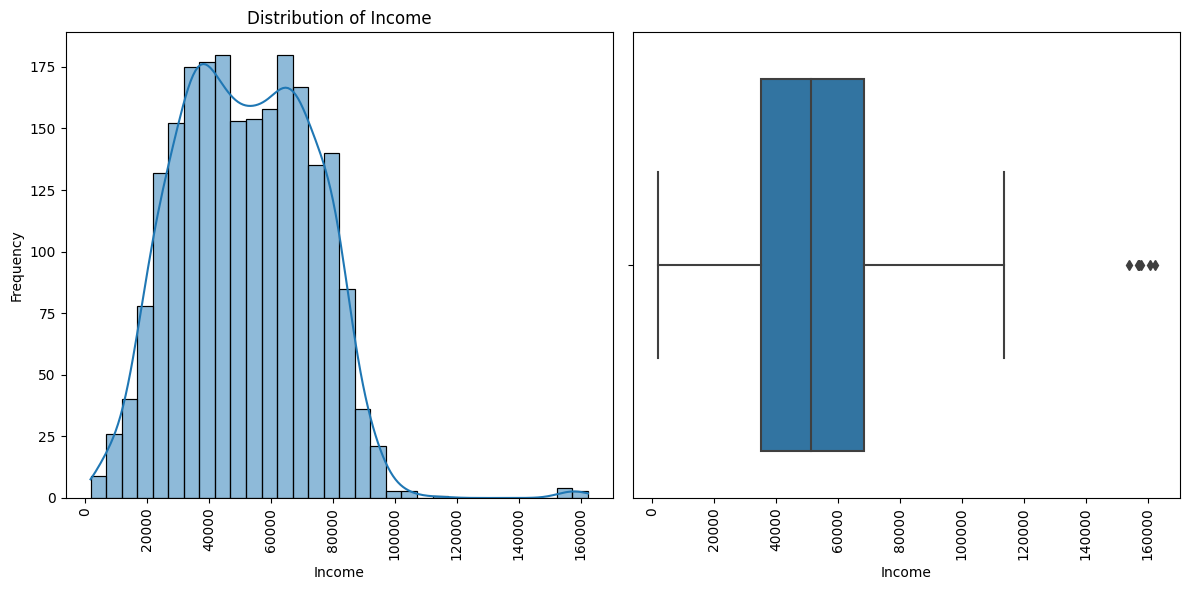

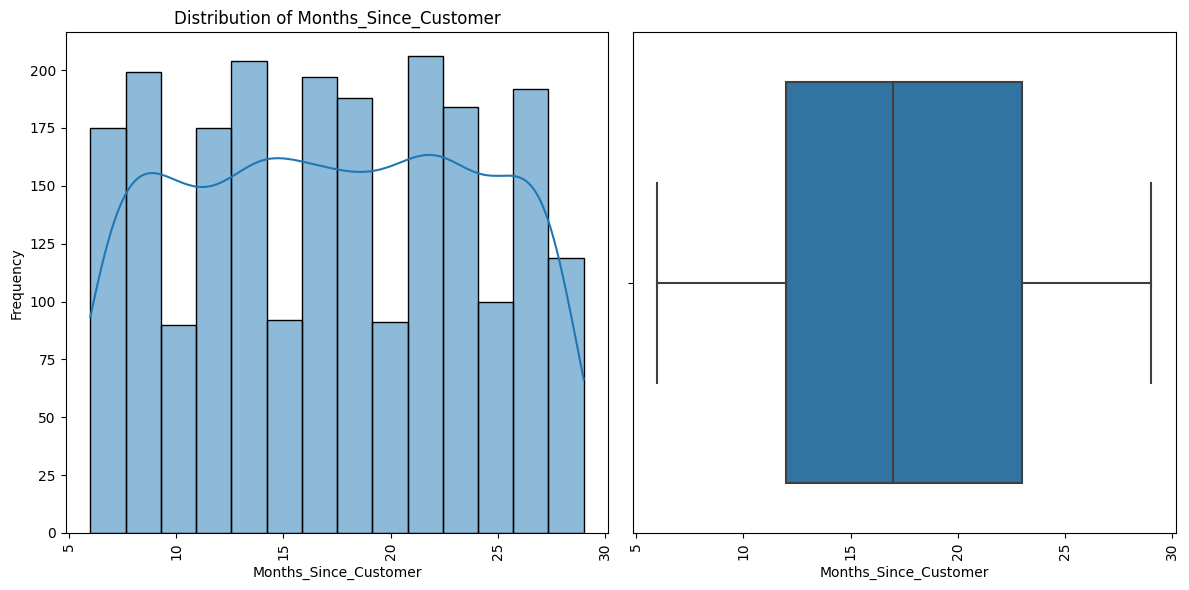

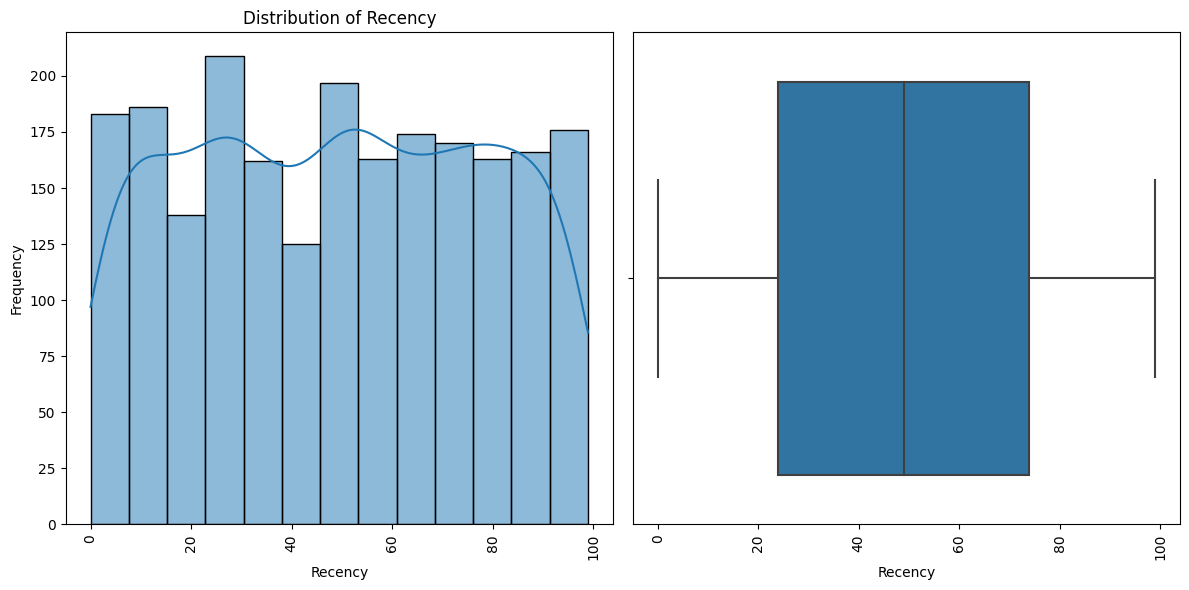

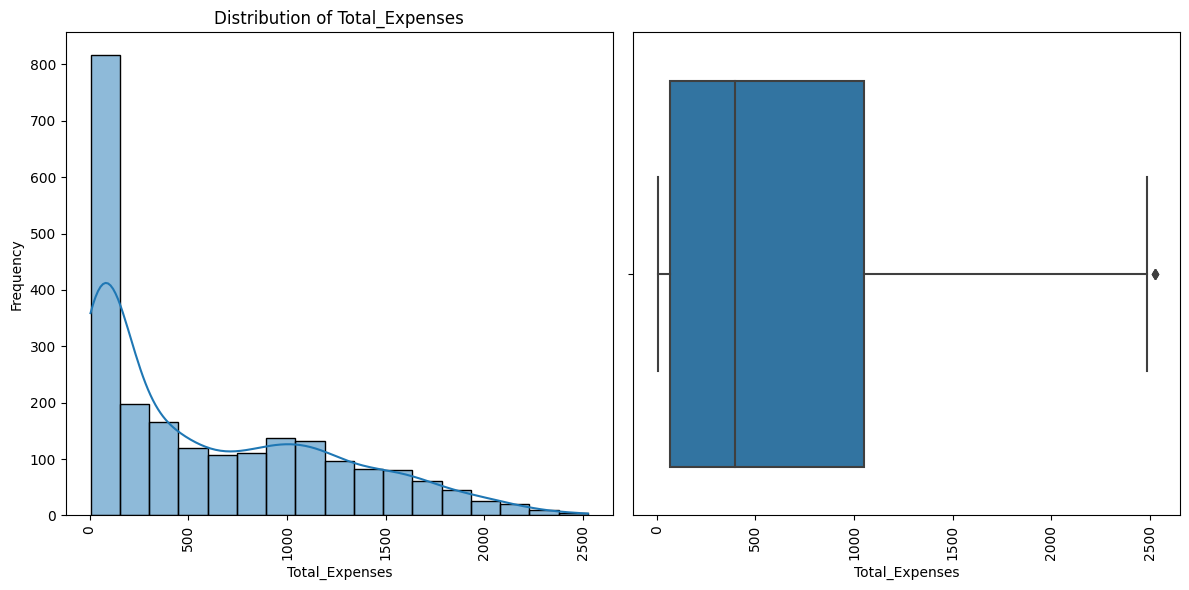

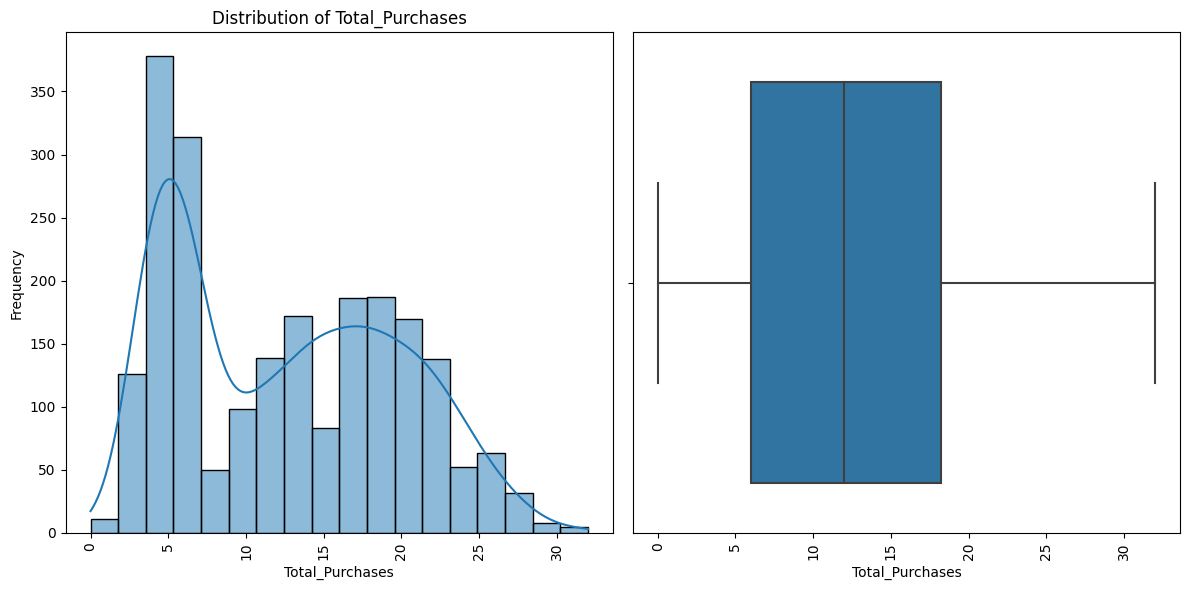

In [52]:
# Checking Normal Distribution

# Define the columns
cols = ['Age','Income','Months_Since_Customer','Recency','Total_Expenses','Total_Purchases']

# Loop through columns and create histograms & boxplot
for col in cols:
    fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
    sns.histplot(df[col], kde=True, ax=axs[0])
    axs[0].set_xlabel(col)
    axs[0].set_ylabel("Frequency")
    axs[0].set_title(f"Distribution of {col}")

    # Add boxplot to the right of the histogram
    sns.boxplot(x=df[col], ax=axs[1])
    axs[1].set_xlabel(col)
    axs[1].set_ylabel("")

    # Rotate x-axis labels of histogram
    for ax in axs:
        ax.tick_params(axis='x', labelrotation=90)

    plt.tight_layout()
    plt.show()

Diketahui bahwa dari pengecekan visualisasi tersebut tidak ada data yang terdistribusi normal, maka untuk melihat korelasi hubungan antar variable menggunakan metode *Correlation Spearman*

In [53]:
# Define the columns
cols = ['Age','Income','Number_of_Child','Months_Since_Customer','Recency','Total_Expenses','NumDealsPurchases','Total_Purchases','Total_Acc_Camp','Complain']

correlations = []
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        corr, _ = spearmanr(df[cols[i]], df[cols[j]])
        correlations.append([cols[i], cols[j], corr])

data_correlation = pd.DataFrame(correlations, columns=['Variable 1', 'Variable 2', 'Correlation_spearman'])
data_correlation = data_correlation.drop_duplicates(subset='Correlation_spearman').sort_values(by='Correlation_spearman', ascending=False)
data_correlation

Variable 1             Variable 2  Correlation_spearman
36         Total_Expenses        Total_Purchases              0.910080
12                 Income         Total_Expenses              0.853119
14                 Income        Total_Purchases              0.779843
20        Number_of_Child      NumDealsPurchases              0.542874
37         Total_Expenses         Total_Acc_Camp              0.385088
15                 Income         Total_Acc_Camp              0.311486
42        Total_Purchases         Total_Acc_Camp              0.286452
0                     Age                 Income              0.217604
26  Months_Since_Customer      NumDealsPurchases              0.216411
25  Months_Since_Customer         Total_Expenses              0.184466
6                     Age        Total_Purchases              0.181382
4                     Age         Total_Expenses              0.159741
27  Months_Since_Customer        Total_Purchases              0.159591
39      NumDealsPurchases        Total_Purchases              0.107209
5                     Age      NumDealsPurchases              0.087960
28  Months_Since_Customer         Total_Acc_Camp              0.085433
1                     Age        Number_of_Child              0.085111
29  Months_Since_Customer               Complain              0.035015
23        Number_of_Child               Complain              0.030610
24  Months_Since_Customer                Recency              0.026822
7                     Age         Total_Acc_Camp              0.022275
41      NumDealsPurchases               Complain              0.021732
30                Recency         Total_Expenses              0.018907
3                     Age                Recency              0.016514
18        Number_of_Child                Recency              0.012487
32                Recency        Total_Purchases              0.011925
11                 Income                Recency              0.009791
31                Recency      NumDealsPurchases              0.008867
34                Recency               Complain              0.005786
8                     Age               Complain              0.000890
2                     Age  Months_Since_Customer             -0.013938
35         Total_Expenses      NumDealsPurchases             -0.015623
10                 Income  Months_Since_Customer             -0.021743
43        Total_Purchases               Complain             -0.022836
44         Total_Acc_Camp               Complain             -0.023673
17        Number_of_Child  Months_Since_Customer             -0.023988
16                 Income               Complain             -0.027779
38         Total_Expenses               Complain             -0.037177
40      NumDealsPurchases         Total_Acc_Camp             -0.092031
33                Recency         Total_Acc_Camp             -0.104476
13                 Income      NumDealsPurchases             -0.196442
22        Number_of_Child         Total_Acc_Camp             -0.240189
9                  Income        Number_of_Child             -0.375782
21        Number_of_Child        Total_Purchases             -0.382428
19        Number_of_Child         Total_Expenses             -0.483948

Dalam upaya memberikan dampak yang signifikan, dalam proses analisis ini akan memprioritaskan untuk korelasi yang memiliki nilai diantara -1 s/d -0.5 dan 1 s/d 0.5

### Total Expense & Total Purchase

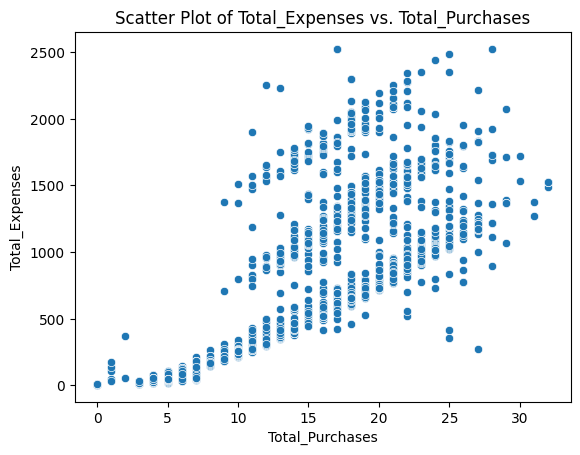

In [54]:
# Scatter Plot Define
sns.scatterplot(data=df, x='Total_Purchases', y='Total_Expenses')
plt.title('Scatter Plot of Total_Expenses vs. Total_Purchases')
plt.show()

Koefisien korelasi sebesar 0.910080 antara Total_Expenses dan Total_Purchases menunjukkan adanya hubungan positif yang kuat antara kedua variabel tersebut. Ini berarti bahwa Total_Expenses meningkat, begitu juga Total_Purchases.

Jika melihat dari scatter plot, terlihat begitu jelas terdefinisi bahwa meningkatnya Total_Purchase maka akan memberikan pengaruh juga terhadap Total_Expense.

### Income & Total Expense

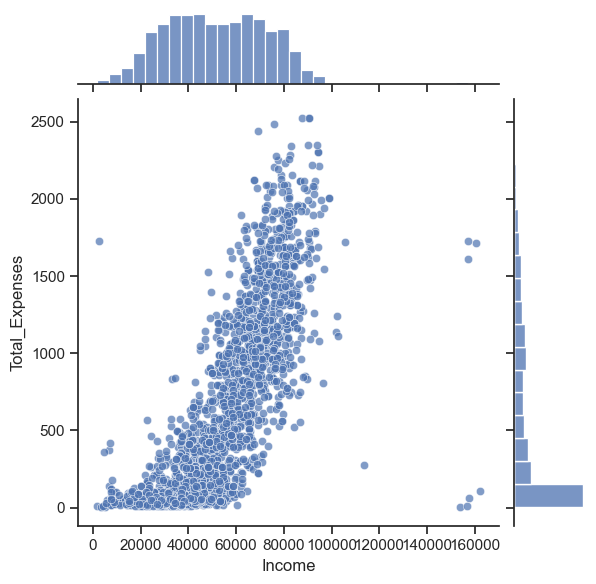

In [55]:
sns.set(style='ticks', color_codes=True)
g = sns.jointplot(x='Income', y='Total_Expenses', data=df, kind='scatter', height=6, alpha=0.7)
g.plot_marginals(sns.histplot, stat='density', alpha=0.5)
plt.show()

Diketahui bahwa ada korelasi positif yang kuat (0.853119) antara Income dan Total_Expense dalam kumpulan data yang dianalisis. 

Insight lainnya yang juga berkaitan adalah bentuk scater plot yang relatif membentuk exponensial. Ini artinya ketika tingkat pendapatan meningkat, demikian pula total pengeluaran meningkat relatif lebih jauh. Ini bisa menjadi temuan penting jika ingin meningkatkan revenue dengan menargetkan pelanggan dengan tingkat pendapatan yang relatif tinggi.

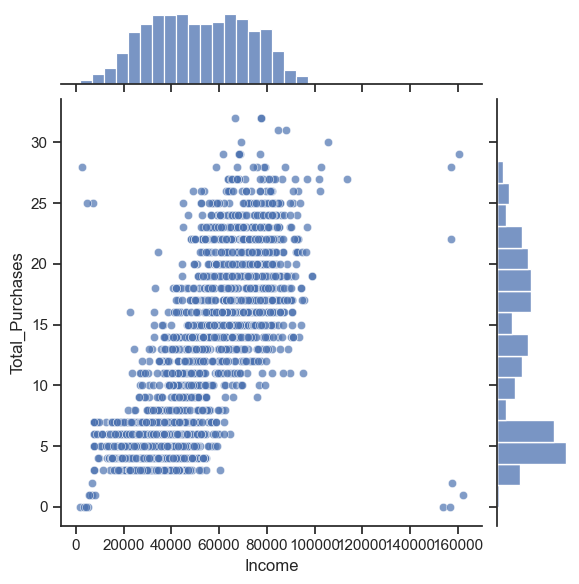

In [56]:
sns.set(style='ticks', color_codes=True)
g = sns.jointplot(x='Income', y='Total_Purchases', data=df, kind='scatter', height=6, alpha=0.7)
g.plot_marginals(sns.histplot, stat='density', alpha=0.5)
plt.show()

Korelasi sebesar 0.779843 antara Income dan Total_Purchases menunjukkan korelasi positif yang relatif kuat. Ini berarti bahwa dengan meningkatnya Income, Total_Purchases juga cenderung meningkat. Karena pelanggan dengan pendapatan lebih tinggi cenderung melakukan lebih banyak pembelian, perusahaan dapat menargetkan upaya pemasaran kepada pelanggan yang memiliki income tinggi.

### Number of Child & NumDealsPurchases

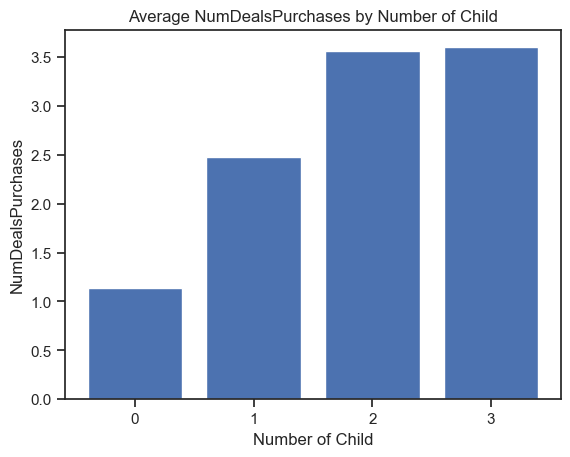

In [57]:
# Group the data by "Number of Child" and calculate the mean of "NumDealsPurchases"
grouped_data = df.groupby("Number_of_Child")["NumDealsPurchases"].mean()

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(grouped_data.index, grouped_data.values)

# Set axis labels and title
ax.set_xlabel("Number of Child")
ax.set_ylabel("NumDealsPurchases")
ax.set_title("Average NumDealsPurchases by Number of Child")

# Set x-axis ticks to integer numbers
ax.set_xticks(range(len(grouped_data)))
ax.set_xticklabels([int(x) for x in grouped_data.index])

# Show the plot
plt.show()

Korelasi positif sebesar 0,542874 antara Number_of_Child dan NumDealsPurchases menunjukkan bahwa terdapat hubungan sedang antara kedua variabel. Artinya, ada kecenderungan pelanggan dengan anak lebih banyak untuk membeli lebih banyak produk diskon.

### Insight Summaries

Dari hal ini dapat diketahui insight berupa:

- Total_Expenses & Total_Purchases memiliki korelasi positif yang kuat (0.910080)
<br><br>
- Income & Total_Expenses memiliki korelasi positif yang kuat (0.853119).
<br><br>
- Income & Total_Expenses memiliki korelasi positif yang cukup kuat (0.779843).
<br><br>
- Number_of_Child & NumDealsPurchases memiliki korelasi positif sedang (0.542874).

# Conclusion

**1. Background pelanggan seperti apa yang menjadi prioritas perusahaan dalam upaya mempertahankan dan meningkatkan revenue?**

Sebagaimana telah diketahui sebelumnya bahwa Kategori Umur, Level Pendidikan, Level Pernikahan, Jumlah Anak memiliki pengaruh terhadap Total Pengeluaran. Dengan melihat perbandingan antar grup variable, bisa didapatkan insight berupa:
<br>
- Diharapkan perusahaan dapat membuat sebuah strategi untuk **mempertahankan** peforma dari pelanggan yang minimal memenuhi salah satu dari kategori berikut karena tingkat proporsi Total_Expense (sebagai revenue) sangat tinggi:
   1. Pelanggan yang sudah memiliki pasangan
   2. Pelanggan yang belum memiliki anak
   3. Pelanggan yang level pendidikannya Sarjana
   4. Pelanggan yang umur-nya berada di rentang 36-50
<br><br>
- Hal yang lain dapat dilihat sebagai peluang improvement karena memiliki Total Pengeluaran yang sedikit sebagai sumber revenue. Diharapkan perusahaan dapat membuat sebuah strategi untuk **meningkatkan** peforma dari pelanggan yang minimal memenuhi salah satu dari kategori berikut:
   1. Pelanggan yang level pendidikannya Basic
   2. Pelanggan yang memiliki 3 anak
   3. Pelanggan yang umurnya berada di rentang 24 tahun atau kurang

Perlu dipahami bahwa untuk meningkatkan Total Pengeluaran (sumber revenue perusahaan) di kategori yang nilainya sedikit dapat juga dengan menambah jumlah pelanggannya dan tidak terbatas hanya berfokus pada data yang ada. Dimana seperti kita ketahui bahwa proposi dari 3 kategori tesebut sangat sedikit:

- Pelanggan yang level pendidikannya Basic : 2.4 %
- Pelanggan yang memiliki 3 anak : 2.3 %
- Pelanggan yang umurnya berada di rentang 24 tahun atau kurang : 1.9%


Hal ini menjadi peluang improvement sebagai potensi revenue tambahan selain dari mempertahankan pelanggan yang sudah loyal (Total Pengeluaran tinggi)

**2. Apakah korelasi yang signifikan mempengaruhi pelanggan dalam berbelanja?**

Sebagaimana telah diketahui sebelumnya bahwa terdapat hubungan yang kuat untuk Total_Expenses & Total_Purchases, Income & Total_Expenses, dan Income & Total_Purchases dimana juga diketahui hubungan yang sedang antara Number_of_Child & NumDealsPurchases. 

1. Total_Expenses & Total_Purchases memiliki korelasi positif yang kuat (0.910080). Ini berarti bahwa ketika pelanggan membelanjakan lebih banyak untuk produk perusahaan, mereka juga cenderung melakukan lebih banyak pembelian. Informasi ini bermanfaat bagi perusahaan untuk fokus pada teknik untuk meningkatkan total nilai pembelian setiap pelanggan.
<br><br>
2. Income & Total_Expenses memiliki korelasi positif yang kuat (0.853119). Ini menunjukkan bahwa ketika pendapatan pelanggan meningkat, mereka cenderung membelanjakan lebih banyak untuk produk perusahaan. Perusahaan dapat menargetkan demografi berpenghasilan lebih tinggi dengan produk atau kampanye pemasaran yang lebih mahal untuk memaksimalkan penjualan mereka.
<br><br>
3. Income & Total_Expenses memiliki korelasi positif yang cukup kuat (0.779843). Ini menyiratkan bahwa pelanggan dengan pendapatan lebih tinggi cenderung melakukan lebih banyak pembelian dari perusahaan. Perusahaan dapat menggunakan informasi ini untuk menyesuaikan strategi pemasaran mereka terhadap pelanggan berpenghasilan lebih tinggi untuk mendorong lebih banyak penjualan.
<br><br>
4. Number_of_Child & NumDealsPurchases memiliki korelasi positif sedang (0.542874). Hal ini menunjukkan bahwa pelanggan dengan lebih banyak anak cenderung memanfaatkan penawaran diskon yang ditawarkan oleh perusahaan. Perusahaan dapat menggunakan informasi ini untuk menargetkan keluarga dengan lebih banyak anak dengan diskon dan promosi eksklusif.

**3. Apa rekomendasi untuk perusahaan berdasarkan upaya mempertahankan dan meningkatkan revenue?**

1. Mempertahankan Performa Pelanggan Loyal
    - Menyesuaikan preferensi pelanggan loyal (sudah memiliki pasangan atau belum memiliki anak atau level pendidikan sarjana atau umur 36-50 atau memiliki total pengeluaran yang tinggi)
    - Memberikan diskon atau insentif khusus bagi pelanggan loyal untuk meningkatkan loyalitas mereka dan mendorong mereka untuk tetap berbelanja di perusahaan.
2. Meningkatkan Performa Pelanggan yang Berpotensi karena jumlahnya masih rendah dibanding pelanggan lain
    - Perusahaan mengembangkan produk dan strategi pemasaran baru yang sesuai dengan kebutuhan dan preferensi dari pelanggan potensial (level pendidikan basic atau memiliki 3 anak atau umur 24 tahun ke bawah atau memiliki total pengeluaran yang lebih sedikit)
3. Meningkatkan Total Nilai Pembelian Setiap Pelanggan
    - Perusahaan dapat mendorong pelanggan untuk melakukan lebih banyak pembelian dengan memberikan diskon atau promo khusus pada pembelian dalam jumlah besar: 
        - Upselling mengacu pada praktik mendorong pelanggan untuk membeli produk atau layanan versi yang lebih mahal atau lebih canggih yang sudah mereka minati.
        - Cross-selling mengacu pada praktik menawarkan pelanggan produk atau layanan pelengkap atau terkait yang mungkin mereka minati untuk dibeli selain produk yang sudah mereka pertimbangkan.
4. Menargetkan Pelanggan Berpenghasilan Tinggi
    - Perusahaan dapat mengembangkan produk yang lebih eksklusif untuk pelanggan dengan pendapatan lebih tinggi untuk meningkatkan minat dan frekuensi pembelian mereka.
5. Menargetkan Keluarga dengan Banyak Anak
    - Perusahaan dapat mengembangkan produk atau layanan khusus untuk keluarga dengan banyak anak, seperti paket produk atau layanan yang lebih menguntungkan atau penawaran bundling produk yang sesuai dengan kebutuhan mereka.